<h1 align='center'> 

---- PI02 - DATA ANALYST COMUNICACIONES ----

</h1>

# Análisis del dataset

- ## Carga de librerías para el desarrollo del ETL y el EDA

In [702]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Hojas contenidas dentro del dataset principal 'internet.xlsx' y su respectiva descripción.

- Acc_vel_loc_sinrangos: Datos de acceso por localidad sin rangos de velocidad.
- Velocidad_sin_Rangos: Información sobre la velocidad de conexión a internet sin rangos específicos.
- Velocidad % por prov: Distribución porcentual de la velocidad de conexión a internet por provincia.
- Totales VMD: Totales de velocidad media descargada (VMD).
- Accesos_tecnologia_localidad: Accesos a internet por tipo de tecnología y localidad.
- Totales Accesos Por Tecnología: Totales de accesos a internet desglosados por tecnología.
- Accesos Por Tecnología: Accesos a internet por tipo de tecnología.
- Dial-BAf: Accesos dial-up y Banda Ancha Fija (BAf).
- Totales Dial-BAf: Totales de accesos dial-up y Banda Ancha Fija (BAf).
- Penetración-poblacion: Penetración de internet en la población.
- Penetracion-hogares: Penetración de internet en hogares.
- Penetracion-totales: Totales de penetración de internet.
- Totales Accesos por velocidad: Totales de accesos a internet desglosados por velocidad de conexión.
- Accesos por velocidad: Accesos a internet desglosados por velocidad de conexión.
- Ingresos: Ingresos generados por los servicios de internet en miles de pesos.



In [703]:
velocidad_internet= pd.read_excel('DATASETS\Internet.xlsx', sheet_name='Acc_vel_loc_sinrangos')

In [704]:
velocidad_internet

Partido    Localidad                link Indec Velocidad (Mbps)  \
0      BUENOS AIRES   25 de Mayo                25 de Mayo          6854100   
1      BUENOS AIRES   25 de Mayo                25 de Mayo          6854100   
2      BUENOS AIRES   25 de Mayo                25 de Mayo          6854100   
3      BUENOS AIRES   25 de Mayo                25 de Mayo          6854100   
4      BUENOS AIRES   25 de Mayo                25 de Mayo          6854100   
...             ...          ...                       ...              ...   
18859       TUCUMAN  Yerba Buena  Yerba Buena - Marcos Paz         90119030   
18860       TUCUMAN  Yerba Buena  Yerba Buena - Marcos Paz         90119030   
18861       TUCUMAN  Yerba Buena  Yerba Buena - Marcos Paz         90119030   
18862       TUCUMAN  Yerba Buena  Yerba Buena - Marcos Paz         90119030   
18863       TUCUMAN  Yerba Buena  Yerba Buena - Marcos Paz         90119030   

       Provincia  Accesos  
0           0.00     1.00  
1           0.50     2.00  
2           0.75    19.00  
3           3.00    85.00  
4           3.50   145.00  
...          ...      ...  
18859     100.00 5,779.00  
18860     300.00 4,570.00  
18861     500.00   442.00  
18862     600.00   223.00  
18863   1,000.00    36.00  

[18864 rows x 6 columns]

In [705]:
velocidad_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18864 entries, 0 to 18863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Partido           18864 non-null  object 
 1   Localidad         18864 non-null  object 
 2   link Indec        18863 non-null  object 
 3   Velocidad (Mbps)  18864 non-null  object 
 4   Provincia         18864 non-null  float64
 5   Accesos           18857 non-null  float64
dtypes: float64(2), object(4)
memory usage: 884.4+ KB


In [706]:
# Identificar filas duplicadas
filas_duplicadas = velocidad_internet[velocidad_internet.duplicated(keep=False)]

# Mostrar el DataFrame con las filas duplicadas
print(filas_duplicadas)

Empty DataFrame
Columns: [Partido, Localidad, link Indec, Velocidad (Mbps), Provincia, Accesos]
Index: []


In [707]:
# Identificar datos faltantes
datos_faltantes = velocidad_internet.isnull().sum()

# Mostrar el resultado
print(datos_faltantes)

Partido             0
Localidad           0
link Indec          1
Velocidad (Mbps)    0
Provincia           0
Accesos             7
dtype: int64


- ## Accesos_tecnologia_localidad

In [708]:
tecnologia_provincias= pd.read_excel('DATASETS\Internet.xlsx', sheet_name='Accesos_tecnologia_localidad')

In [709]:
tecnologia_provincias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7753 entries, 0 to 7752
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   7753 non-null   object 
 1   Partido     7753 non-null   object 
 2   Localidad   7753 non-null   object 
 3   Tecnologia  7753 non-null   object 
 4   Link Indec  7753 non-null   object 
 5   Accesos     7747 non-null   float64
dtypes: float64(1), object(5)
memory usage: 363.6+ KB


In [710]:
tecnologia_provincias

Provincia      Partido                 Localidad    Tecnologia  \
0     BUENOS AIRES   25 de Mayo                25 de Mayo          ADSL   
1     BUENOS AIRES   25 de Mayo                25 de Mayo    CABLEMODEM   
2     BUENOS AIRES   25 de Mayo                25 de Mayo  FIBRA OPTICA   
3     BUENOS AIRES   25 de Mayo                25 de Mayo     SATELITAL   
4     BUENOS AIRES   25 de Mayo                25 de Mayo      WIRELESS   
...            ...          ...                       ...           ...   
7748       TUCUMAN  Yerba Buena  Yerba Buena - Marcos Paz          ADSL   
7749       TUCUMAN  Yerba Buena  Yerba Buena - Marcos Paz    CABLEMODEM   
7750       TUCUMAN  Yerba Buena  Yerba Buena - Marcos Paz  FIBRA OPTICA   
7751       TUCUMAN  Yerba Buena  Yerba Buena - Marcos Paz         Otros   
7752       TUCUMAN  Yerba Buena  Yerba Buena - Marcos Paz      WIRELESS   

     Link Indec   Accesos  
0       6854100    755.00  
1       6854100  4,600.00  
2       6854100      2.00  
3       6854100    742.00  
4       6854100    727.00  
...         ...       ...  
7748   90119030    129.00  
7749   90119030     76.00  
7750   90119030 17,950.00  
7751   90119030     33.00  
7752   90119030      1.00  

[7753 rows x 6 columns]

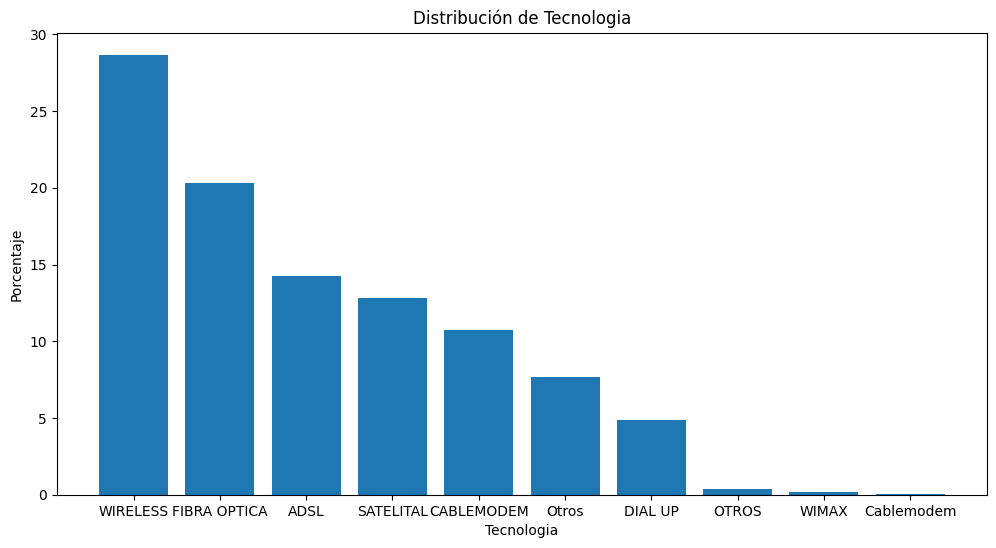

In [711]:
# Seleccionar las columnas que deseas utilizar
columna_x = 'Tecnologia'  # reemplaza con el nombre de la columna que deseas utilizar en el eje x
columna_y = 'Provincia'  # reemplaza con el nombre de la columna que deseas utilizar en el eje y

# Crear un gráfico de barras porcentual
plt.figure(figsize=(12, 6))
plt.bar(tecnologia_provincias[columna_x].value_counts().index, tecnologia_provincias[columna_x].value_counts().values / len(tecnologia_provincias) * 100)
plt.xlabel(columna_x)
plt.ylabel('Porcentaje')
plt.title('Distribución de ' + columna_x)
plt.show()

<Figure size 1500x600 with 0 Axes>

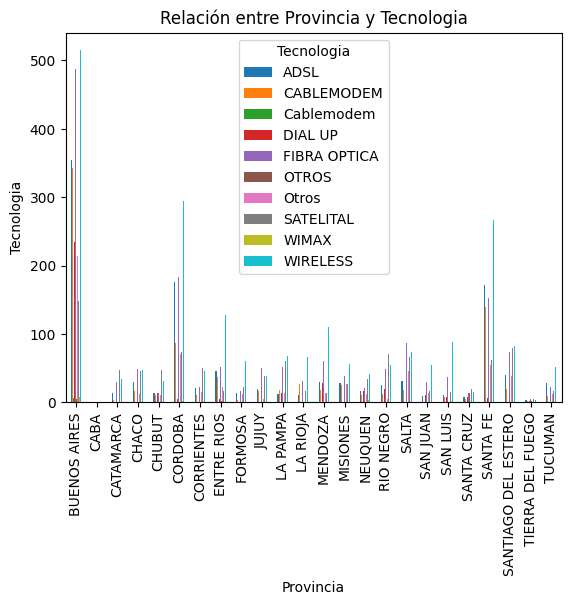

In [712]:
# Seleccionar las columnas que deseas utilizar
columna_x = 'Provincia'  # reemplaza con el nombre de la columna que deseas utilizar en el eje x
columna_y = 'Tecnologia'  # reemplaza con el nombre de la columna que deseas utilizar en el eje y

# Crear un gráfico de barras
plt.figure(figsize=(15, 6))
tecnologia_provincias.groupby(columna_x)[columna_y].value_counts().unstack().plot(kind='bar')
plt.xlabel(columna_x)
plt.ylabel(columna_y)
plt.title('Relación entre ' + columna_x + ' y ' + columna_y)
plt.show()

- ## Velocidad % por provincia

In [713]:
velocidad_provincias= pd.read_excel('DATASETS\Internet.xlsx', sheet_name='Velocidad % por prov')

In [714]:
velocidad_provincias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     1008 non-null   int64  
 1   Trimestre               1008 non-null   int64  
 2   Provincia               1008 non-null   object 
 3   Mbps (Media de bajada)  1008 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.6+ KB


<Figure size 2400x800 with 0 Axes>

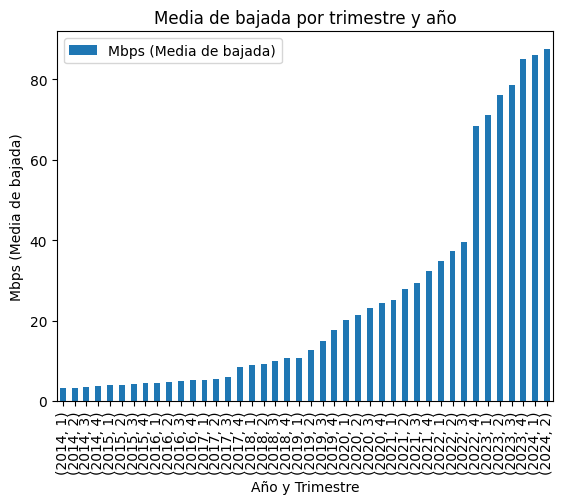

In [715]:
# Asumiendo que tu dataframe se llama 'velocidad_provincias'
df = velocidad_provincias

# Crea un dataframe pivot que combine las columnas 'Año' y 'Trimestre' en una sola columna
df_pivot = df.pivot_table(index=['Año', 'Trimestre'], values='Mbps (Media de bajada)', aggfunc='mean')

# Crea un gráfico de barras
plt.figure(figsize=(24, 8))
df_pivot.plot(kind='bar')

# Agrega etiquetas y título
plt.xlabel('Año y Trimestre')
plt.ylabel('Mbps (Media de bajada)')
plt.title('Media de bajada por trimestre y año')
plt.legend()

# Muestra el gráfico
plt.show()

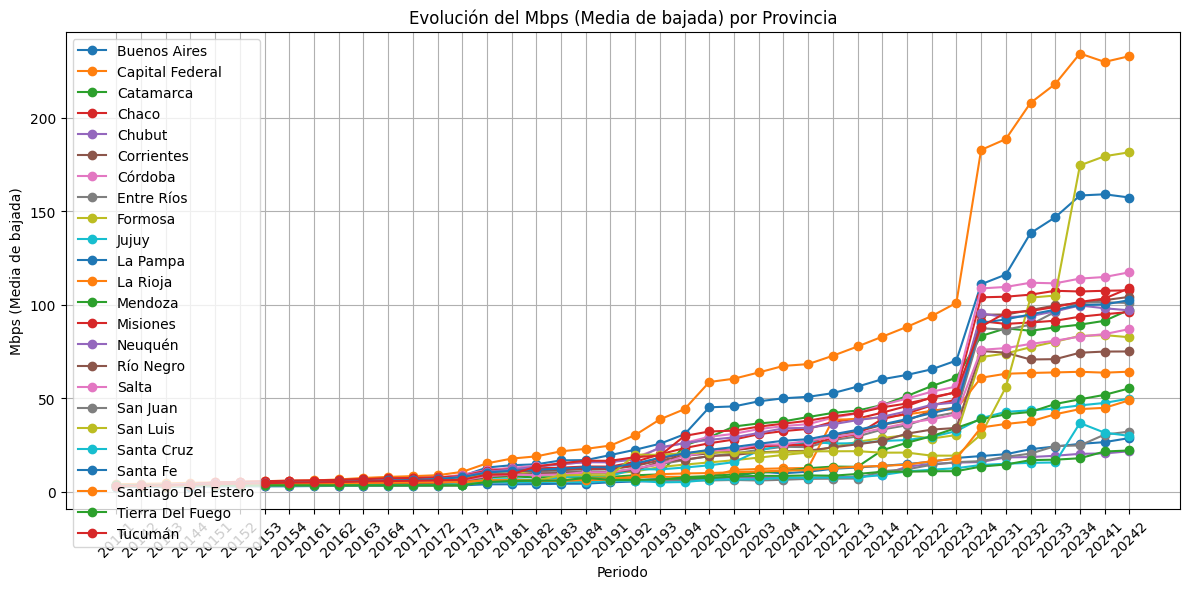

In [716]:
velocidad_provincias['Periodo'] = velocidad_provincias['Año'].astype(str) + velocidad_provincias['Trimestre'].astype(str)

df_pivot = velocidad_provincias.pivot(index='Periodo', columns='Provincia', values='Mbps (Media de bajada)')

plt.figure(figsize=(12, 6))
for provincia in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[provincia], marker='o', label=provincia)

plt.title('Evolución del Mbps (Media de bajada) por Provincia')
plt.xlabel('Periodo')
plt.ylabel('Mbps (Media de bajada)')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
velocidad_provincias.drop(columns='Periodo', inplace=True)

Se pueden observar ciertas particularidades en esta gráfica:

- A partir del 3er trimestre del año 2022 se nota un aumento general en la velocidad de internet a nivel nacional.
- El 3er trimestre de 2022 generó un crecimiento extremo a nivel nacional.

La métrica de velocidad de bajada promedio puede ser muy útil para medir desarrollo y/o tendencias comerciales en el sector.

In [717]:
totales_VMD= pd.read_excel('DATASETS\Internet.xlsx', sheet_name='Totales VMD')

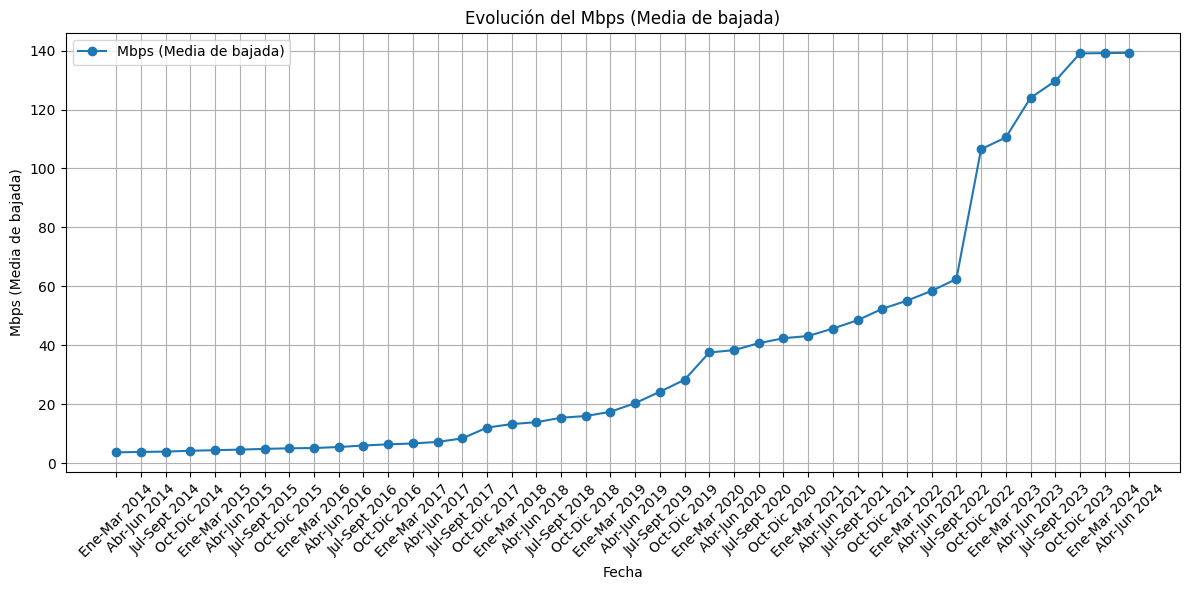

In [718]:
df_Totales_VMD_invertido = totales_VMD.iloc[::-1]

plt.figure(figsize=(12, 6))
plt.plot(df_Totales_VMD_invertido['Trimestre.1'], df_Totales_VMD_invertido['Mbps (Media de bajada)'], marker='o', label='Mbps (Media de bajada)')

plt.title('Evolución del Mbps (Media de bajada)')
plt.xlabel('Fecha')
plt.ylabel('Mbps (Media de bajada)')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- ## Total Accesos Por Tecnología

In [719]:
totales_accesos_tecnologia= pd.read_excel('DATASETS\Internet.xlsx', sheet_name='Totales Accesos Por Tecnología')

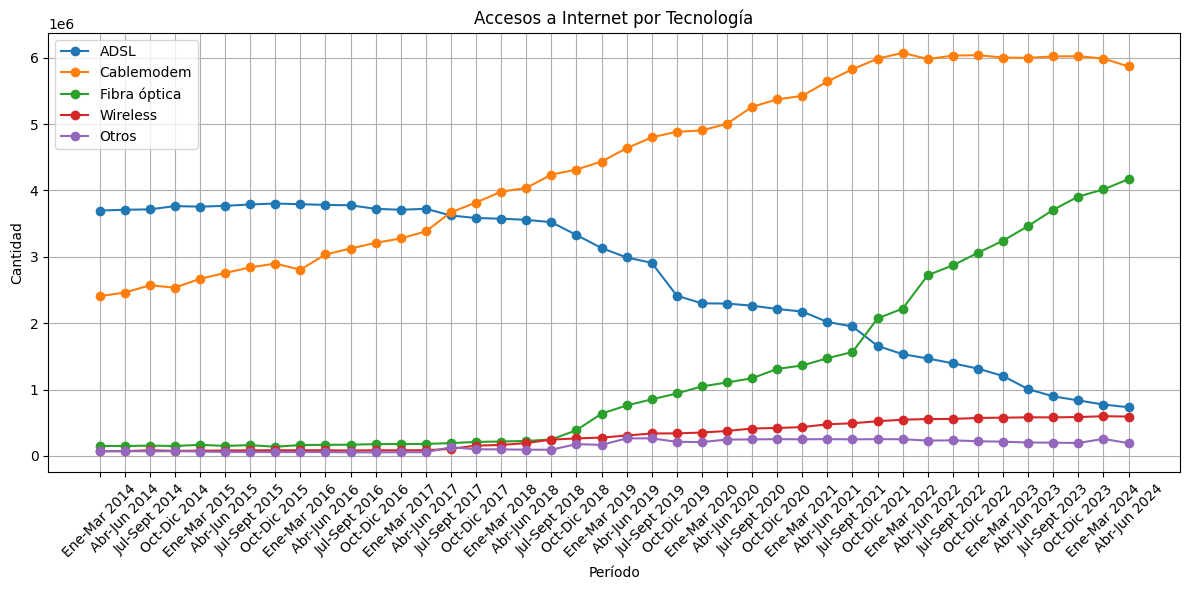

In [720]:
totales_accesos_tecnologia_Invertido = totales_accesos_tecnologia.iloc[::-1]

columnas_grafico = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

plt.figure(figsize=(12, 6))

for columna in columnas_grafico:
    plt.plot(totales_accesos_tecnologia_Invertido['Periodo'], totales_accesos_tecnologia_Invertido[columna], marker='o', label=columna)

plt.title('Accesos a Internet por Tecnología')
plt.xlabel('Período')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Se puede inferir en lo siguiente:

1. Durante el año 2018 al momento de popularizarse y volverse más accequible el cablemodem, empezó a reducirse la cantidad de accesos a internet a través de conexión ADSL.
2. Finalizando el año 2018 inició una tendencia de crecimiento en la cantidad de accesos a internet a través de fibra óptica.
3. En el año 2019 se mantuvo la tendencia de crecimiento en la cantidad de accesos a internet a través de fibra óptica.
4. A partir del segundo trimestre del año 2021, aumentó el uso del servicio de fibra óptica, curiosamente acelerando el desuso de los accesos a internet mediante la tecnología ADSL.
5. El uso de la tecnología cablemodem en el cuarto trimestre del año 2021, se mantuvo estable, pero con una tendencia de disminución en comparación último trimestre del año anterior.

- ## Accesos Por Tecnología

In [721]:
accesos_tecnologia= pd.read_excel('DATASETS\Internet.xlsx', sheet_name='Accesos Por Tecnología')

In [722]:
accesos_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           1007 non-null   object
 1   Trimestre     1007 non-null   object
 2   Provincia     1007 non-null   object
 3   ADSL          1007 non-null   int64 
 4   Cablemodem    1007 non-null   int64 
 5   Fibra óptica  1007 non-null   int64 
 6   Wireless      1007 non-null   int64 
 7   Otros         1007 non-null   int64 
 8   Total         1007 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 70.9+ KB


In [723]:
# Funcion de limpieza
def asteriscos_a_numeros(valor):
    if '*' in valor:
        sin_asterisco = valor.replace('*', '')
    else:
        sin_asterisco = valor
    return int(sin_asterisco)

In [724]:
accesos_tecnologia.dropna(inplace=True)

accesos_tecnologia['Año'] = accesos_tecnologia['Año'].astype(str).apply(asteriscos_a_numeros)
accesos_tecnologia['Trimestre'] = accesos_tecnologia['Trimestre'].astype(str).apply(asteriscos_a_numeros)

accesos_tecnologia.drop(columns=['Total'], inplace=True)

accesos_tecnologia.info()
accesos_tecnologia.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           1007 non-null   int64 
 1   Trimestre     1007 non-null   int64 
 2   Provincia     1007 non-null   object
 3   ADSL          1007 non-null   int64 
 4   Cablemodem    1007 non-null   int64 
 5   Fibra óptica  1007 non-null   int64 
 6   Wireless      1007 non-null   int64 
 7   Otros         1007 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.1+ KB


Año  Trimestre        Provincia    ADSL  Cablemodem  Fibra óptica  \
0  2024          2     Buenos Aires  214055     2722466       1849476   
1  2024          2  Capital Federal   54102     1144781        230402   
2  2024          2        Catamarca    4951       10303         58355   
3  2024          2            Chaco    9448       57935         68944   
4  2024          2           Chubut   25955       80704         26516   

   Wireless  Otros  
0    138638  64745  
1      4493  29821  
2      1384     81  
3      8407   2358  
4     31118   9930

- ## Dial-BAf

In [725]:
dial_baf= pd.read_excel('DATASETS\Internet.xlsx', sheet_name='Dial-BAf')

In [726]:
dial_baf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               1992 non-null   int64  
 1   Trimestre         1992 non-null   int64  
 2   Provincia         1992 non-null   object 
 3   Banda ancha fija  1992 non-null   int64  
 4   Dial up           1988 non-null   float64
 5   Total             1992 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 93.5+ KB


In [727]:
filas_con_nulos = dial_baf[dial_baf.isnull().any(axis=1)]
filas_con_nulos

Año  Trimestre Provincia  Banda ancha fija  Dial up   Total
0  2018          2   Formosa             44554      NaN   44554
1  2018          2  Misiones            106147      NaN  106147
2  2018          2   Formosa             44554      NaN   44554
3  2018          2  Misiones            106147      NaN  106147

In [728]:
dial_baf =dial_baf.fillna(0)

In [729]:
filas_duplicadas = dial_baf[dial_baf.duplicated(keep=False)]
print(filas_duplicadas)

       Año  Trimestre     Provincia  Banda ancha fija   Dial up    Total
0     2018          2       Formosa             44554      0.00    44554
1     2018          2      Misiones            106147      0.00   106147
2     2018          2       Formosa             44554      0.00    44554
3     2018          2      Misiones            106147      0.00   106147
4     2014          4  Buenos Aires           2801178 15,229.00  2816407
...    ...        ...           ...               ...       ...      ...
1987  2016          3       Formosa             27716      0.00    27716
1988  2016          3      Misiones             97997      0.00    97997
1989  2014          3      Misiones             75327      0.00    75327
1990  2014          2      Misiones             74689      0.00    74689
1991  2014          1      Misiones             73950      0.00    73950

[1968 rows x 6 columns]


In [730]:
dial_baf = dial_baf.drop_duplicates()

In [731]:
dial_baf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1008 entries, 0 to 1911
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               1008 non-null   int64  
 1   Trimestre         1008 non-null   int64  
 2   Provincia         1008 non-null   object 
 3   Banda ancha fija  1008 non-null   int64  
 4   Dial up           1008 non-null   float64
 5   Total             1008 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 55.1+ KB


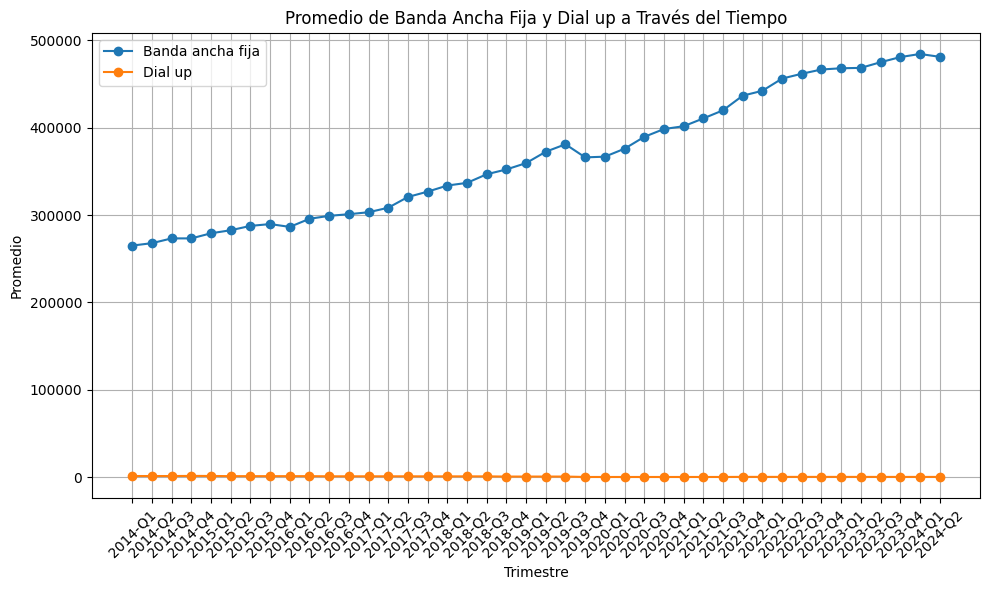

In [732]:
df_promedio = dial_baf.groupby(['Año', 'Trimestre']).agg({
    'Banda ancha fija': 'mean',
    'Dial up': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_promedio['Año'].astype(str) + '-Q' + df_promedio['Trimestre'].astype(str), df_promedio['Banda ancha fija'], marker='o', label='Banda ancha fija')
plt.plot(df_promedio['Año'].astype(str) + '-Q' + df_promedio['Trimestre'].astype(str), df_promedio['Dial up'], marker='o', label='Dial up')

plt.title('Promedio de Banda Ancha Fija y Dial up a Través del Tiempo')
plt.xlabel('Trimestre')
plt.ylabel('Promedio')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

- ## Totales Dial-BAf

In [733]:
totales_dial_baf= pd.read_excel('DATASETS\Internet.xlsx', sheet_name='Totales Dial-BAf')

In [734]:
totales_dial_baf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               42 non-null     int64 
 1   Trimestre         42 non-null     int64 
 2   Banda ancha fija  42 non-null     int64 
 3   Dial up           42 non-null     int64 
 4   Total             42 non-null     int64 
 5   Periodo           42 non-null     object
dtypes: int64(5), object(1)
memory usage: 2.1+ KB


- ## Penetración en hogares

In [735]:
penetracion_hogares= pd.read_excel('DATASETS\Internet.xlsx', sheet_name='Penetracion-hogares')

In [736]:
penetracion_hogares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           1000 non-null   int64  
 1   Trimestre                     1000 non-null   int64  
 2   Provincia                     1000 non-null   object 
 3   Accesos por cada 100 hogares  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


In [737]:
penetracion_hogares =penetracion_hogares.drop_duplicates()

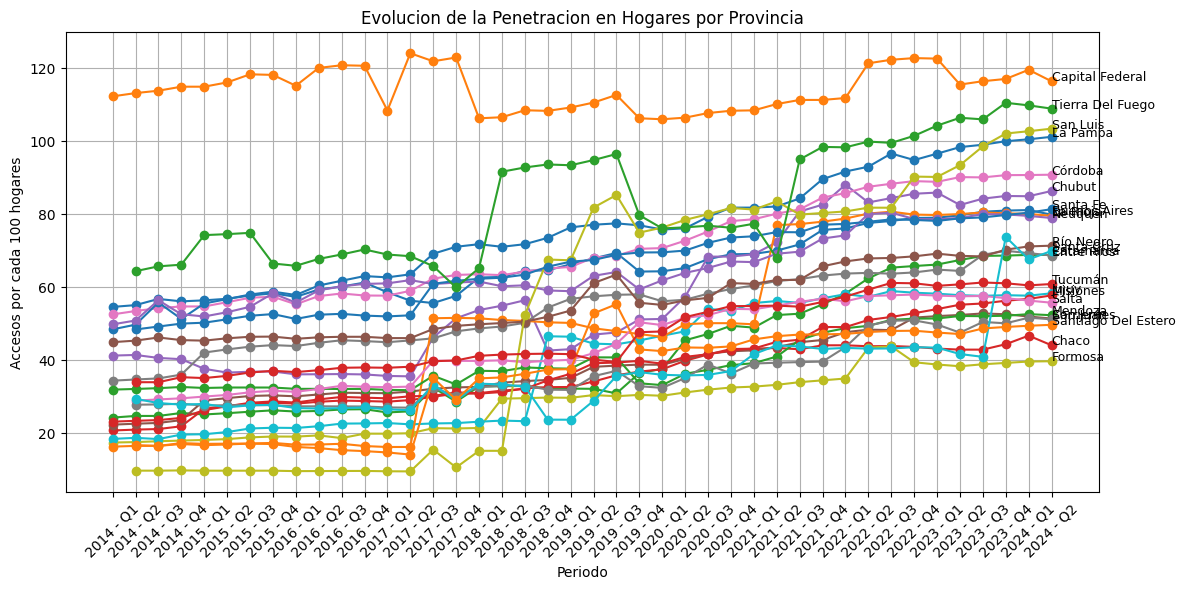

In [738]:
penetracion_hogares['Periodo'] = penetracion_hogares['Año'].astype(str) + ' - Q' + penetracion_hogares['Trimestre'].astype(str)

df_pivot = penetracion_hogares.pivot(index='Periodo', columns='Provincia', values='Accesos por cada 100 hogares')
penetracion_hogares.drop(columns=['Periodo'], inplace=True)

plt.figure(figsize=(12, 6))
for provincia in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[provincia], marker='o', label=provincia)
    
    plt.annotate(provincia, xy=(df_pivot.index[-1], df_pivot[provincia].iloc[-1]), xytext=(0, 0),
                textcoords='offset points', fontsize=9, color='black')

plt.title('Evolucion de la Penetracion en Hogares por Provincia')
plt.xlabel('Periodo')
plt.ylabel('Accesos por cada 100 hogares')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- ## Penetración en Población

In [739]:
penetracion_poblacion= pd.read_excel('DATASETS\Internet.xlsx', sheet_name='Penetración-poblacion')

In [740]:
penetracion_poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       1000 non-null   int64  
 1   Trimestre                 1000 non-null   int64  
 2   Provincia                 1000 non-null   object 
 3   Accesos por cada 100 hab  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


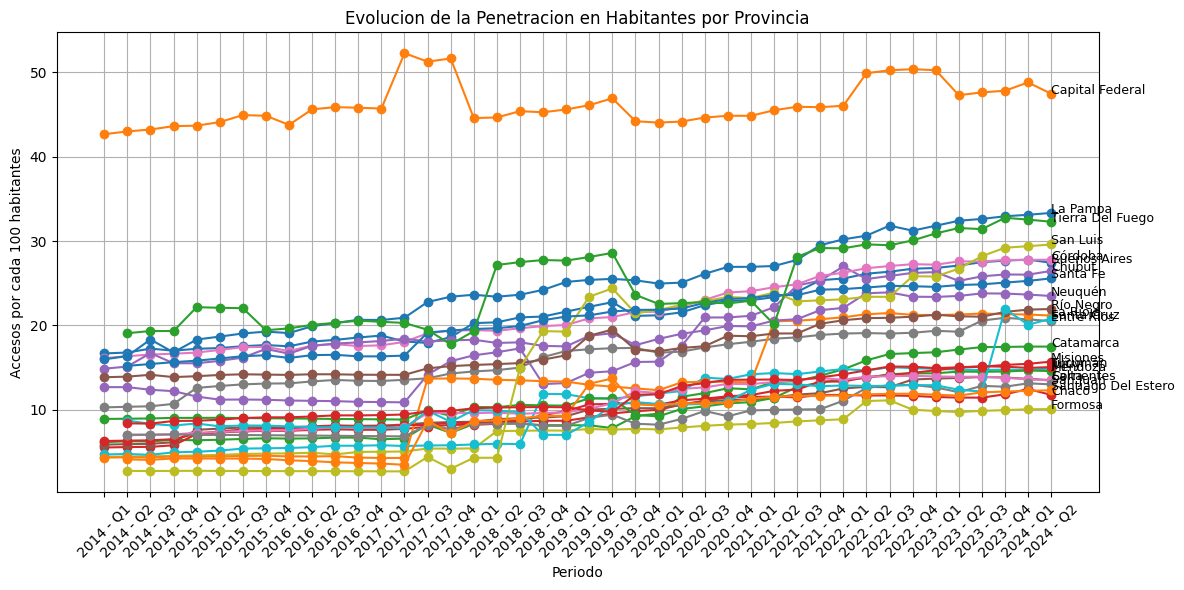

In [741]:
penetracion_poblacion['Periodo'] = penetracion_poblacion['Año'].astype(str) + ' - Q' + penetracion_poblacion['Trimestre'].astype(str)

df_pivot = penetracion_poblacion.pivot(index='Periodo', columns='Provincia', values='Accesos por cada 100 hab')

plt.figure(figsize=(12, 6))
for provincia in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[provincia], marker='o', label=provincia)
    
    plt.annotate(provincia, xy=(df_pivot.index[-1], df_pivot[provincia].iloc[-1]), xytext=(0, 0),
                textcoords='offset points', fontsize=9, color='black')


plt.title('Evolucion de la Penetracion en Habitantes por Provincia')
plt.xlabel('Periodo')
plt.ylabel('Accesos por cada 100 habitantes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- ## Penetración-totales

In [742]:
penetracion_totales= pd.read_excel('DATASETS\Internet.xlsx', sheet_name='Penetracion-totales')

In [743]:
penetracion_totales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           42 non-null     int64  
 1   Trimestre                     42 non-null     int64  
 2   Accesos por cada 100 hogares  42 non-null     float64
 3   Accesos por cada 100 hab      42 non-null     float64
 4   Periodo                       42 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.8+ KB


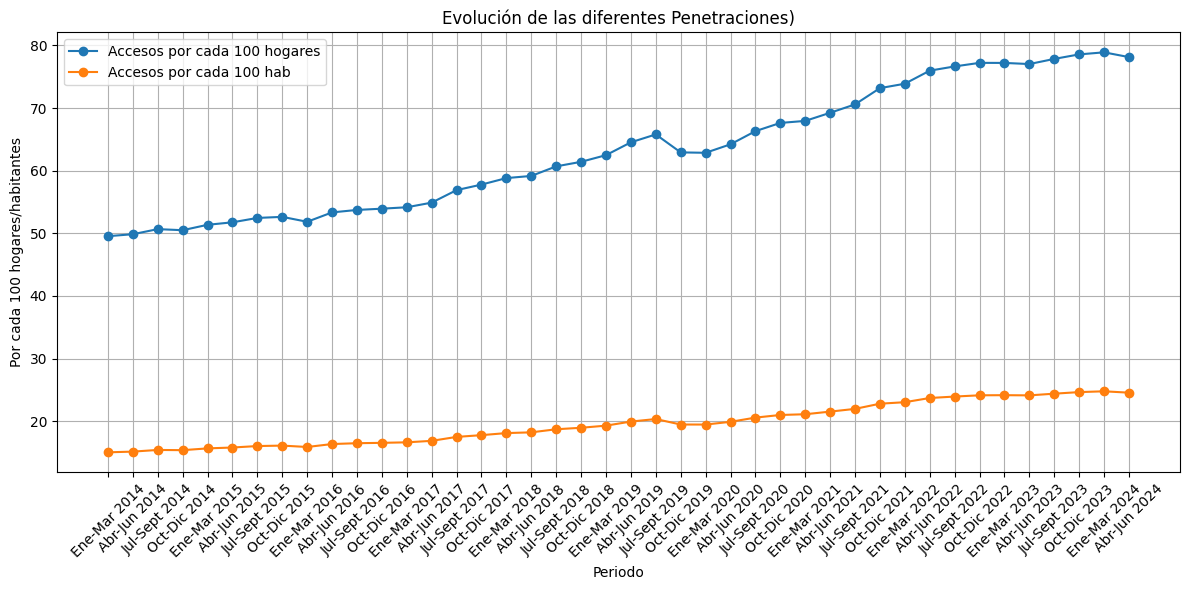

In [744]:
df_Penetracion_totales_invertido = penetracion_totales.iloc[::-1]

plt.figure(figsize=(12, 6))
plt.plot(df_Penetracion_totales_invertido['Periodo'], df_Penetracion_totales_invertido['Accesos por cada 100 hogares'], marker='o', label='Accesos por cada 100 hogares')
plt.plot(df_Penetracion_totales_invertido['Periodo'], df_Penetracion_totales_invertido['Accesos por cada 100 hab'], marker='o', label='Accesos por cada 100 hab')

plt.title('Evolución de las diferentes Penetraciones)')
plt.xlabel('Periodo')
plt.ylabel('Por cada 100 hogares/habitantes')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- ## Total accesos por rango

In [745]:
total_accesos_rango= pd.read_excel('DATASETS\Internet.xlsx', sheet_name='Totales Accesos por rango')

In [746]:
total_accesos_rango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Año                      42 non-null     int64
 1   Trimestre                42 non-null     int64
 2   Hasta 512 kbps           42 non-null     int64
 3   Entre 512 Kbps y 1 Mbps  42 non-null     int64
 4   Entre 1 Mbps y 6 Mbps    42 non-null     int64
 5   Entre 6 Mbps y 10 Mbps   42 non-null     int64
 6   Entre 10 Mbps y 20 Mbps  42 non-null     int64
 7   Entre 20 Mbps y 30 Mbps  42 non-null     int64
 8   Más de 30 Mbps           42 non-null     int64
 9   OTROS                    42 non-null     int64
 10  Total                    42 non-null     int64
dtypes: int64(11)
memory usage: 3.7 KB


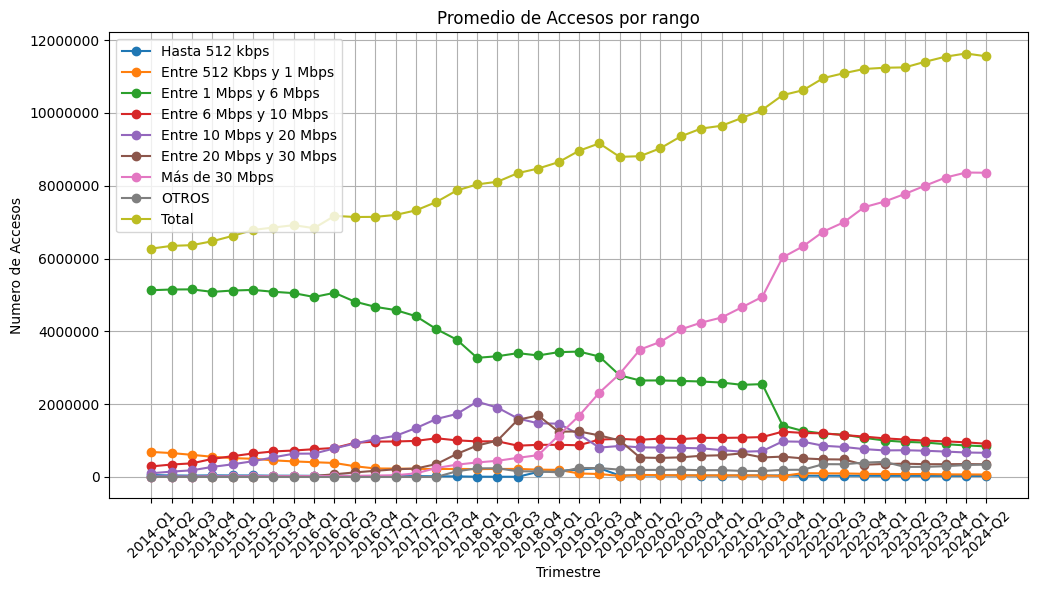

In [747]:
df_total_accesos_rango_invertido = total_accesos_rango.iloc[::-1]

plt.figure(figsize=(10, 6))
plt.plot(df_total_accesos_rango_invertido['Año'].astype(str) + '-Q' + df_total_accesos_rango_invertido['Trimestre'].astype(str), df_total_accesos_rango_invertido['Hasta 512 kbps'], marker='o', label='Hasta 512 kbps')
plt.plot(df_total_accesos_rango_invertido['Año'].astype(str) + '-Q' + df_total_accesos_rango_invertido['Trimestre'].astype(str), df_total_accesos_rango_invertido['Entre 512 Kbps y 1 Mbps'], marker='o', label='Entre 512 Kbps y 1 Mbps')
plt.plot(df_total_accesos_rango_invertido['Año'].astype(str) + '-Q' + df_total_accesos_rango_invertido['Trimestre'].astype(str), df_total_accesos_rango_invertido['Entre 1 Mbps y 6 Mbps'], marker='o', label='Entre 1 Mbps y 6 Mbps')
plt.plot(df_total_accesos_rango_invertido['Año'].astype(str) + '-Q' + df_total_accesos_rango_invertido['Trimestre'].astype(str), df_total_accesos_rango_invertido['Entre 6 Mbps y 10 Mbps'], marker='o', label='Entre 6 Mbps y 10 Mbps')
plt.plot(df_total_accesos_rango_invertido['Año'].astype(str) + '-Q' + df_total_accesos_rango_invertido['Trimestre'].astype(str), df_total_accesos_rango_invertido['Entre 10 Mbps y 20 Mbps'], marker='o', label='Entre 10 Mbps y 20 Mbps')
plt.plot(df_total_accesos_rango_invertido['Año'].astype(str) + '-Q' + df_total_accesos_rango_invertido['Trimestre'].astype(str), df_total_accesos_rango_invertido['Entre 20 Mbps y 30 Mbps'], marker='o', label='Entre 20 Mbps y 30 Mbps')
plt.plot(df_total_accesos_rango_invertido['Año'].astype(str) + '-Q' + df_total_accesos_rango_invertido['Trimestre'].astype(str), df_total_accesos_rango_invertido['Más de 30 Mbps'], marker='o', label='Más de 30 Mbps')
plt.plot(df_total_accesos_rango_invertido['Año'].astype(str) + '-Q' + df_total_accesos_rango_invertido['Trimestre'].astype(str), df_total_accesos_rango_invertido['OTROS'], marker='o', label='OTROS')
plt.plot(df_total_accesos_rango_invertido['Año'].astype(str) + '-Q' + df_total_accesos_rango_invertido['Trimestre'].astype(str), df_total_accesos_rango_invertido['Total'], marker='o', label='Total')

plt.title('Promedio de Accesos por rango')
plt.xlabel('Trimestre')
plt.ylabel('Numero de Accesos')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.show()

- ## Accesos por rango

In [748]:
accesos_por_rangos= pd.read_excel('DATASETS\Internet.xlsx', sheet_name='Accesos por rangos')

In [749]:
accesos_por_rangos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  1000 non-null   int64  
 1   Trimestre            1000 non-null   int64  
 2   Provincia            1000 non-null   object 
 3   HASTA 512 kbps       1000 non-null   float64
 4   + 512 Kbps - 1 Mbps  1000 non-null   float64
 5   + 1 Mbps - 6 Mbps    1000 non-null   float64
 6   + 6 Mbps - 10 Mbps   1000 non-null   float64
 7   + 10 Mbps - 20 Mbps  1000 non-null   float64
 8   + 20 Mbps - 30 Mbps  1000 non-null   float64
 9   + 30 Mbps            1000 non-null   float64
 10  OTROS                994 non-null    float64
 11  Total                1000 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 93.9+ KB


In [750]:
# Se rellenan los valores faltantes con 0
accesos_por_rangos.fillna(0, inplace=True)

In [751]:
accesos_por_rangos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  1000 non-null   int64  
 1   Trimestre            1000 non-null   int64  
 2   Provincia            1000 non-null   object 
 3   HASTA 512 kbps       1000 non-null   float64
 4   + 512 Kbps - 1 Mbps  1000 non-null   float64
 5   + 1 Mbps - 6 Mbps    1000 non-null   float64
 6   + 6 Mbps - 10 Mbps   1000 non-null   float64
 7   + 10 Mbps - 20 Mbps  1000 non-null   float64
 8   + 20 Mbps - 30 Mbps  1000 non-null   float64
 9   + 30 Mbps            1000 non-null   float64
 10  OTROS                1000 non-null   float64
 11  Total                1000 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 93.9+ KB


- ## Ingresos

In [752]:
ingresos= pd.read_excel('DATASETS\Internet.xlsx', sheet_name='Ingresos')

# Debido al tamaño de los numeros en la columna Ingresos utilizamos el siguiente codigo para evitar problemas de visualizacion
pd.options.display.float_format = '{:,.2f}'.format 

In [753]:
ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        42 non-null     int64  
 1   Trimestre                  42 non-null     int64  
 2   Ingresos (miles de pesos)  42 non-null     float64
 3   Periodo                    42 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


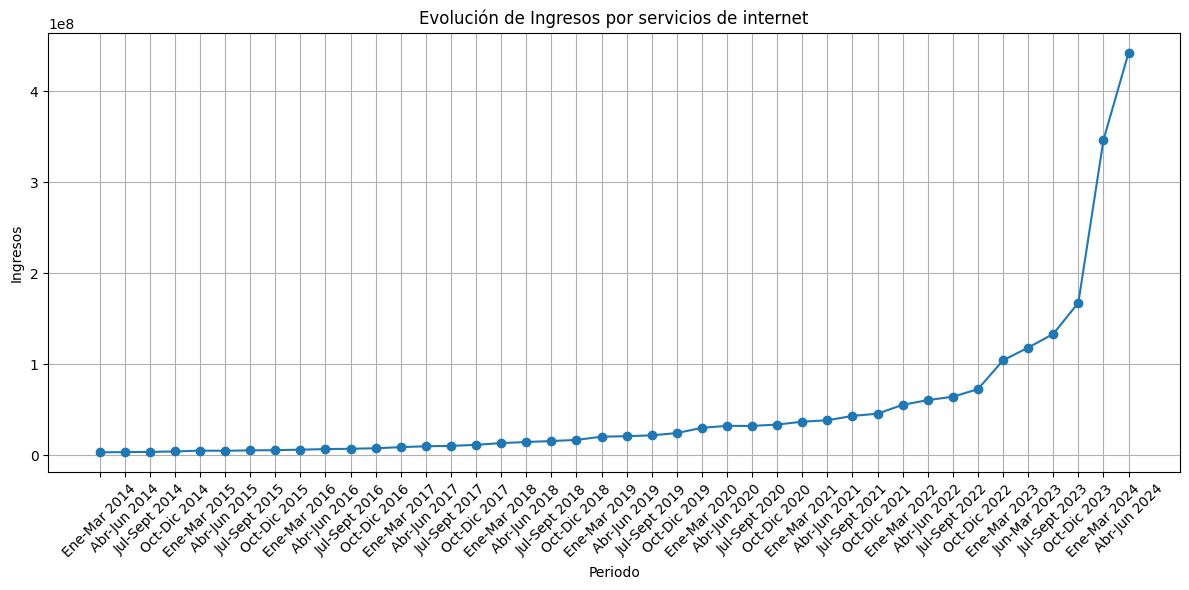

In [754]:
df_Ingresos_invertido = ingresos.iloc[::-1]

plt.figure(figsize=(12, 6))
plt.plot(df_Ingresos_invertido['Periodo'], df_Ingresos_invertido['Ingresos (miles de pesos)'], marker='o', label='Ingresos (miles de pesos)')

plt.title('Evolución de Ingresos por servicios de internet')
plt.xlabel('Periodo')
plt.ylabel('Ingresos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

MERGE de DATASETS

In [755]:
df = pd.merge(accesos_tecnologia.rename(columns={'Otros':'Otras Tecnologias'}), velocidad_provincias, on=['Año', 'Trimestre', 'Provincia'], how='inner')
df


Año  Trimestre            Provincia    ADSL  Cablemodem  Fibra óptica  \
0     2024          2         Buenos Aires  214055     2722466       1849476   
1     2024          2      Capital Federal   54102     1144781        230402   
2     2024          2            Catamarca    4951       10303         58355   
3     2024          2                Chaco    9448       57935         68944   
4     2024          2               Chubut   25955       80704         26516   
...    ...        ...                  ...     ...         ...           ...   
1002  2014          1           Santa Cruz   18927         100           381   
1003  2014          1             Santa Fe  322662      174296          3059   
1004  2014          1  Santiago Del Estero   32567        3598            19   
1005  2014          1     Tierra Del Fuego   21618        2837           648   
1006  2014          1              Tucumán  129717          83           121   

      Wireless  Otras Tecnologias  Mbps (Media de bajada)  
0       138638              64745                  157.41  
1         4493              29821                  233.01  
2         1384                 81                   97.38  
3         8407               2358                  107.76  
4        31118               9930                   21.67  
...        ...                ...                     ...  
1002      4092               3264                    3.32  
1003      5951                644                    3.15  
1004       915                 34                    2.95  
1005         1               2934                    3.45  
1006        13                 98                    3.21  

[1007 rows x 9 columns]

In [756]:
df = pd.merge(df, dial_baf.drop(columns='Total'), on=['Año', 'Trimestre', 'Provincia'], how='left')
df

Año  Trimestre            Provincia    ADSL  Cablemodem  Fibra óptica  \
0     2024          2         Buenos Aires  214055     2722466       1849476   
1     2024          2      Capital Federal   54102     1144781        230402   
2     2024          2            Catamarca    4951       10303         58355   
3     2024          2                Chaco    9448       57935         68944   
4     2024          2               Chubut   25955       80704         26516   
...    ...        ...                  ...     ...         ...           ...   
1002  2014          1           Santa Cruz   18927         100           381   
1003  2014          1             Santa Fe  322662      174296          3059   
1004  2014          1  Santiago Del Estero   32567        3598            19   
1005  2014          1     Tierra Del Fuego   21618        2837           648   
1006  2014          1              Tucumán  129717          83           121   

      Wireless  Otras Tecnologias  Mbps (Media de bajada)  Banda ancha fija  \
0       138638              64745                  157.41           4983480   
1         4493              29821                  233.01           1461549   
2         1384                 81                   97.38             75073   
3         8407               2358                  107.76            147087   
4        31118               9930                   21.67            173366   
...        ...                ...                     ...               ...   
1002      4092               3264                    3.32             26304   
1003      5951                644                    3.15            506000   
1004       915                 34                    2.95             37124   
1005         1               2934                    3.45             27272   
1006        13                 98                    3.21            129944   

      Dial up  
0    5,900.00  
1    2,050.00  
2        1.00  
3        5.00  
4      857.00  
...       ...  
1002   460.00  
1003   612.00  
1004     9.00  
1005   766.00  
1006    88.00  

[1007 rows x 11 columns]

In [757]:
df = pd.merge(df, penetracion_hogares, on=['Año', 'Trimestre', 'Provincia'], how='left')
df

Año  Trimestre            Provincia    ADSL  Cablemodem  Fibra óptica  \
0     2024          2         Buenos Aires  214055     2722466       1849476   
1     2024          2      Capital Federal   54102     1144781        230402   
2     2024          2            Catamarca    4951       10303         58355   
3     2024          2                Chaco    9448       57935         68944   
4     2024          2               Chubut   25955       80704         26516   
...    ...        ...                  ...     ...         ...           ...   
1002  2014          1           Santa Cruz   18927         100           381   
1003  2014          1             Santa Fe  322662      174296          3059   
1004  2014          1  Santiago Del Estero   32567        3598            19   
1005  2014          1     Tierra Del Fuego   21618        2837           648   
1006  2014          1              Tucumán  129717          83           121   

      Wireless  Otras Tecnologias  Mbps (Media de bajada)  Banda ancha fija  \
0       138638              64745                  157.41           4983480   
1         4493              29821                  233.01           1461549   
2         1384                 81                   97.38             75073   
3         8407               2358                  107.76            147087   
4        31118               9930                   21.67            173366   
...        ...                ...                     ...               ...   
1002      4092               3264                    3.32             26304   
1003      5951                644                    3.15            506000   
1004       915                 34                    2.95             37124   
1005         1               2934                    3.45             27272   
1006        13                 98                    3.21            129944   

      Dial up  Accesos por cada 100 hogares  
0    5,900.00                         79.84  
1    2,050.00                        116.37  
2        1.00                         68.81  
3        5.00                         44.06  
4      857.00                         86.33  
...       ...                           ...  
1002   460.00                           NaN  
1003   612.00                           NaN  
1004     9.00                           NaN  
1005   766.00                           NaN  
1006    88.00                           NaN  

[1007 rows x 12 columns]

In [758]:
df['Accesos por cada 100 hogares'] = df['Accesos por cada 100 hogares'].fillna(0)

In [759]:
df = pd.merge(df, penetracion_poblacion.drop(columns='Periodo'), on=['Año', 'Trimestre', 'Provincia'], how='left')
df

Año  Trimestre            Provincia    ADSL  Cablemodem  Fibra óptica  \
0     2024          2         Buenos Aires  214055     2722466       1849476   
1     2024          2      Capital Federal   54102     1144781        230402   
2     2024          2            Catamarca    4951       10303         58355   
3     2024          2                Chaco    9448       57935         68944   
4     2024          2               Chubut   25955       80704         26516   
...    ...        ...                  ...     ...         ...           ...   
1002  2014          1           Santa Cruz   18927         100           381   
1003  2014          1             Santa Fe  322662      174296          3059   
1004  2014          1  Santiago Del Estero   32567        3598            19   
1005  2014          1     Tierra Del Fuego   21618        2837           648   
1006  2014          1              Tucumán  129717          83           121   

      Wireless  Otras Tecnologias  Mbps (Media de bajada)  Banda ancha fija  \
0       138638              64745                  157.41           4983480   
1         4493              29821                  233.01           1461549   
2         1384                 81                   97.38             75073   
3         8407               2358                  107.76            147087   
4        31118               9930                   21.67            173366   
...        ...                ...                     ...               ...   
1002      4092               3264                    3.32             26304   
1003      5951                644                    3.15            506000   
1004       915                 34                    2.95             37124   
1005         1               2934                    3.45             27272   
1006        13                 98                    3.21            129944   

      Dial up  Accesos por cada 100 hogares  Accesos por cada 100 hab  
0    5,900.00                         79.84                     27.43  
1    2,050.00                        116.37                     47.44  
2        1.00                         68.81                     17.50  
3        5.00                         44.06                     11.78  
4      857.00                         86.33                     26.46  
...       ...                           ...                       ...  
1002   460.00                          0.00                       NaN  
1003   612.00                          0.00                       NaN  
1004     9.00                          0.00                       NaN  
1005   766.00                          0.00                       NaN  
1006    88.00                          0.00                       NaN  

[1007 rows x 13 columns]

In [760]:
df['Accesos por cada 100 hab'] = df['Accesos por cada 100 hab'].fillna(0)

In [761]:
df = pd.merge(df, accesos_por_rangos.drop(columns='Total').rename(columns={'OTROS':'Otras Velocidades'}), on=['Año', 'Trimestre', 'Provincia'], how='left')
df

Año  Trimestre            Provincia    ADSL  Cablemodem  Fibra óptica  \
0     2024          2         Buenos Aires  214055     2722466       1849476   
1     2024          2      Capital Federal   54102     1144781        230402   
2     2024          2            Catamarca    4951       10303         58355   
3     2024          2                Chaco    9448       57935         68944   
4     2024          2               Chubut   25955       80704         26516   
...    ...        ...                  ...     ...         ...           ...   
1002  2014          1           Santa Cruz   18927         100           381   
1003  2014          1             Santa Fe  322662      174296          3059   
1004  2014          1  Santiago Del Estero   32567        3598            19   
1005  2014          1     Tierra Del Fuego   21618        2837           648   
1006  2014          1              Tucumán  129717          83           121   

      Wireless  Otras Tecnologias  Mbps (Media de bajada)  Banda ancha fija  \
0       138638              64745                  157.41           4983480   
1         4493              29821                  233.01           1461549   
2         1384                 81                   97.38             75073   
3         8407               2358                  107.76            147087   
4        31118               9930                   21.67            173366   
...        ...                ...                     ...               ...   
1002      4092               3264                    3.32             26304   
1003      5951                644                    3.15            506000   
1004       915                 34                    2.95             37124   
1005         1               2934                    3.45             27272   
1006        13                 98                    3.21            129944   

      ...  Accesos por cada 100 hogares  Accesos por cada 100 hab  \
0     ...                         79.84                     27.43   
1     ...                        116.37                     47.44   
2     ...                         68.81                     17.50   
3     ...                         44.06                     11.78   
4     ...                         86.33                     26.46   
...   ...                           ...                       ...   
1002  ...                          0.00                      0.00   
1003  ...                          0.00                      0.00   
1004  ...                          0.00                      0.00   
1005  ...                          0.00                      0.00   
1006  ...                          0.00                      0.00   

      HASTA 512 kbps  + 512 Kbps - 1 Mbps  + 1 Mbps - 6 Mbps  \
0          25,287.00            23,034.00         222,627.00   
1             518.00             4,122.00          24,539.00   
2              72.00               164.00           2,660.00   
3             236.00               349.00          14,594.00   
4             125.00             1,139.00          43,699.00   
...              ...                  ...                ...   
1002             NaN                  NaN                NaN   
1003             NaN                  NaN                NaN   
1004             NaN                  NaN                NaN   
1005             NaN                  NaN                NaN   
1006             NaN                  NaN                NaN   

      + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  + 20 Mbps - 30 Mbps  \
0             221,660.00           244,528.00           106,302.00   
1              40,296.00            33,158.00             5,633.00   
2               3,093.00             3,799.00             1,279.00   
3               8,336.00             6,208.00             6,454.00   
4              31,971.00            22,696.00            19,827.00   
...                  ...                  ...                  ...   
1002     

In [762]:
df[['HASTA 512 kbps','+ 512 Kbps - 1 Mbps','+ 1 Mbps - 6 Mbps']] = df[['HASTA 512 kbps','+ 512 Kbps - 1 Mbps','+ 1 Mbps - 6 Mbps']].fillna(0)

In [763]:
df[['+ 6 Mbps - 10 Mbps','+ 10 Mbps - 20 Mbps','+ 20 Mbps - 30 Mbps','+ 30 Mbps','Otras Velocidades']] = df[['+ 6 Mbps - 10 Mbps','+ 10 Mbps - 20 Mbps','+ 20 Mbps - 30 Mbps','+ 30 Mbps','Otras Velocidades']].fillna(0)

In [764]:
df

Año  Trimestre            Provincia    ADSL  Cablemodem  Fibra óptica  \
0     2024          2         Buenos Aires  214055     2722466       1849476   
1     2024          2      Capital Federal   54102     1144781        230402   
2     2024          2            Catamarca    4951       10303         58355   
3     2024          2                Chaco    9448       57935         68944   
4     2024          2               Chubut   25955       80704         26516   
...    ...        ...                  ...     ...         ...           ...   
1002  2014          1           Santa Cruz   18927         100           381   
1003  2014          1             Santa Fe  322662      174296          3059   
1004  2014          1  Santiago Del Estero   32567        3598            19   
1005  2014          1     Tierra Del Fuego   21618        2837           648   
1006  2014          1              Tucumán  129717          83           121   

      Wireless  Otras Tecnologias  Mbps (Media de bajada)  Banda ancha fija  \
0       138638              64745                  157.41           4983480   
1         4493              29821                  233.01           1461549   
2         1384                 81                   97.38             75073   
3         8407               2358                  107.76            147087   
4        31118               9930                   21.67            173366   
...        ...                ...                     ...               ...   
1002      4092               3264                    3.32             26304   
1003      5951                644                    3.15            506000   
1004       915                 34                    2.95             37124   
1005         1               2934                    3.45             27272   
1006        13                 98                    3.21            129944   

      ...  Accesos por cada 100 hogares  Accesos por cada 100 hab  \
0     ...                         79.84                     27.43   
1     ...                        116.37                     47.44   
2     ...                         68.81                     17.50   
3     ...                         44.06                     11.78   
4     ...                         86.33                     26.46   
...   ...                           ...                       ...   
1002  ...                          0.00                      0.00   
1003  ...                          0.00                      0.00   
1004  ...                          0.00                      0.00   
1005  ...                          0.00                      0.00   
1006  ...                          0.00                      0.00   

      HASTA 512 kbps  + 512 Kbps - 1 Mbps  + 1 Mbps - 6 Mbps  \
0          25,287.00            23,034.00         222,627.00   
1             518.00             4,122.00          24,539.00   
2              72.00               164.00           2,660.00   
3             236.00               349.00          14,594.00   
4             125.00             1,139.00          43,699.00   
...              ...                  ...                ...   
1002            0.00                 0.00               0.00   
1003            0.00                 0.00               0.00   
1004            0.00                 0.00               0.00   
1005            0.00                 0.00               0.00   
1006            0.00                 0.00               0.00   

      + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  + 20 Mbps - 30 Mbps  \
0             221,660.00           244,528.00           106,302.00   
1              40,296.00            33,158.00             5,633.00   
2               3,093.00             3,799.00             1,279.00   
3               8,336.00             6,208.00             6,454.00   
4              31,971.00            22,696.00            19,827.00   
...                  ...                  ...                  ...   
1002     

In [765]:
df['Periodo'] = df['Año'].astype(str) + ' - Q' + df['Trimestre'].astype(str)
df


Año  Trimestre            Provincia    ADSL  Cablemodem  Fibra óptica  \
0     2024          2         Buenos Aires  214055     2722466       1849476   
1     2024          2      Capital Federal   54102     1144781        230402   
2     2024          2            Catamarca    4951       10303         58355   
3     2024          2                Chaco    9448       57935         68944   
4     2024          2               Chubut   25955       80704         26516   
...    ...        ...                  ...     ...         ...           ...   
1002  2014          1           Santa Cruz   18927         100           381   
1003  2014          1             Santa Fe  322662      174296          3059   
1004  2014          1  Santiago Del Estero   32567        3598            19   
1005  2014          1     Tierra Del Fuego   21618        2837           648   
1006  2014          1              Tucumán  129717          83           121   

      Wireless  Otras Tecnologias  Mbps (Media de bajada)  Banda ancha fija  \
0       138638              64745                  157.41           4983480   
1         4493              29821                  233.01           1461549   
2         1384                 81                   97.38             75073   
3         8407               2358                  107.76            147087   
4        31118               9930                   21.67            173366   
...        ...                ...                     ...               ...   
1002      4092               3264                    3.32             26304   
1003      5951                644                    3.15            506000   
1004       915                 34                    2.95             37124   
1005         1               2934                    3.45             27272   
1006        13                 98                    3.21            129944   

      ...  Accesos por cada 100 hab  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0     ...                     27.43       25,287.00            23,034.00   
1     ...                     47.44          518.00             4,122.00   
2     ...                     17.50           72.00               164.00   
3     ...                     11.78          236.00               349.00   
4     ...                     26.46          125.00             1,139.00   
...   ...                       ...             ...                  ...   
1002  ...                      0.00            0.00                 0.00   
1003  ...                      0.00            0.00                 0.00   
1004  ...                      0.00            0.00                 0.00   
1005  ...                      0.00            0.00                 0.00   
1006  ...                      0.00            0.00                 0.00   

      + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
0            222,627.00          221,660.00           244,528.00   
1             24,539.00           40,296.00            33,158.00   
2              2,660.00            3,093.00             3,799.00   
3             14,594.00            8,336.00             6,208.00   
4             43,699.00           31,971.00            22,696.00   
...                 ...                 ...                  ...   
1002               0.00                0.00                 0.00   
1003               0.00                0.00                 0.00   
1004               0.00                0.00                 0.00   
1005               0.00                0.00                 0.00   
1006               0.00                0.00                 0.00   

      + 20 Mbps - 30 Mbps    + 30 Mbps  Otras Velocidades    Periodo  
0              106,302.00 4,020,395.00         125,547.00  2024 - Q2  
1                5,633.00 1,355,333.00               0.00  2024 - Q2  
2                1,279.00    63,954.00              53.00  2024 - Q2  
3                6,454.00   107,707.00           3,208.00  2024 - Q2  
4           

In [766]:
#Rotamos para que queden las primeras fechas primeras (facilitar graficos)
df = df[::-1]
df

Año  Trimestre            Provincia    ADSL  Cablemodem  Fibra óptica  \
1006  2014          1              Tucumán  129717          83           121   
1005  2014          1     Tierra Del Fuego   21618        2837           648   
1004  2014          1  Santiago Del Estero   32567        3598            19   
1003  2014          1             Santa Fe  322662      174296          3059   
1002  2014          1           Santa Cruz   18927         100           381   
...    ...        ...                  ...     ...         ...           ...   
4     2024          2               Chubut   25955       80704         26516   
3     2024          2                Chaco    9448       57935         68944   
2     2024          2            Catamarca    4951       10303         58355   
1     2024          2      Capital Federal   54102     1144781        230402   
0     2024          2         Buenos Aires  214055     2722466       1849476   

      Wireless  Otras Tecnologias  Mbps (Media de bajada)  Banda ancha fija  \
1006        13                 98                    3.21            129944   
1005         1               2934                    3.45             27272   
1004       915                 34                    2.95             37124   
1003      5951                644                    3.15            506000   
1002      4092               3264                    3.32             26304   
...        ...                ...                     ...               ...   
4        31118               9930                   21.67            173366   
3         8407               2358                  107.76            147087   
2         1384                 81                   97.38             75073   
1         4493              29821                  233.01           1461549   
0       138638              64745                  157.41           4983480   

      ...  Accesos por cada 100 hab  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
1006  ...                      0.00            0.00                 0.00   
1005  ...                      0.00            0.00                 0.00   
1004  ...                      0.00            0.00                 0.00   
1003  ...                      0.00            0.00                 0.00   
1002  ...                      0.00            0.00                 0.00   
...   ...                       ...             ...                  ...   
4     ...                     26.46          125.00             1,139.00   
3     ...                     11.78          236.00               349.00   
2     ...                     17.50           72.00               164.00   
1     ...                     47.44          518.00             4,122.00   
0     ...                     27.43       25,287.00            23,034.00   

      + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
1006               0.00                0.00                 0.00   
1005               0.00                0.00                 0.00   
1004               0.00                0.00                 0.00   
1003               0.00                0.00                 0.00   
1002               0.00                0.00                 0.00   
...                 ...                 ...                  ...   
4             43,699.00           31,971.00            22,696.00   
3             14,594.00            8,336.00             6,208.00   
2              2,660.00            3,093.00             3,799.00   
1             24,539.00           40,296.00            33,158.00   
0            222,627.00          221,660.00           244,528.00   

      + 20 Mbps - 30 Mbps    + 30 Mbps  Otras Velocidades    Periodo  
1006                 0.00         0.00               0.00  2014 - Q1  
1005                 0.00         0.00               0.00  2014 - Q1  
1004                 0.00         0.00               0.00  2014 - Q1  
1003                 0.00         0.00               0.00  2014 - Q1  
1002        

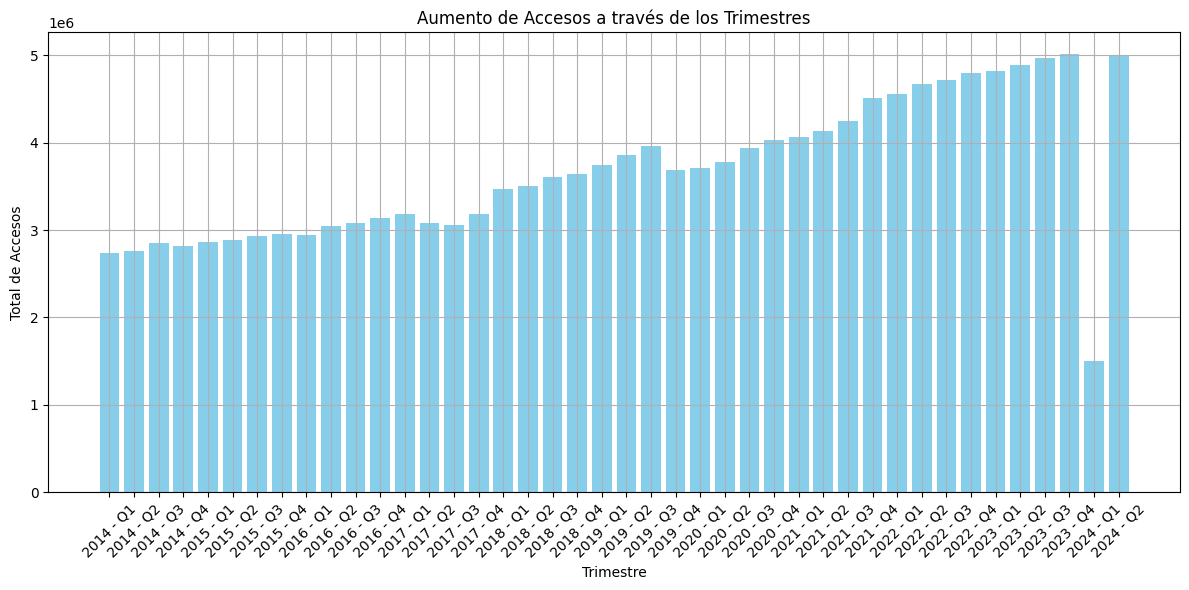

In [767]:
accesos = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otras Tecnologias']
accesos_tot = df[accesos].sum(axis=1)

plt.figure(figsize=(12, 6))

plt.bar(df['Periodo'], accesos_tot, color='skyblue')

plt.xlabel('Trimestre')
plt.ylabel('Total de Accesos')
plt.title('Aumento de Accesos a través de los Trimestres')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

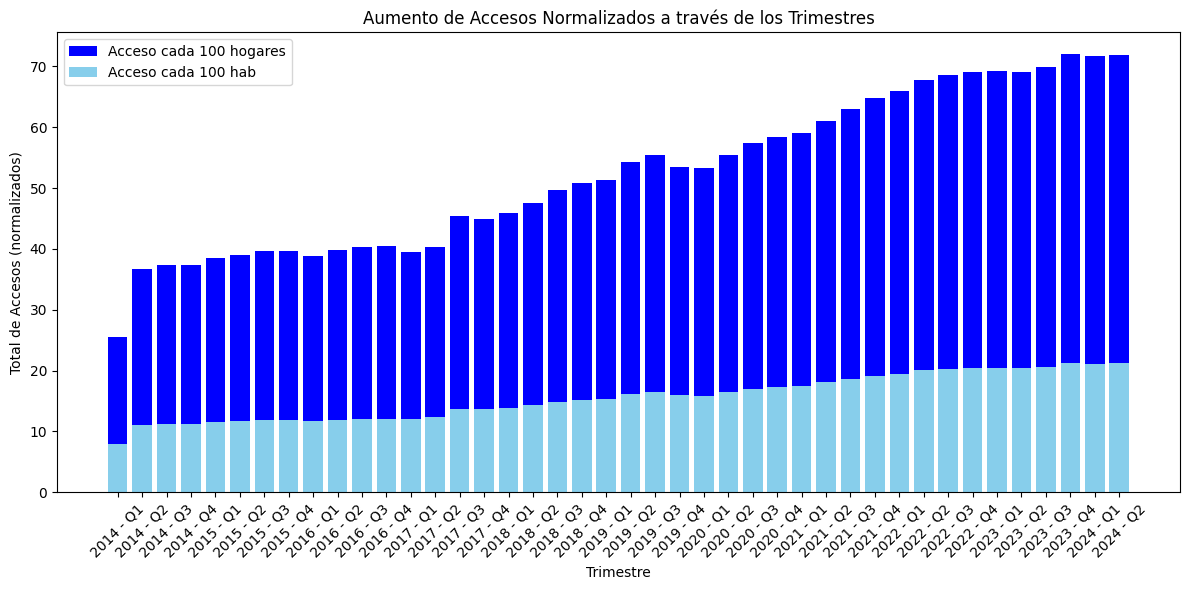

In [768]:
plt.figure(figsize=(12, 6))

promedio_accesos_por_100_hogares_nacional = df.groupby('Periodo')['Accesos por cada 100 hogares'].mean()
promedio_accesos_por_100_hab_nacional = df.groupby('Periodo')['Accesos por cada 100 hab'].mean()

plt.bar(df['Periodo'].unique(), promedio_accesos_por_100_hogares_nacional, color='blue', label='Acceso cada 100 hogares')
plt.bar(df['Periodo'].unique(), promedio_accesos_por_100_hab_nacional, color='skyblue', label='Acceso cada 100 hab')

plt.xlabel('Trimestre')
plt.ylabel('Total de Accesos (normalizados)')
plt.title('Aumento de Accesos Normalizados a través de los Trimestres')
plt.xticks(rotation=45)
plt.tight_layout()

plt.legend()

plt.show()

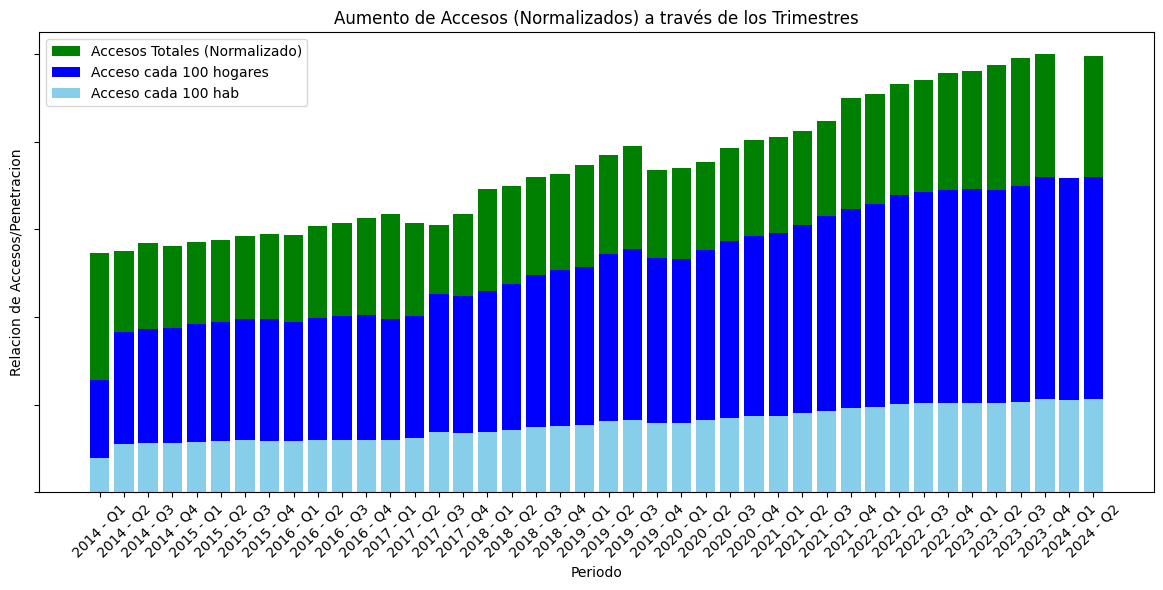

In [769]:
df_norma = df.copy()

df_norma['tot_accesos'] = df[accesos].sum(axis=1)
df_norma['tot_accesos'] = df_norma['tot_accesos']/df_norma['tot_accesos'].max() * 100

plt.figure(figsize=(12, 6))

plt.bar(df_norma['Periodo'], df_norma['tot_accesos'], color='green', label='Accesos Totales (Normalizado)')

plt.bar(df['Periodo'].unique(), promedio_accesos_por_100_hogares_nacional, color='blue', label='Acceso cada 100 hogares')
plt.bar(df['Periodo'].unique(), promedio_accesos_por_100_hab_nacional, color='skyblue', label='Acceso cada 100 hab')


plt.xlabel('Periodo')
plt.ylabel('Relacion de Accesos/Penetracion')
plt.title('Aumento de Accesos (Normalizados) a través de los Trimestres')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().set_yticklabels([])
plt.legend()
plt.show()

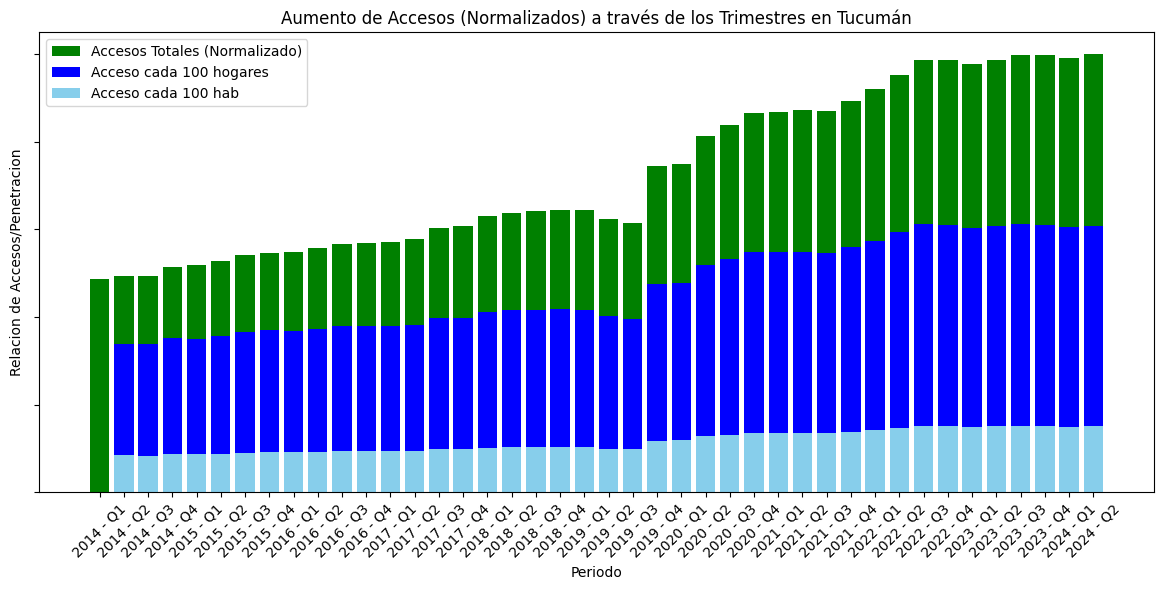

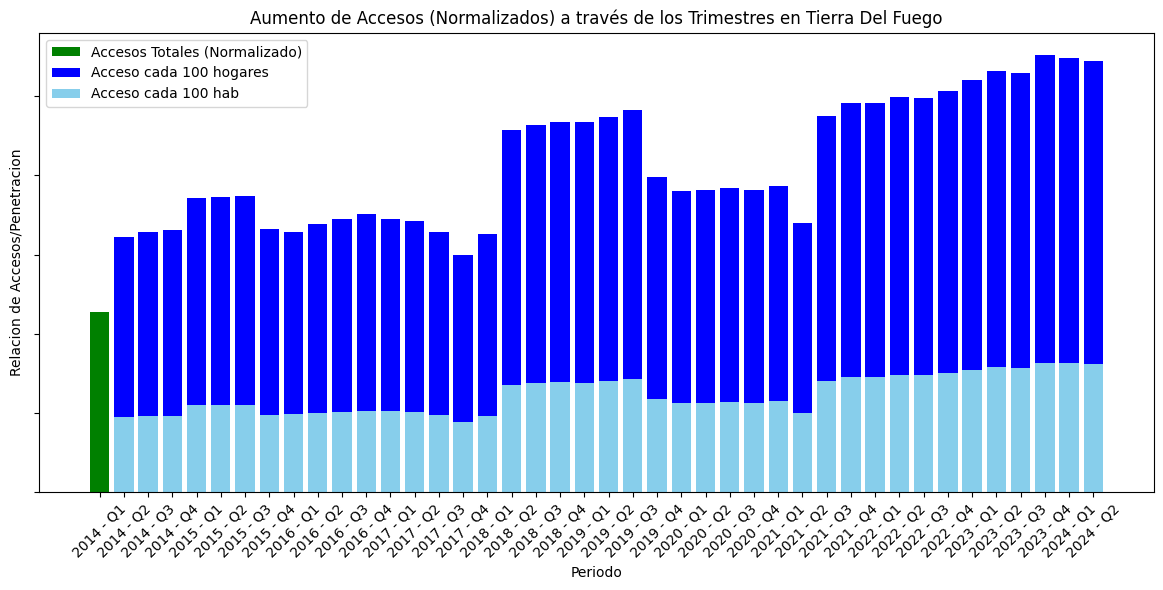

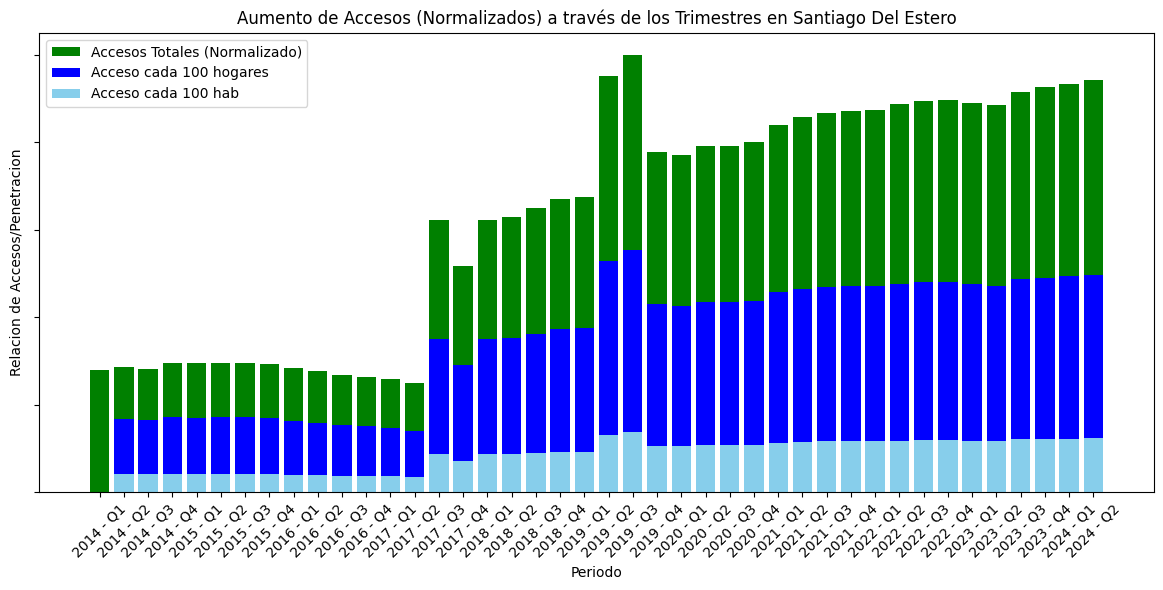

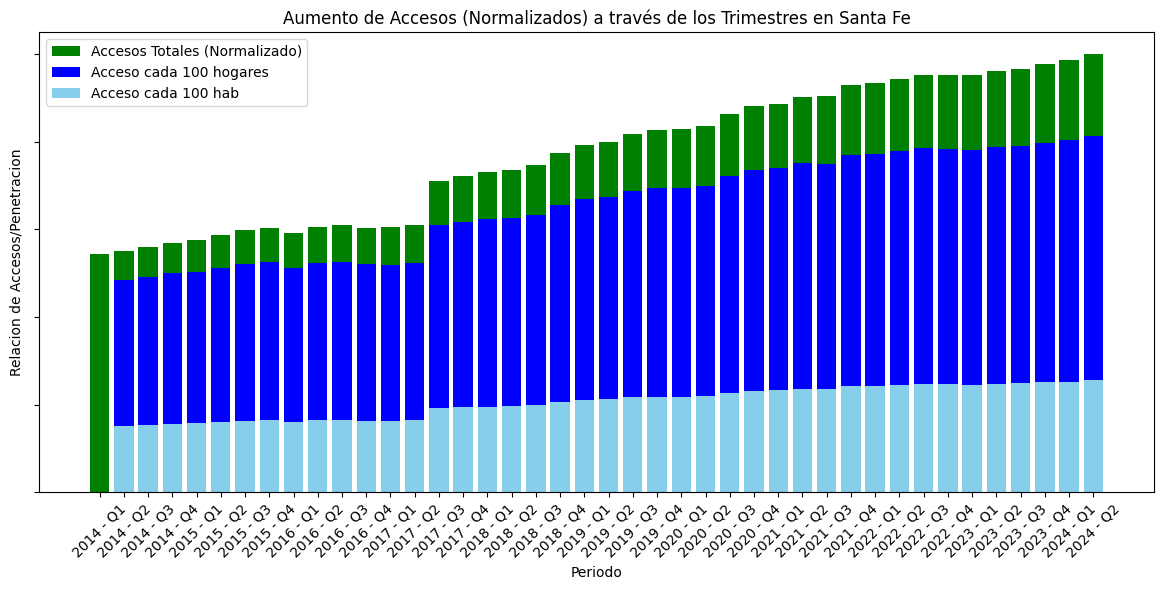

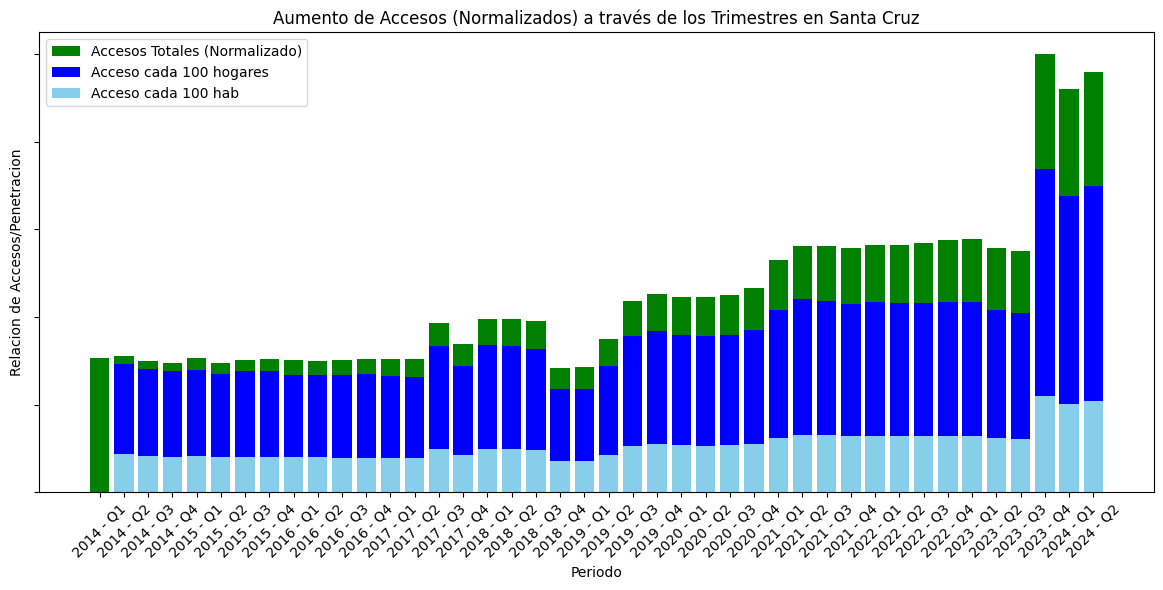

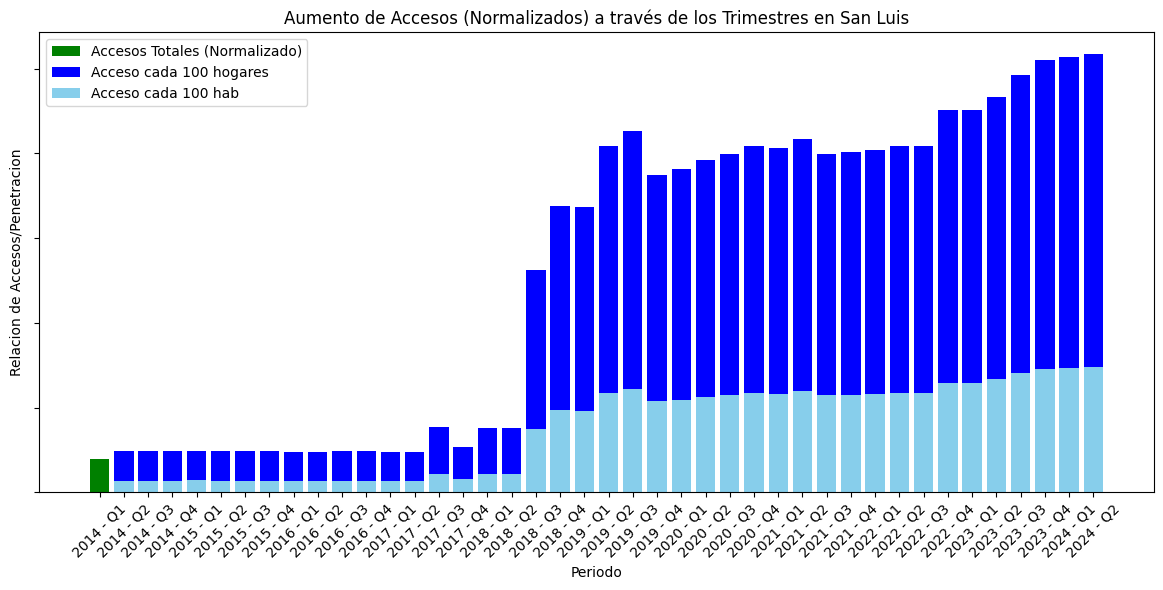

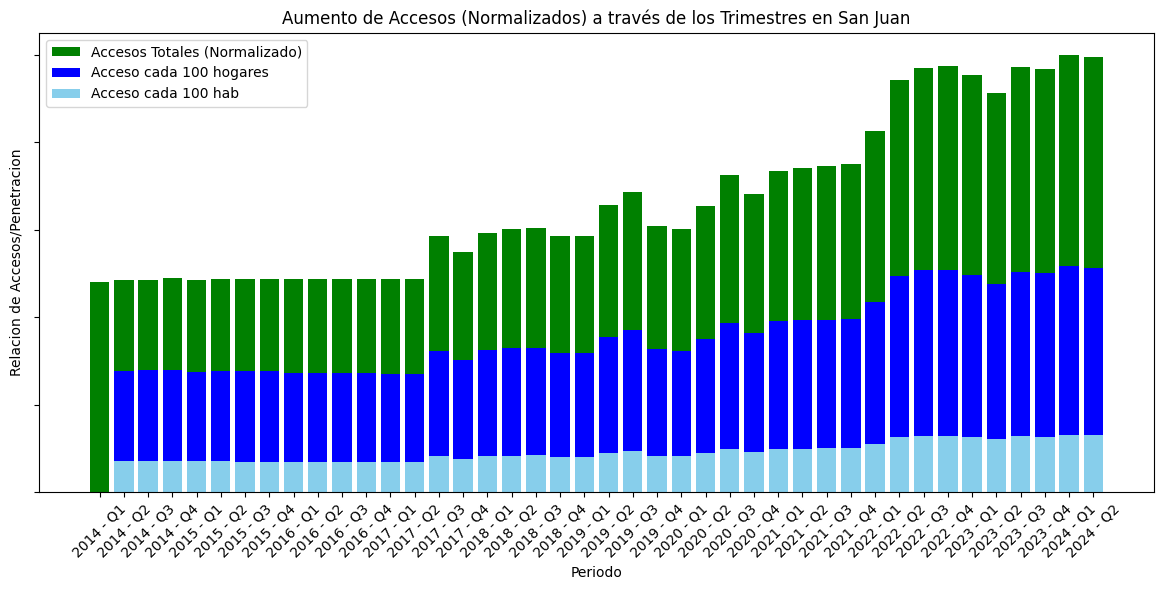

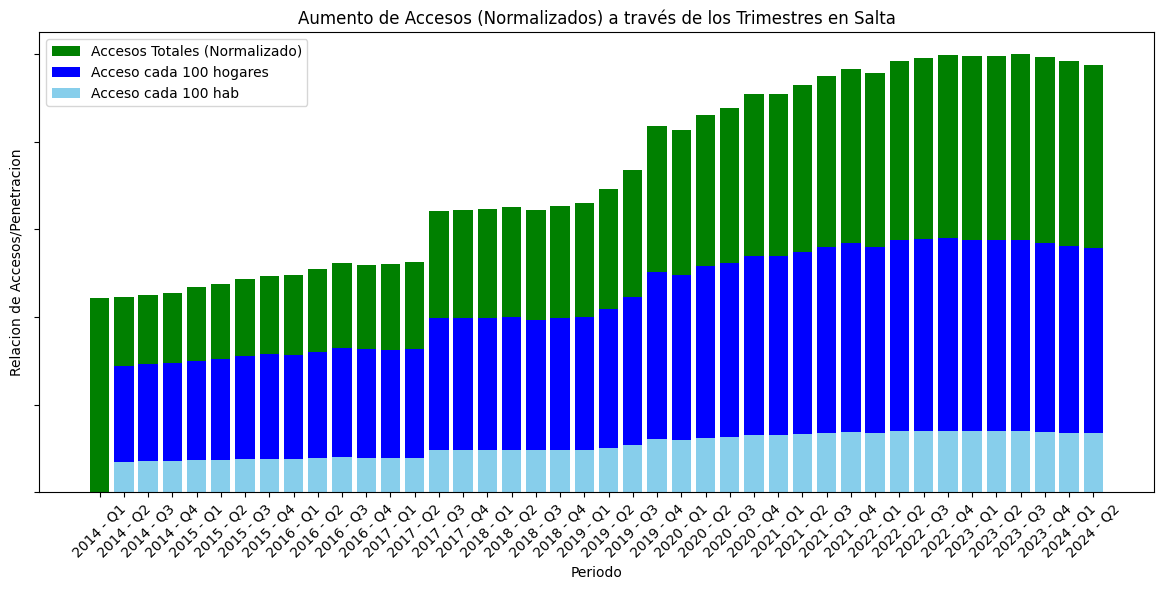

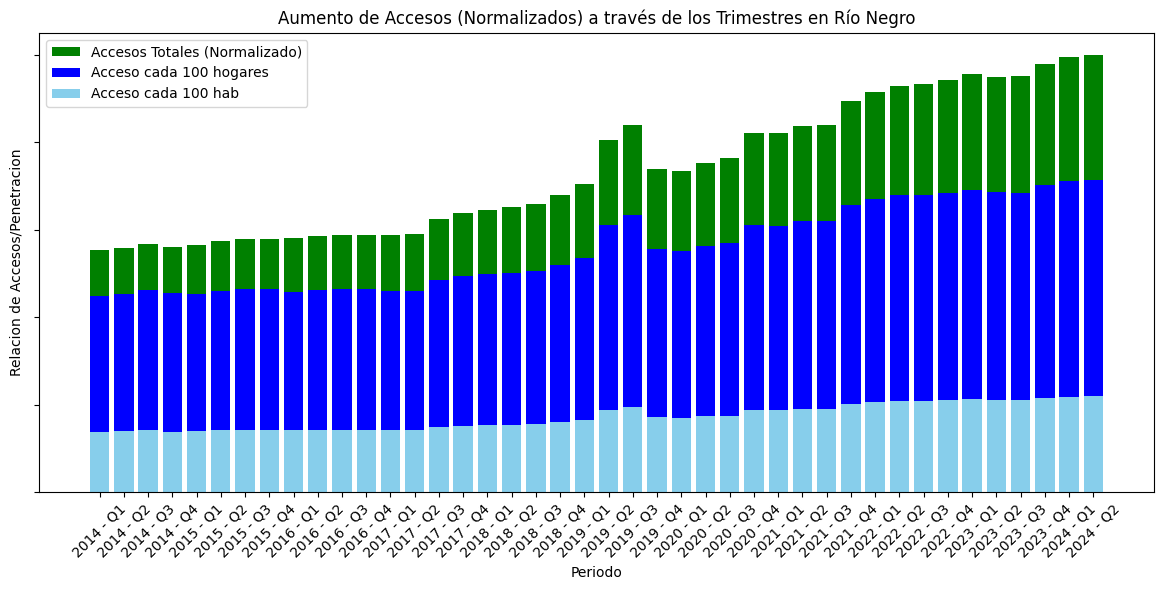

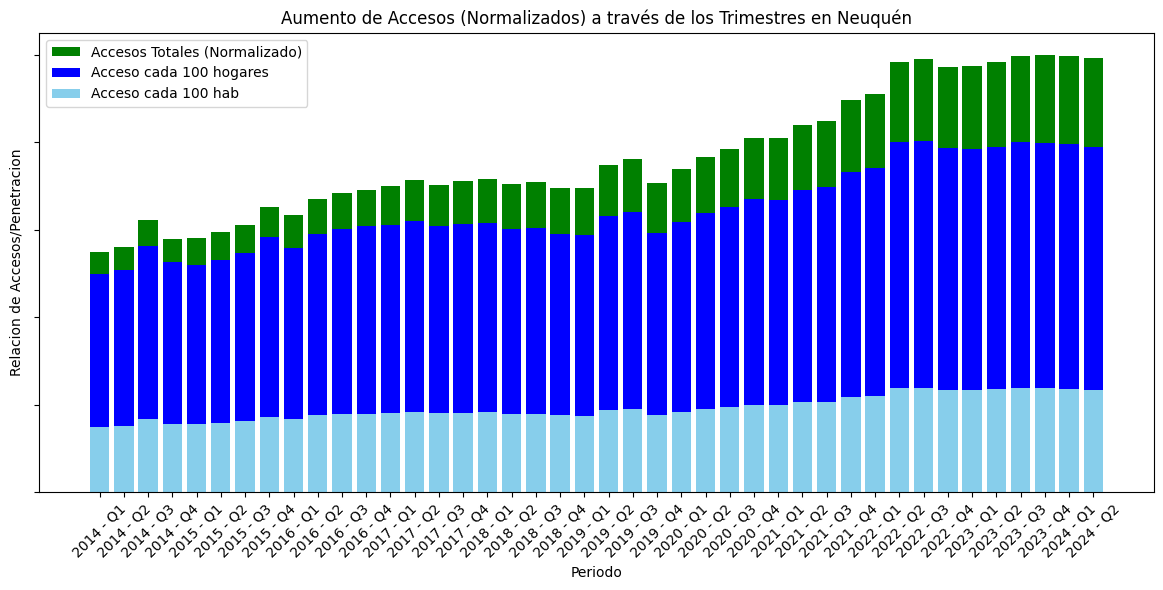

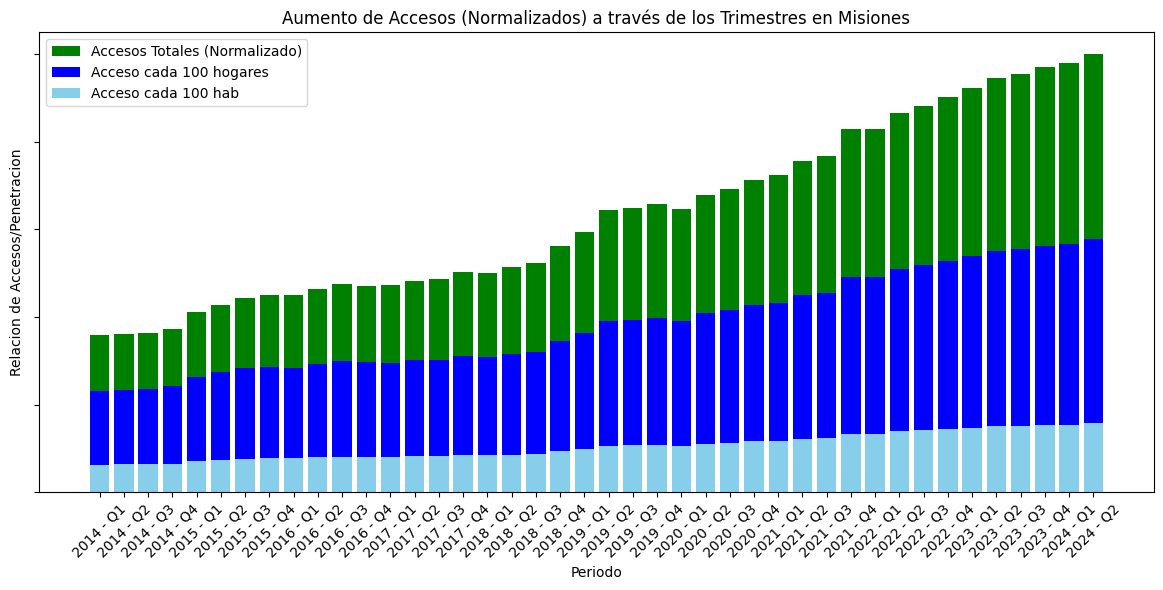

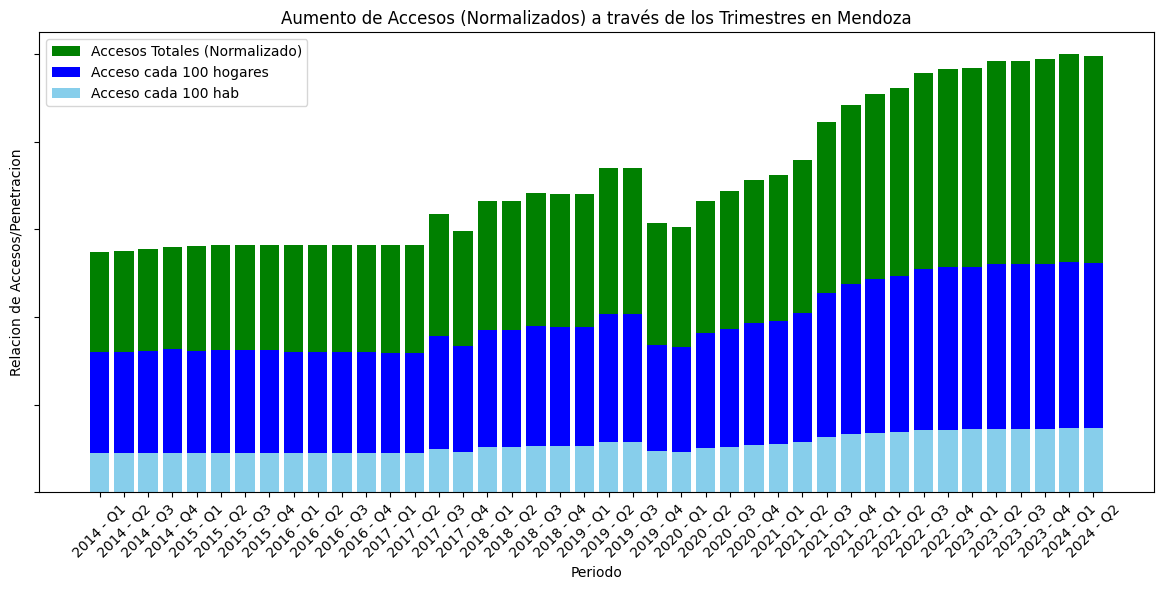

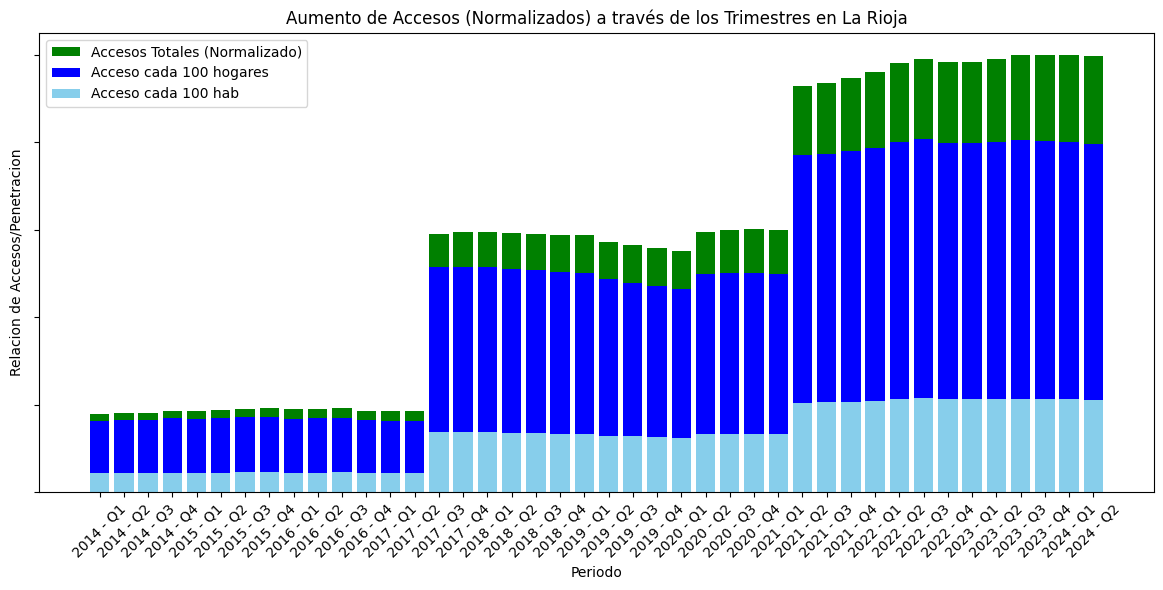

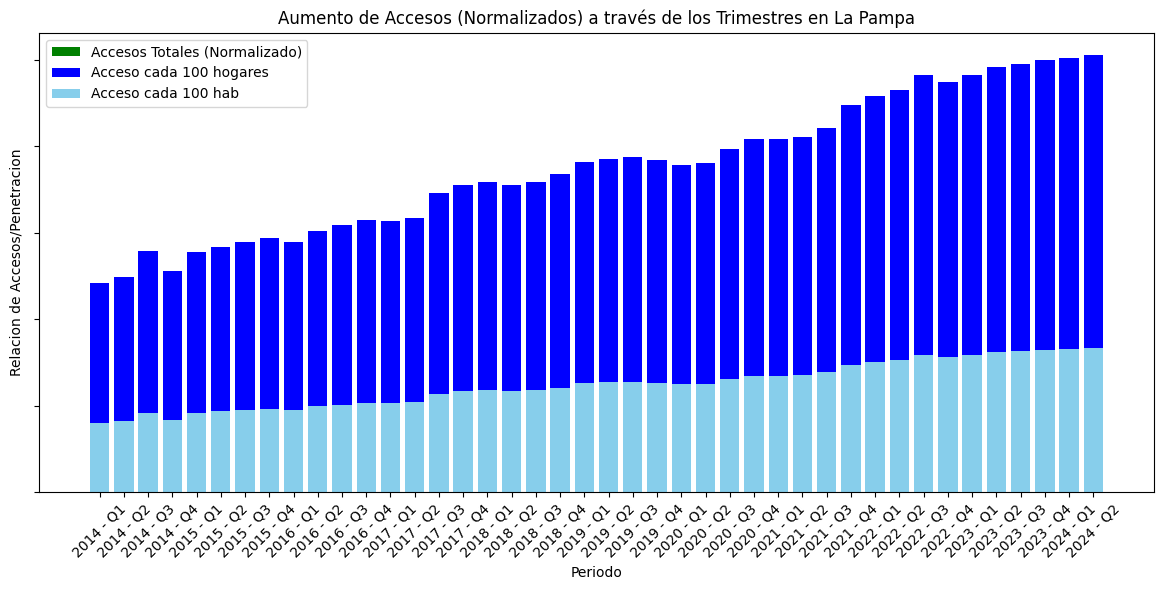

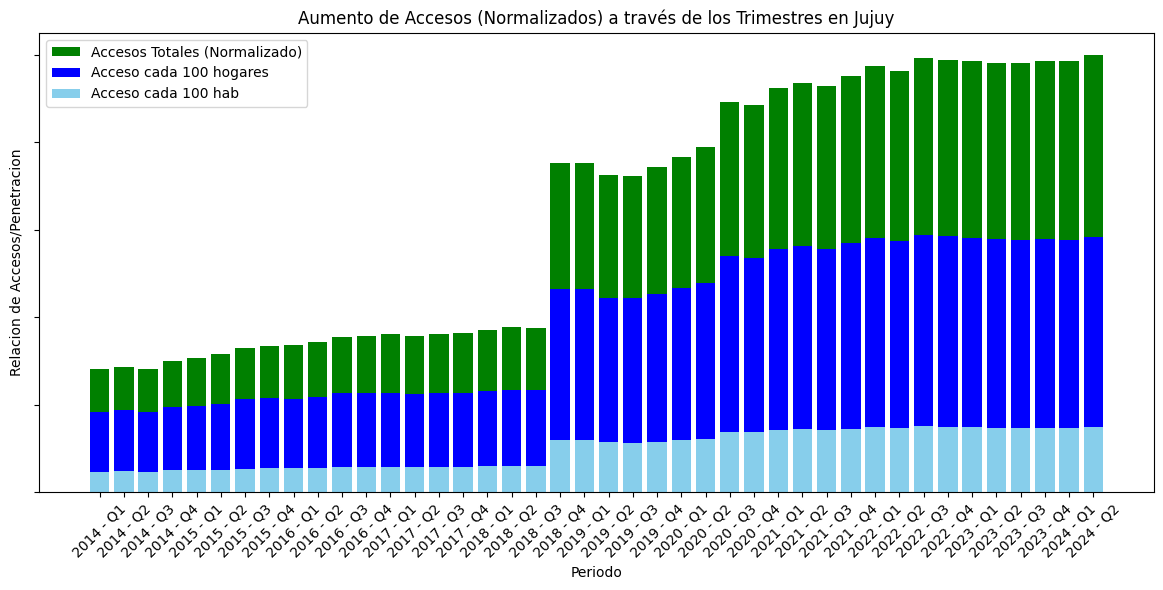

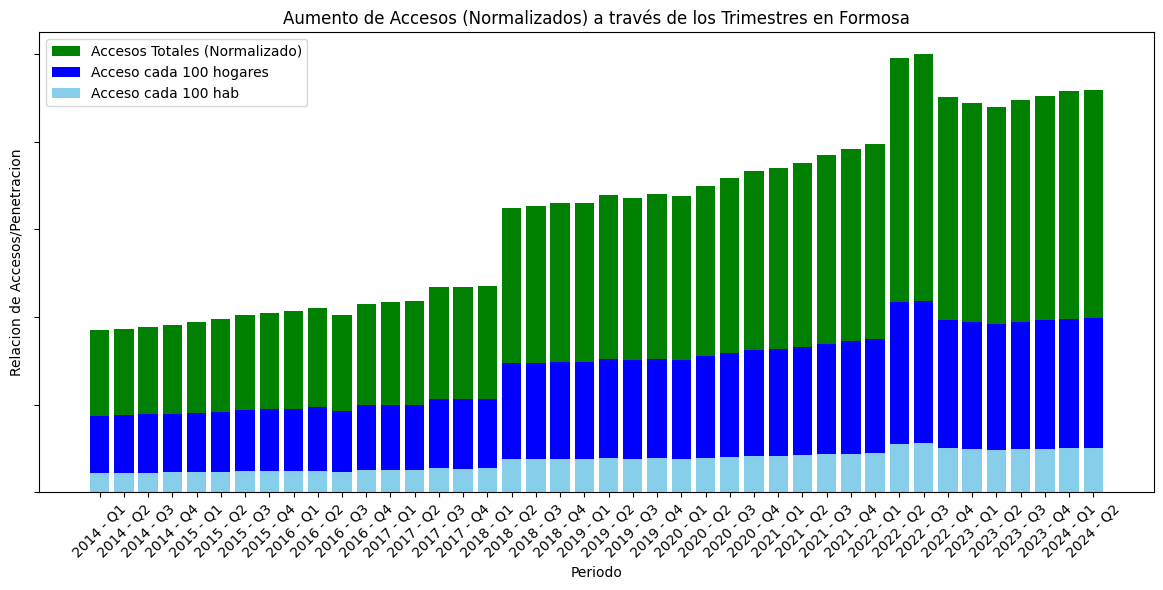

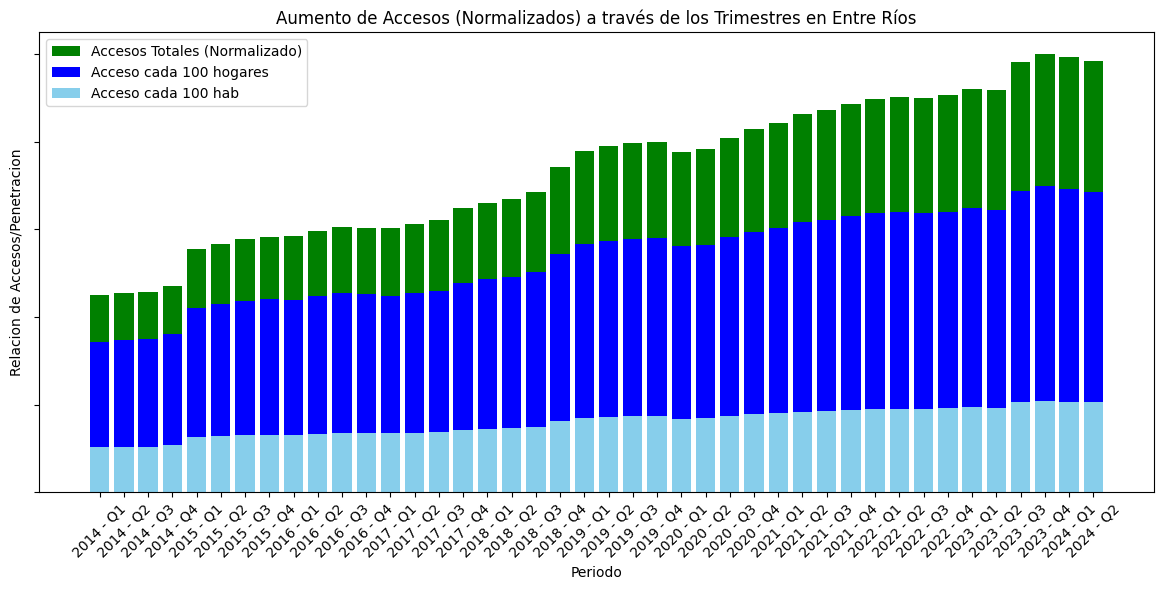

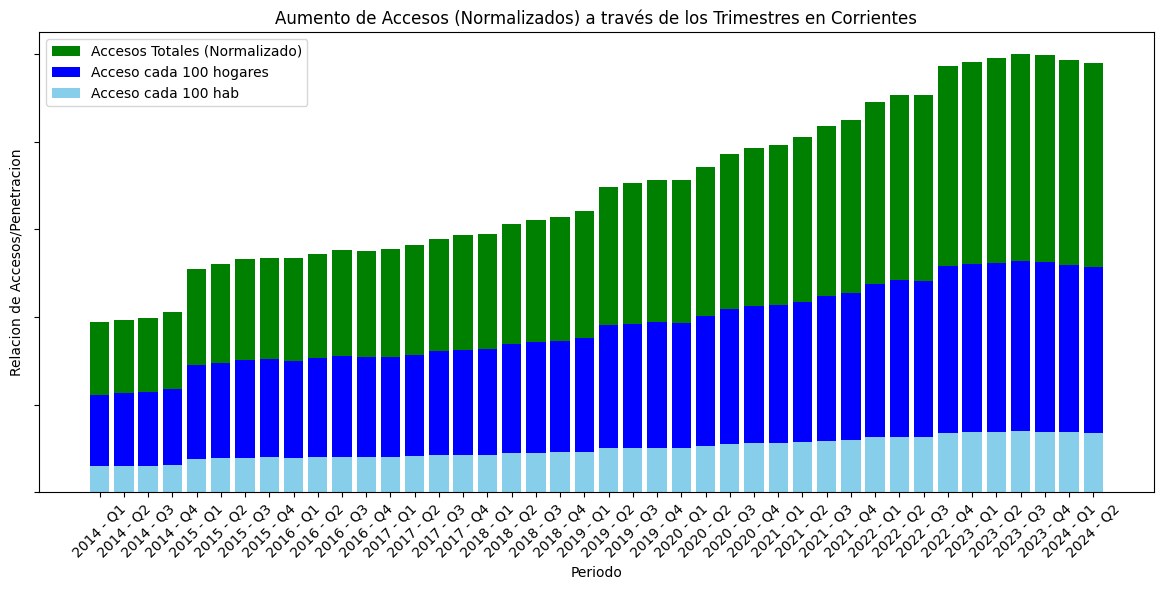

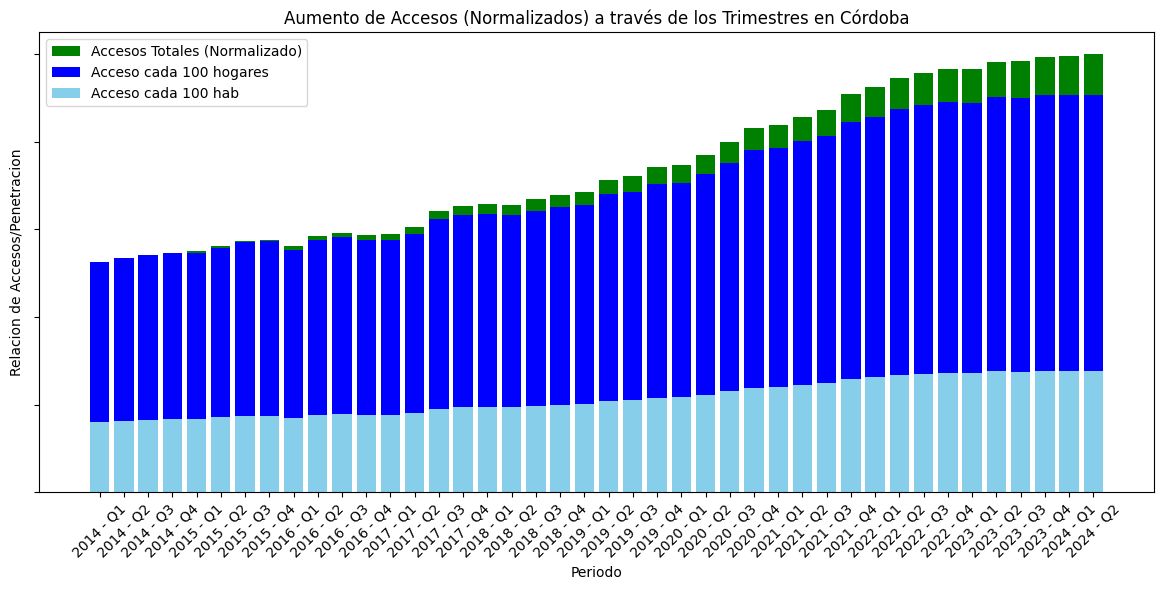

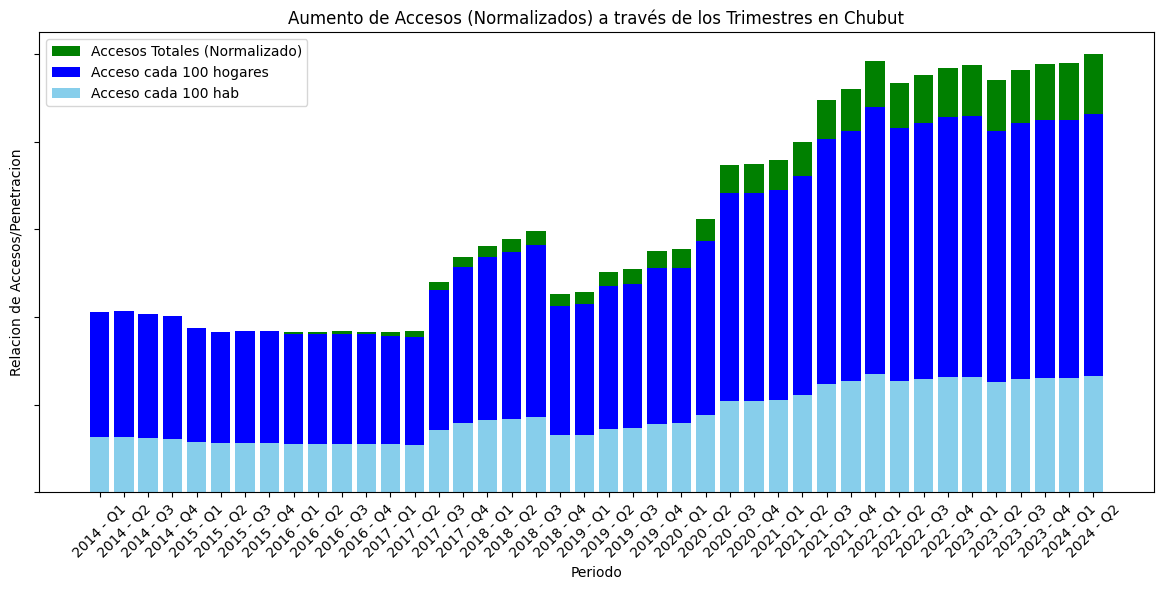

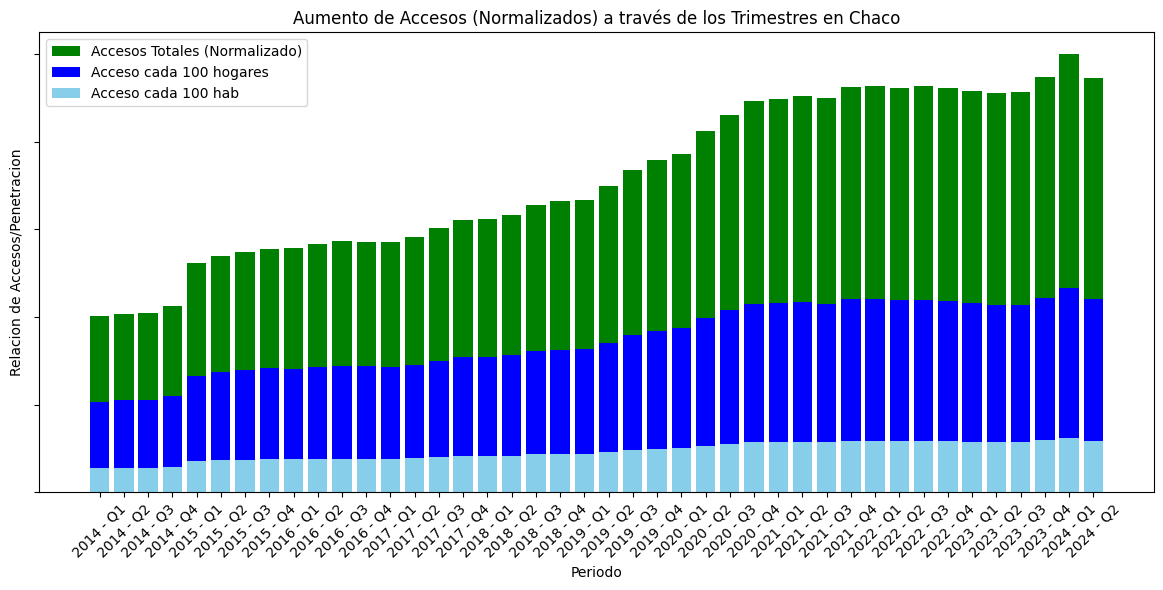

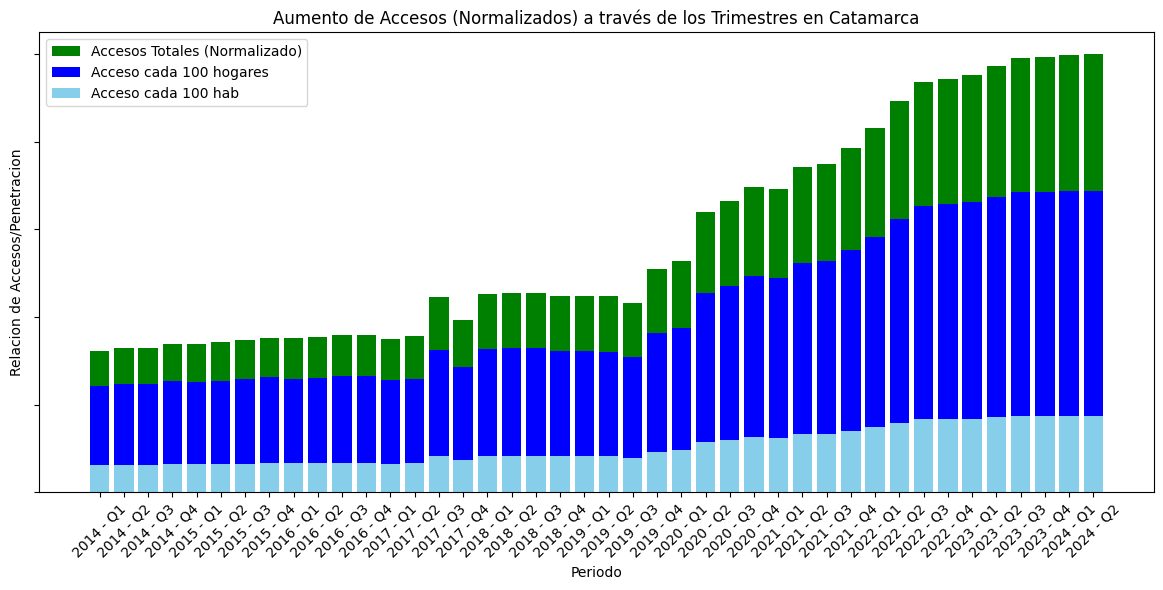

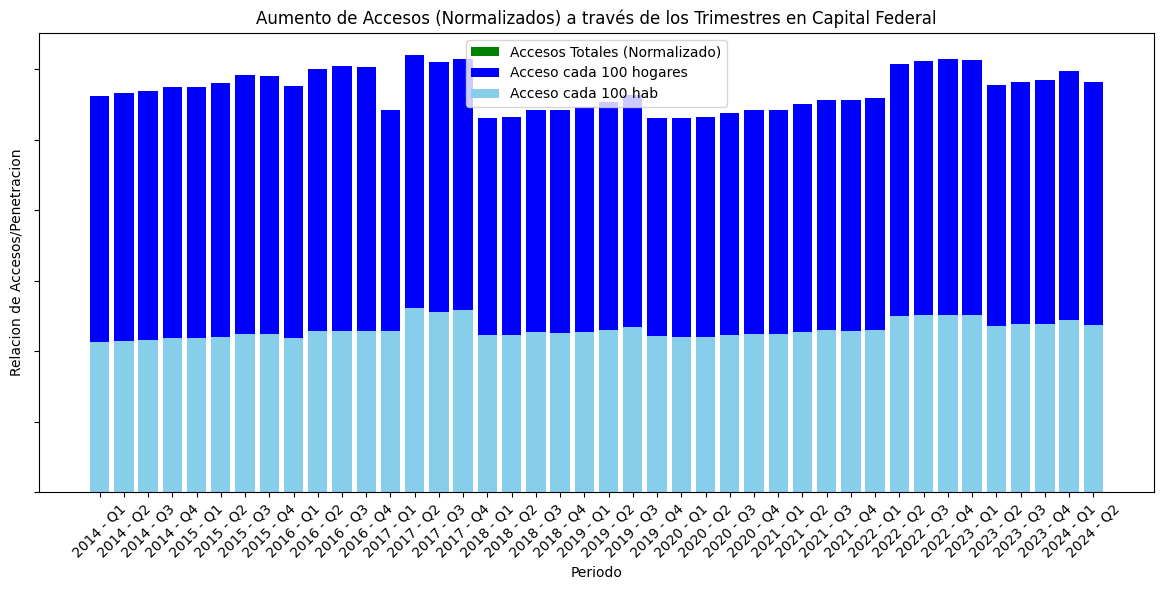

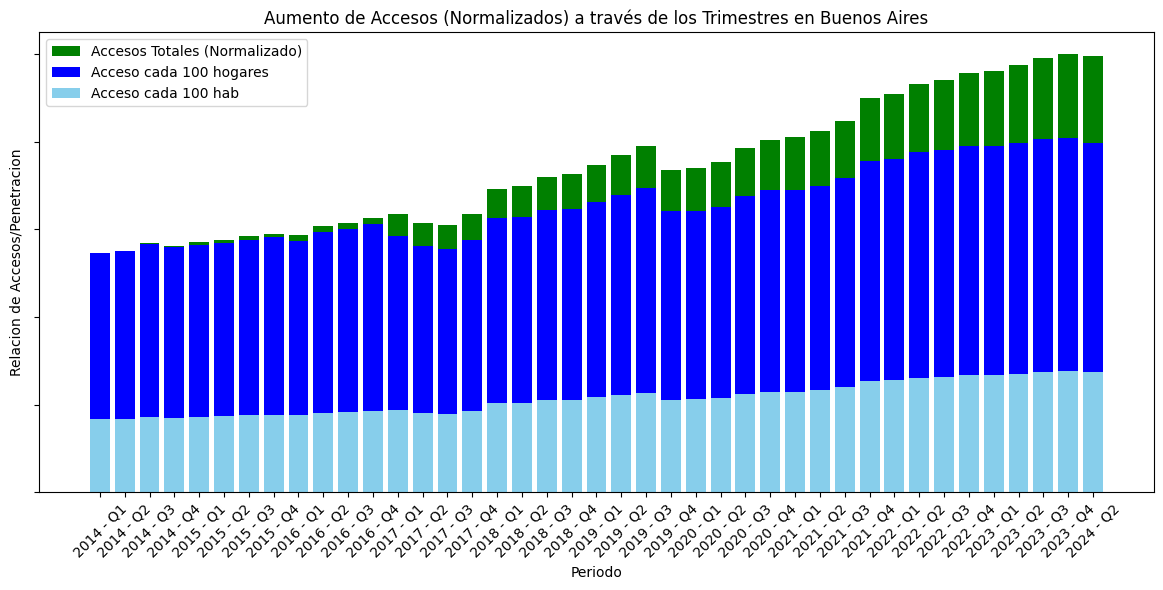

In [770]:
provincias = df['Provincia'].unique()

for provincia in provincias:
    # Filtrar el DataFrame por la provincia actual
    df_provincia = df[df['Provincia'] == provincia].copy()

    # Normalizar el total de accesos
    df_provincia['tot_accesos'] = df_provincia[accesos].sum(axis=1)
    df_provincia['tot_accesos'] = df_provincia['tot_accesos'] / df_provincia['tot_accesos'].max() * 100

    # Crear el gráfico
    plt.figure(figsize=(12, 6))

    # Graficar accesos totales normalizados
    plt.bar(df_provincia['Periodo'], df_provincia['tot_accesos'], color='green', label='Accesos Totales (Normalizado)')

    # Graficar accesos por 100 hogares y 100 habitantes
    plt.bar(df_provincia['Periodo'], df_provincia['Accesos por cada 100 hogares'], color='blue', label='Acceso cada 100 hogares')
    plt.bar(df_provincia['Periodo'], df_provincia['Accesos por cada 100 hab'], color='skyblue', label='Acceso cada 100 hab')

    # Añadir etiquetas y título
    plt.xlabel('Periodo')
    plt.ylabel('Relacion de Accesos/Penetracion')
    plt.title(f'Aumento de Accesos (Normalizados) a través de los Trimestres en {provincia}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.gca().set_yticklabels([])
    plt.legend()

    # Mostrar el gráfico
    plt.show()

In [771]:
Q1 = accesos_tot.quantile(0.25)
Q3 = accesos_tot.quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

provincias_outliers = df[(accesos_tot < limite_inferior) | (accesos_tot > limite_superior)]['Provincia'].unique()

print("Provincias Outliers en cantidad de accesos:", ', '.join(provincias_outliers))

Provincias Outliers en cantidad de accesos: Santa Fe, Córdoba, Capital Federal, Buenos Aires


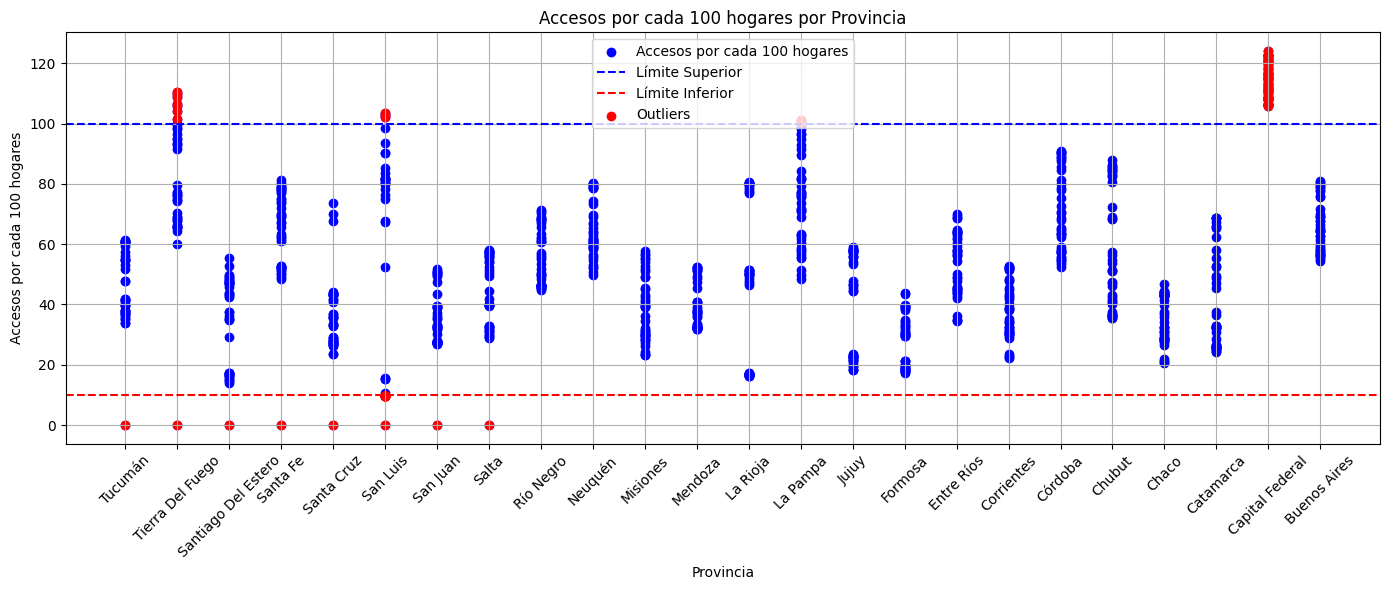

In [773]:
limite_inferior = 10
limite_superior = 100

provincias_outliers = df[(df['Accesos por cada 100 hogares'] < limite_inferior) | (df['Accesos por cada 100 hogares'] > limite_superior)]

plt.figure(figsize=(14, 6))

plt.scatter(df['Provincia'], df['Accesos por cada 100 hogares'], color='blue', label='Accesos por cada 100 hogares')

plt.axhline(limite_superior, color='blue', linestyle='--', label='Límite Superior')
plt.axhline(limite_inferior, color='red', linestyle='--', label='Límite Inferior')

if not provincias_outliers.empty:
    plt.scatter(provincias_outliers['Provincia'], provincias_outliers['Accesos por cada 100 hogares'], color='red', label='Outliers')

plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Accesos por cada 100 hogares por Provincia')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()

plt.show()

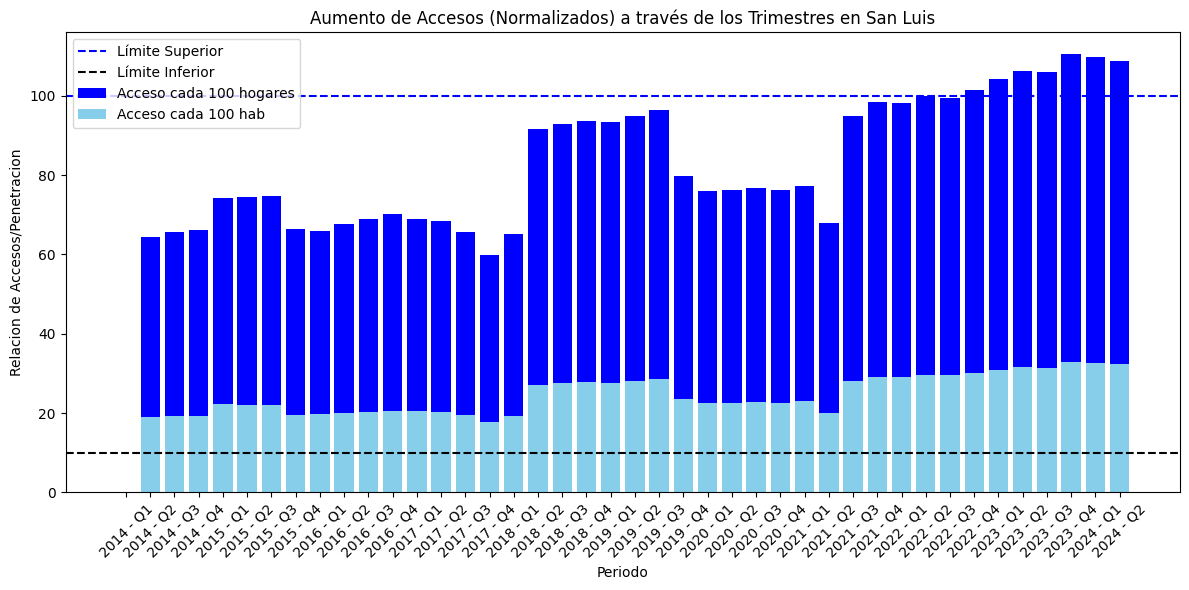

In [775]:
df_tf = df[df['Provincia'] == 'Tierra Del Fuego'].copy()

plt.figure(figsize=(12, 6))

limite_inferior = 10
limite_superior = 100
plt.axhline(limite_superior, color='blue', linestyle='--', label='Límite Superior')
plt.axhline(limite_inferior, color='black', linestyle='--', label='Límite Inferior')

plt.bar(df_tf['Periodo'], df_tf['Accesos por cada 100 hogares'], color='blue', label='Acceso cada 100 hogares')
plt.bar(df_tf['Periodo'], df_tf['Accesos por cada 100 hab'], color='skyblue', label='Acceso cada 100 hab')

plt.xlabel('Periodo')
plt.ylabel('Relacion de Accesos/Penetracion')
plt.title(f'Aumento de Accesos (Normalizados) a través de los Trimestres en San Luis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

plt.show()

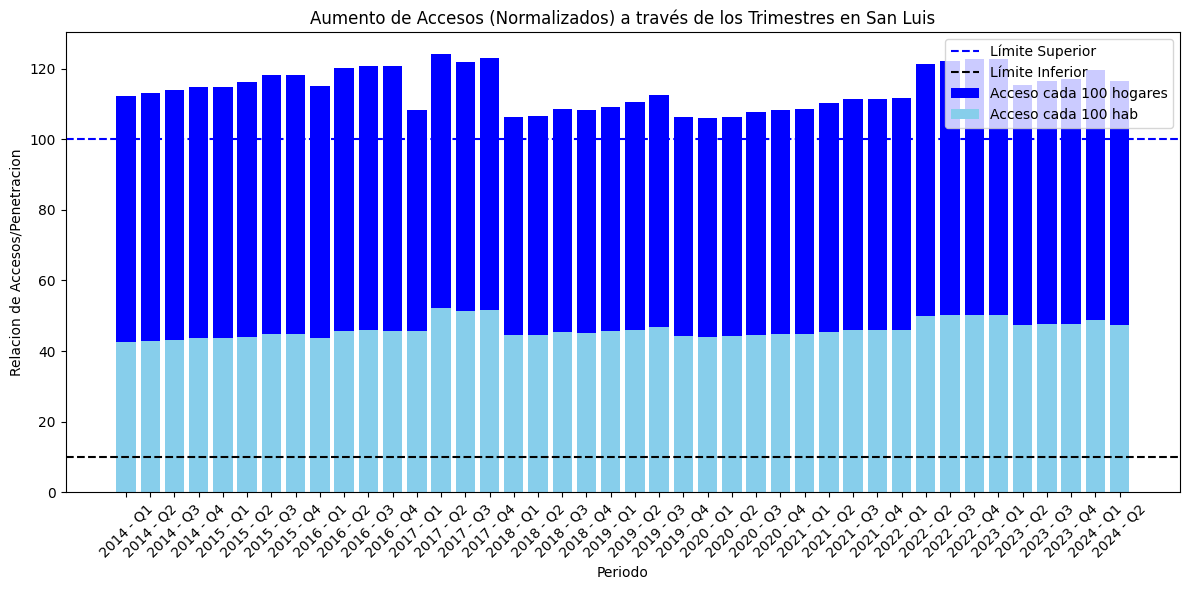

In [779]:
df_cf = df[df['Provincia'] == 'Capital Federal'].copy()

plt.figure(figsize=(12, 6))

limite_inferior = 10
limite_superior = 100
plt.axhline(limite_superior, color='blue', linestyle='--', label='Límite Superior')
plt.axhline(limite_inferior, color='black', linestyle='--', label='Límite Inferior')

plt.bar(df_cf['Periodo'], df_cf['Accesos por cada 100 hogares'], color='blue', label='Acceso cada 100 hogares')
plt.bar(df_cf['Periodo'], df_cf['Accesos por cada 100 hab'], color='skyblue', label='Acceso cada 100 hab')

plt.xlabel('Periodo')
plt.ylabel('Relacion de Accesos/Penetracion')
plt.title(f'Aumento de Accesos (Normalizados) a través de los Trimestres en San Luis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

plt.show()

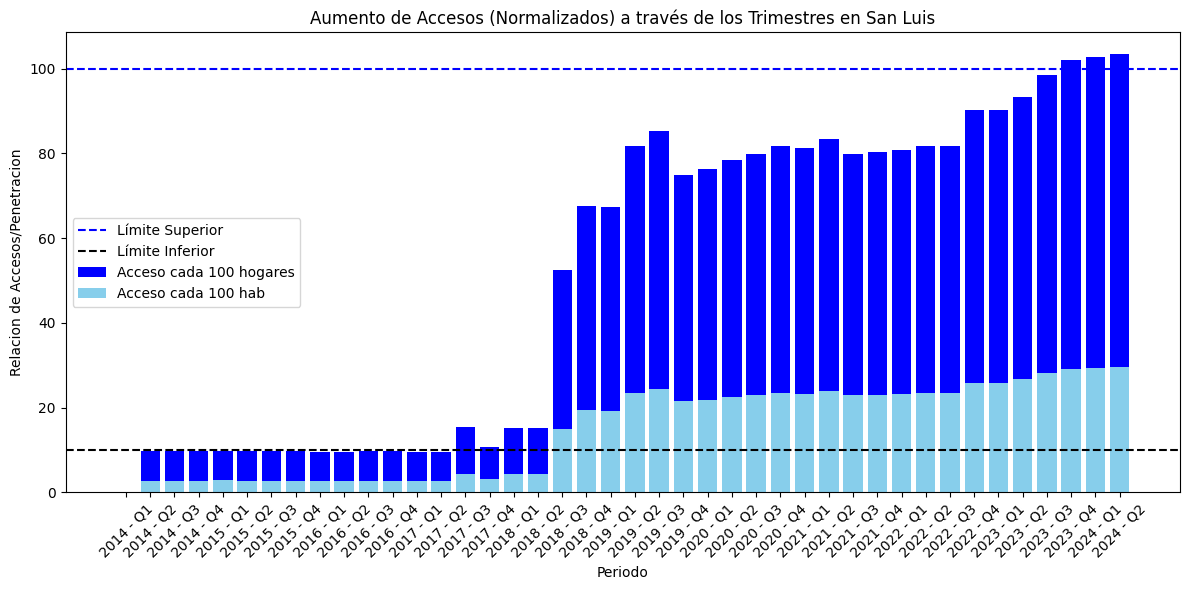

In [780]:
df_sl = df[df['Provincia'] == 'San Luis'].copy()

plt.figure(figsize=(12, 6))

limite_inferior = 10
limite_superior = 100
plt.axhline(limite_superior, color='blue', linestyle='--', label='Límite Superior')
plt.axhline(limite_inferior, color='black', linestyle='--', label='Límite Inferior')

plt.bar(df_sl['Periodo'], df_sl['Accesos por cada 100 hogares'], color='blue', label='Acceso cada 100 hogares')
plt.bar(df_sl['Periodo'], df_sl['Accesos por cada 100 hab'], color='skyblue', label='Acceso cada 100 hab')

plt.xlabel('Periodo')
plt.ylabel('Relacion de Accesos/Penetracion')
plt.title(f'Aumento de Accesos (Normalizados) a través de los Trimestres en San Luis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

plt.show()

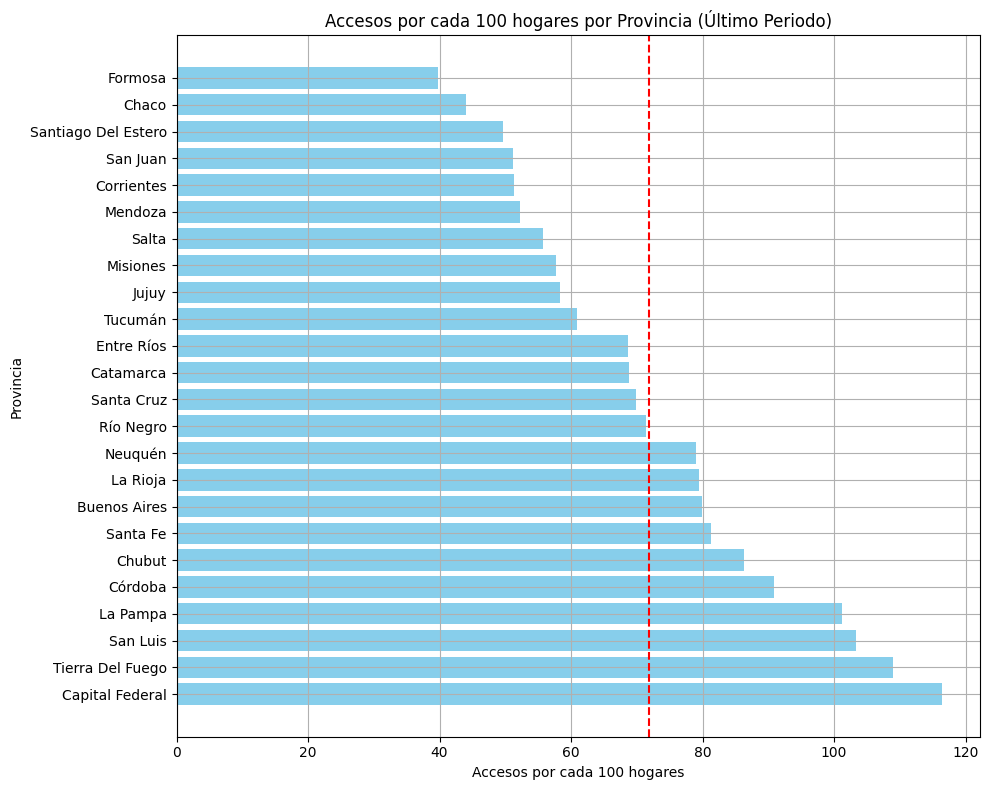

In [781]:
ultimo_periodo = df[df['Periodo'] == df['Periodo'].max()]  # Suponiendo que 'Periodo' está en un formato adecuado para ordenar (puede ser un valor numérico o string)

ultimo_periodo = ultimo_periodo.sort_values(by='Accesos por cada 100 hogares', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(ultimo_periodo['Provincia'], ultimo_periodo['Accesos por cada 100 hogares'], color='skyblue')

promedio_nacional = ultimo_periodo['Accesos por cada 100 hogares'].mean()
plt.axvline(promedio_nacional, color='red', linestyle='--')

plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Provincia')
plt.title('Accesos por cada 100 hogares por Provincia (Último Periodo)')
plt.grid(True)
plt.tight_layout()

plt.show()

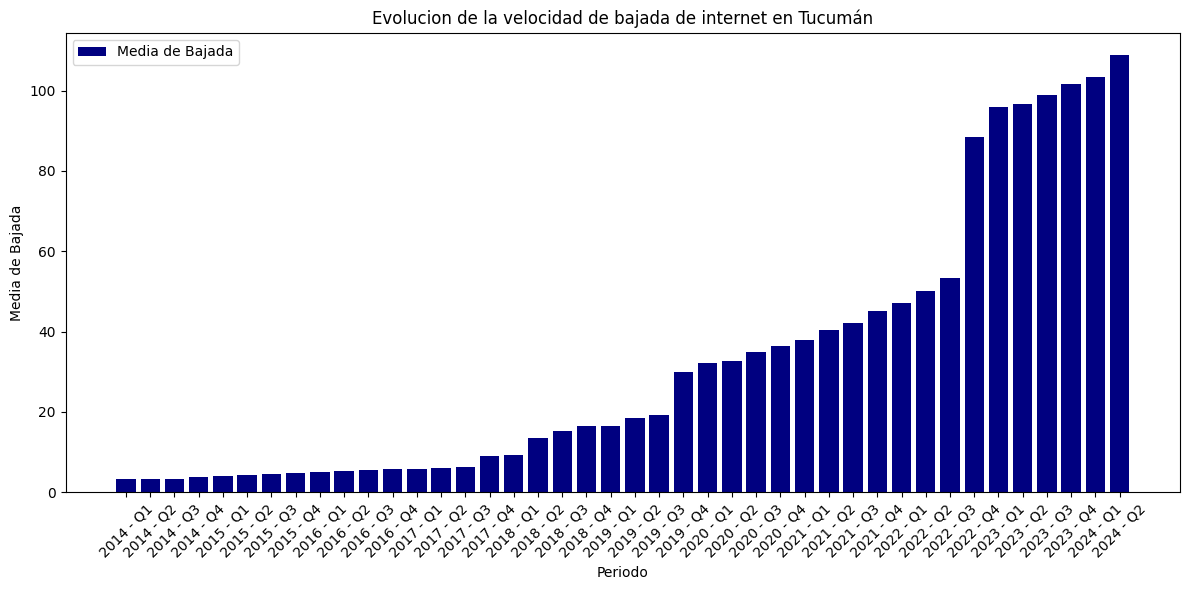

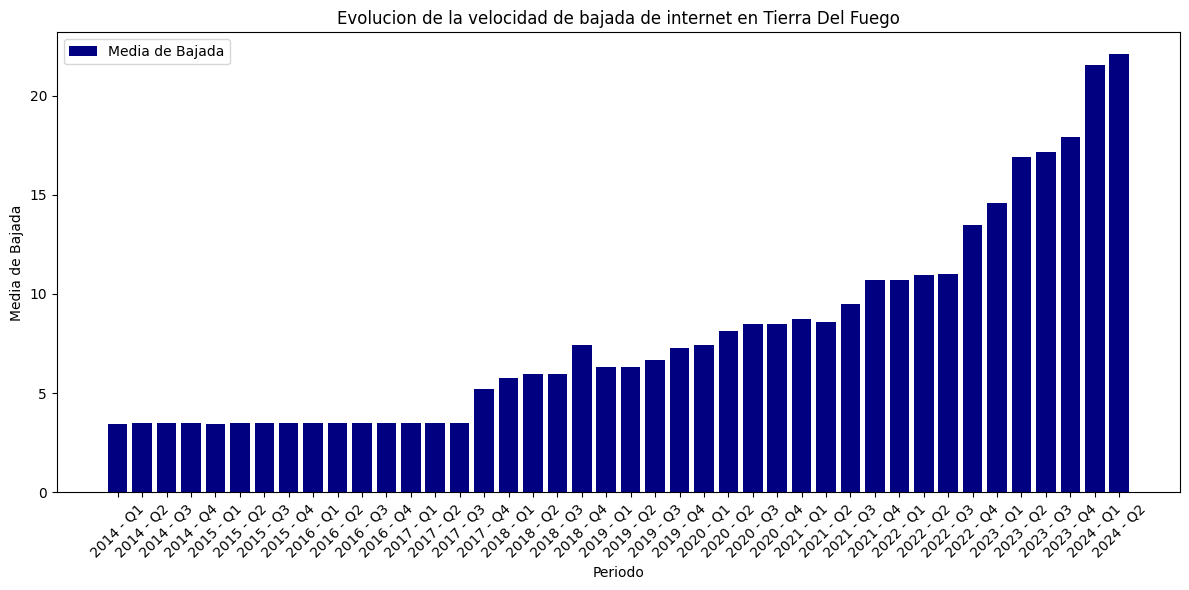

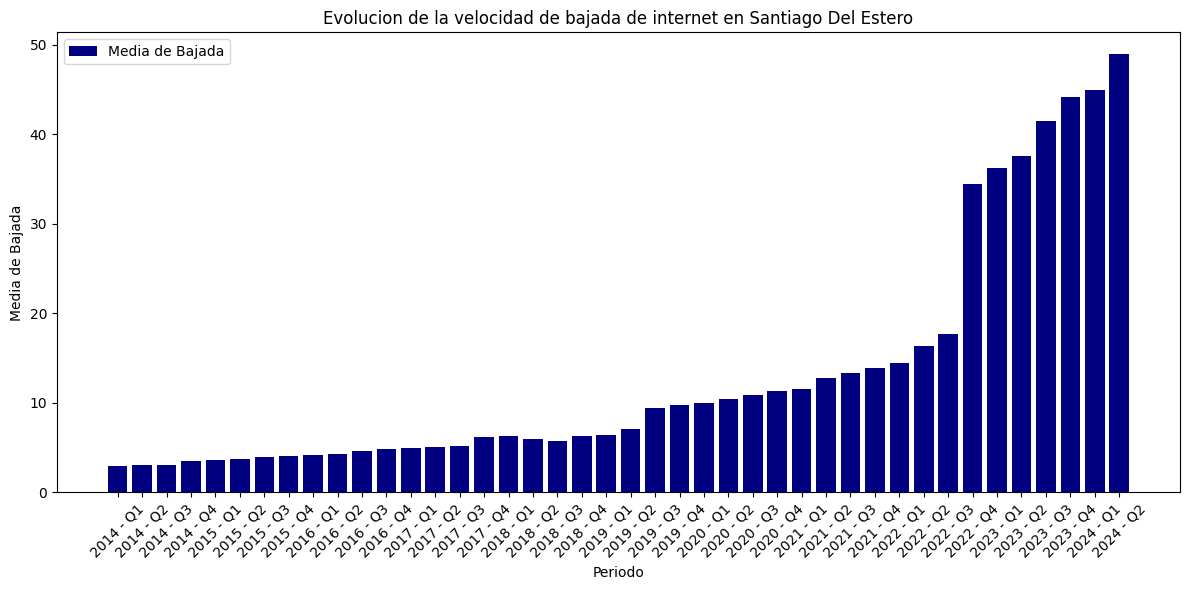

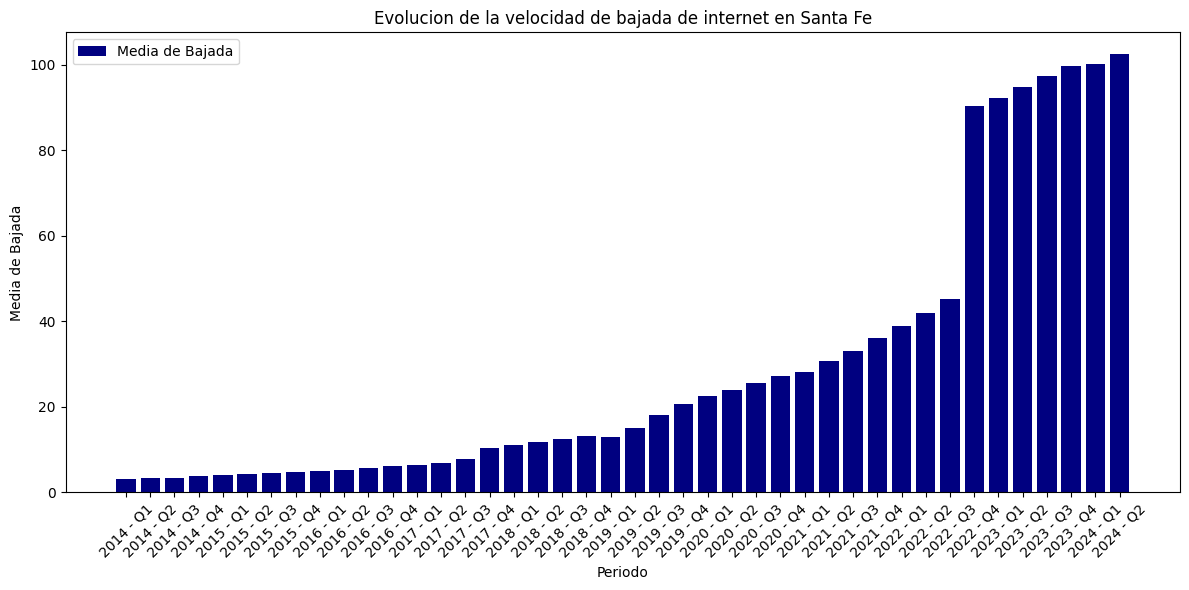

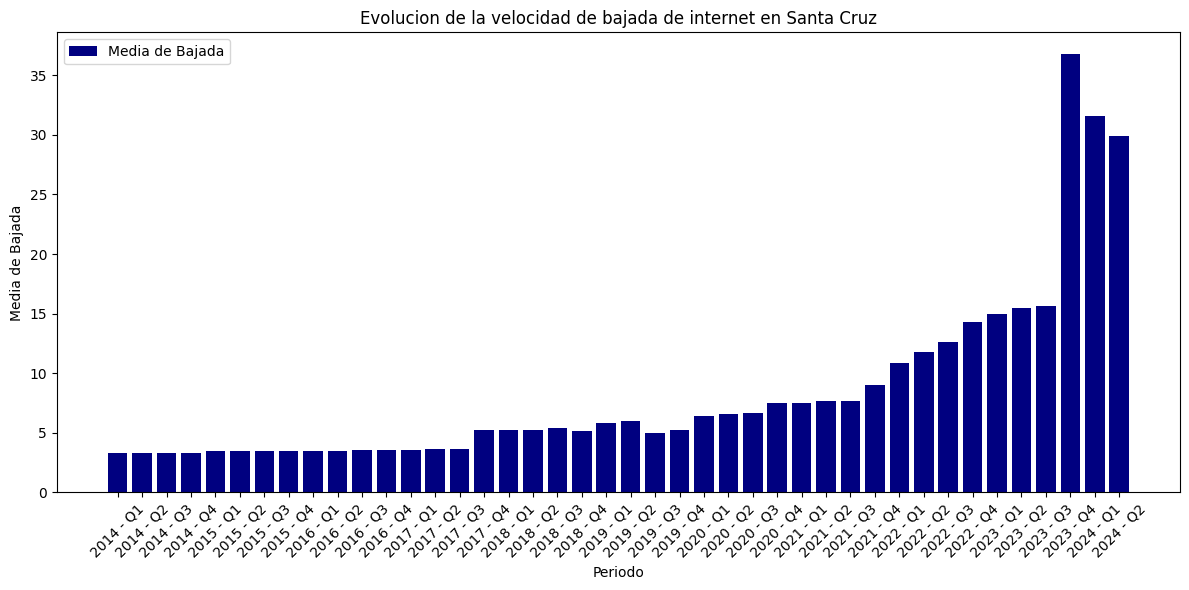

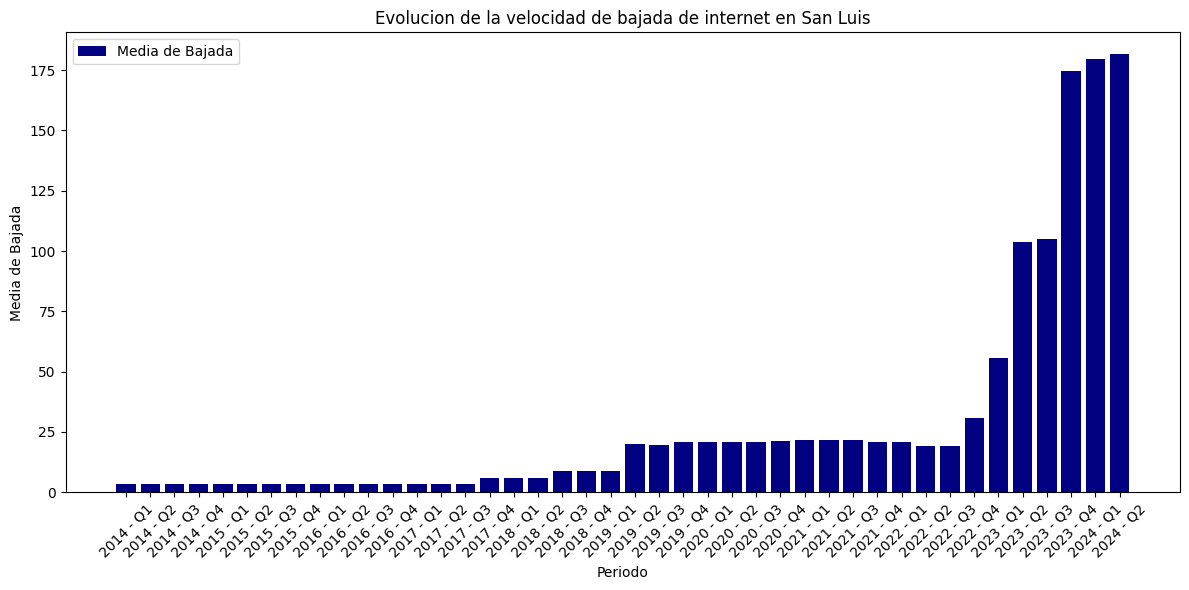

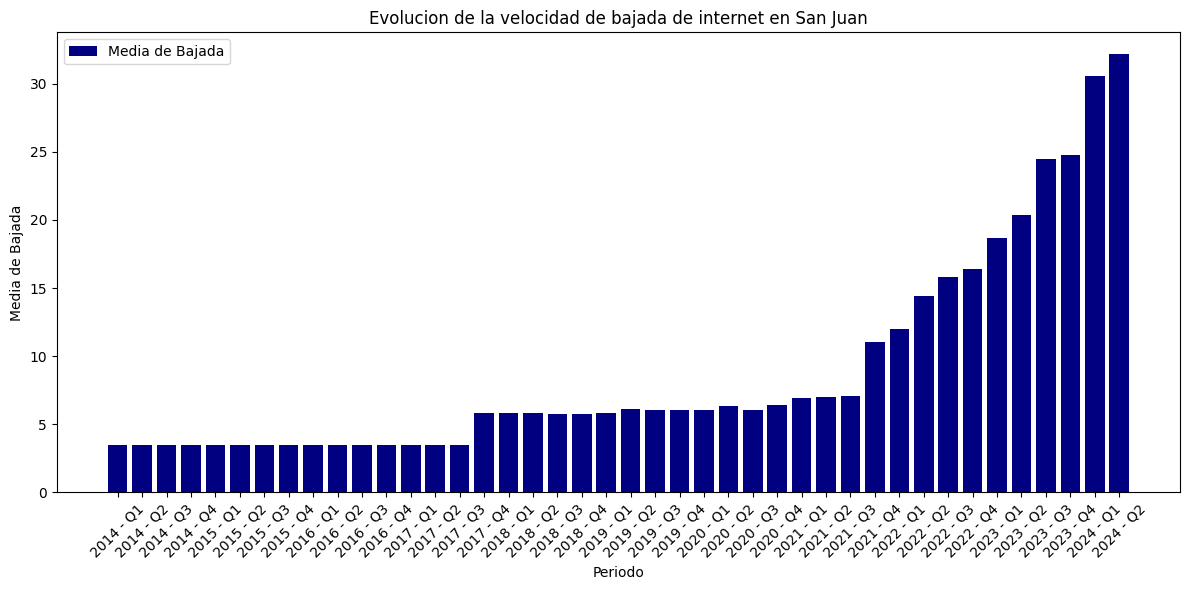

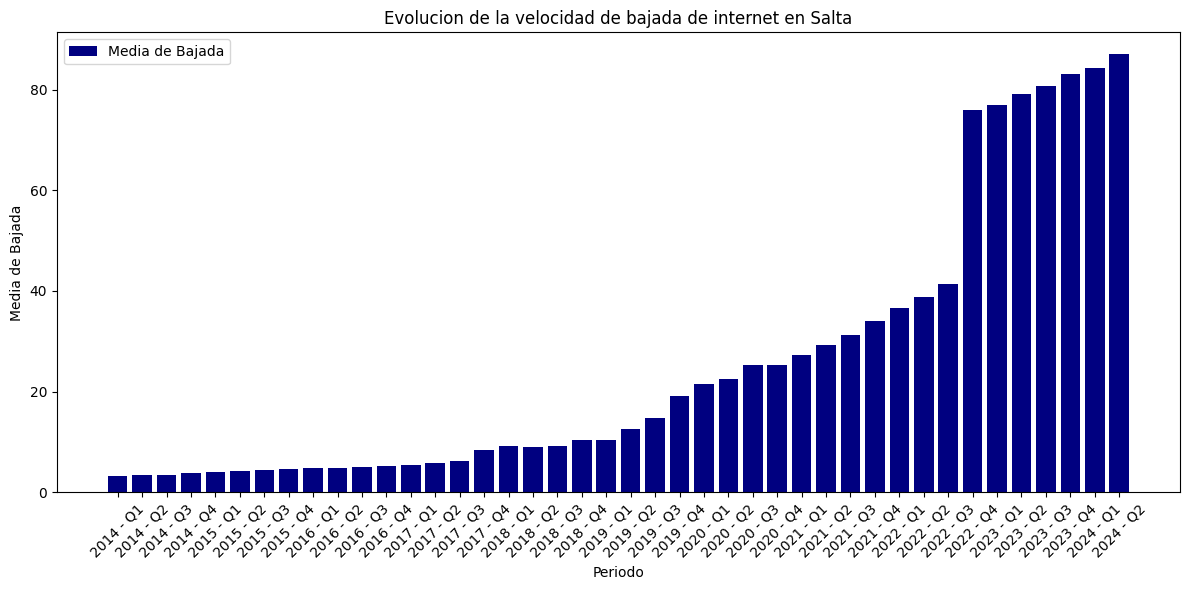

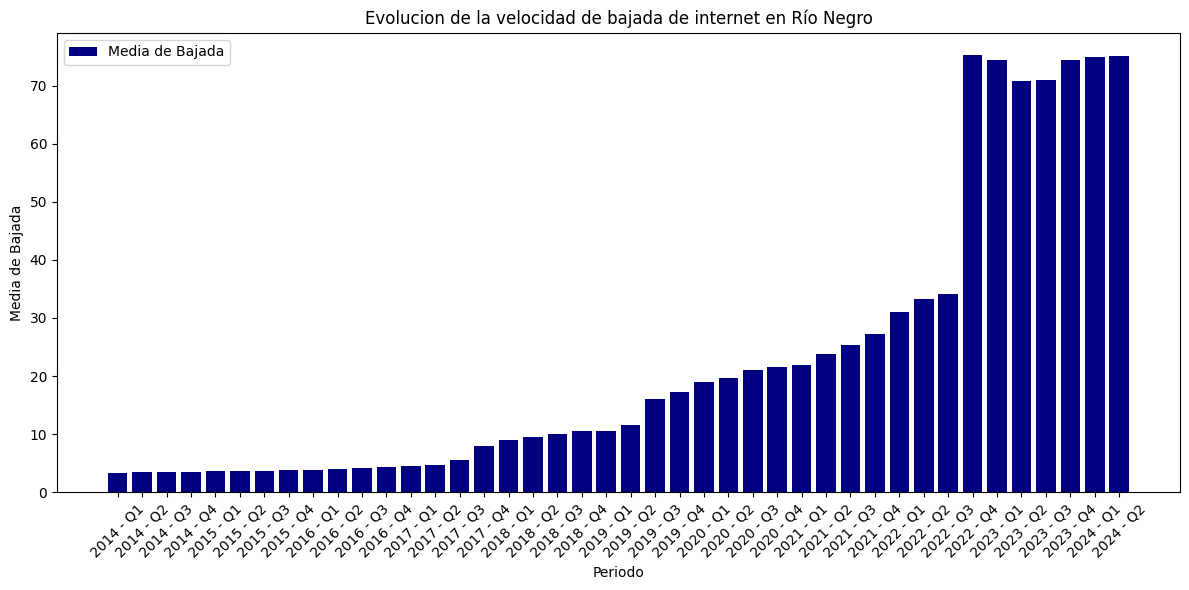

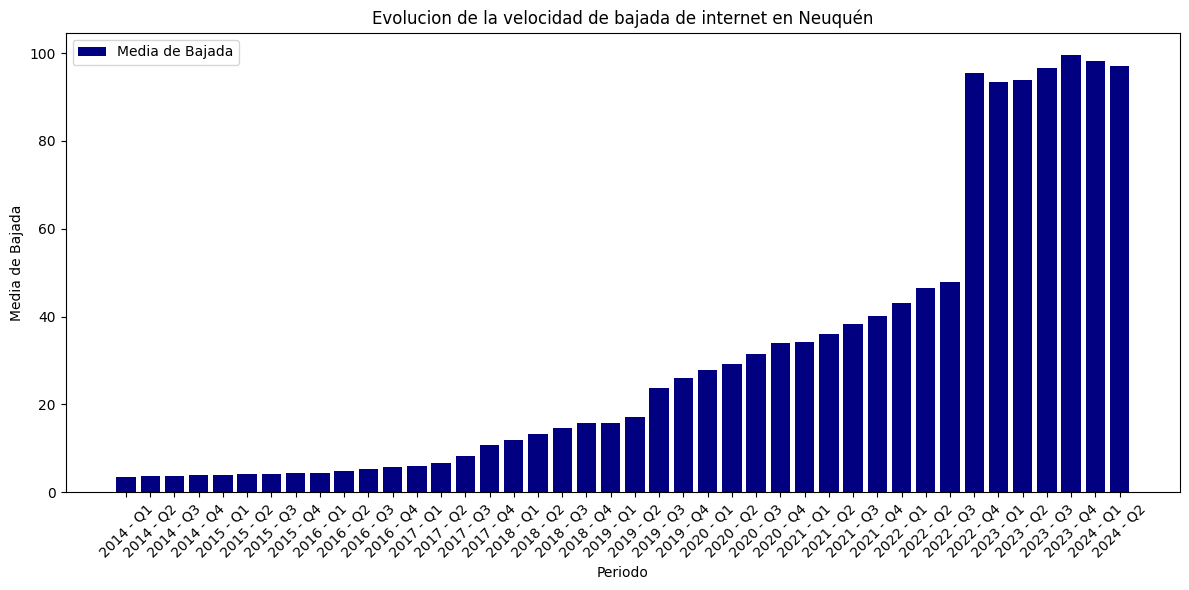

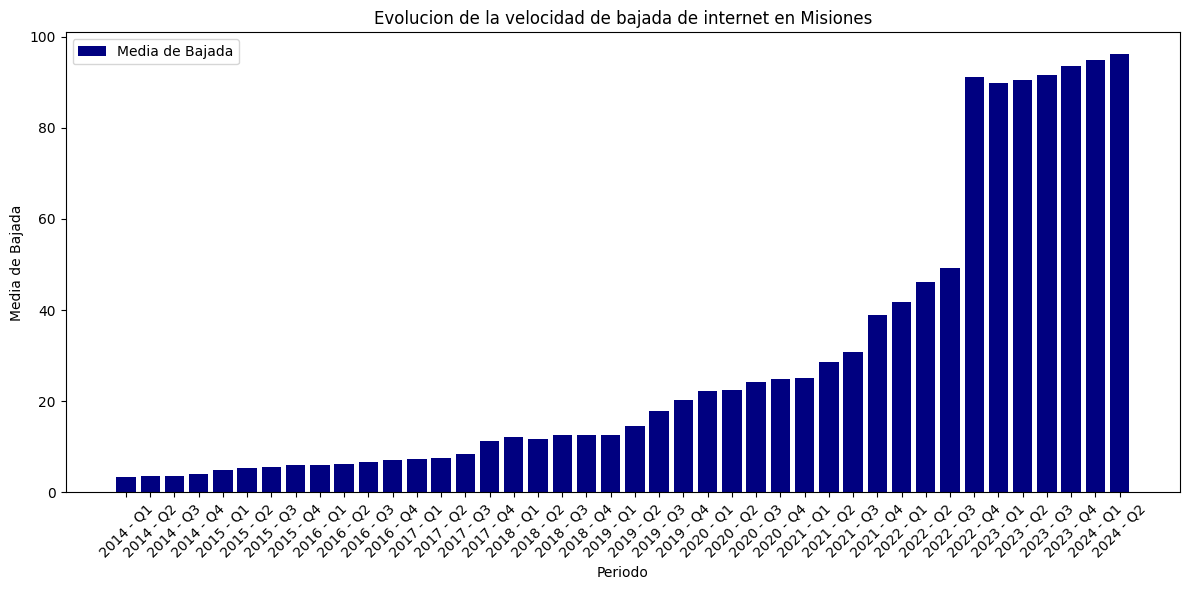

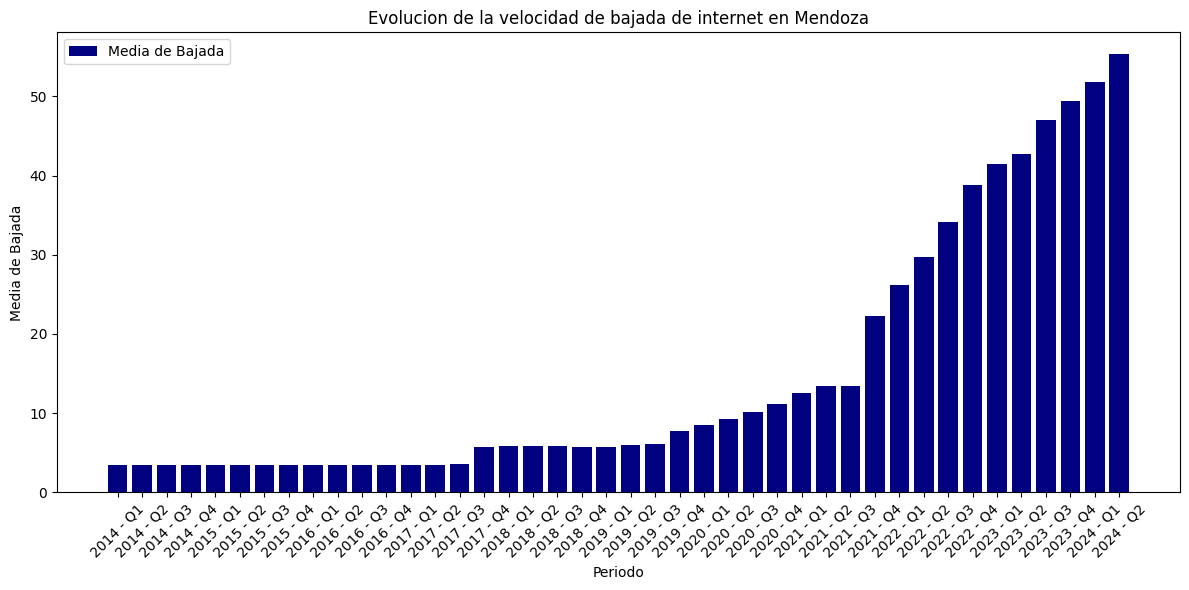

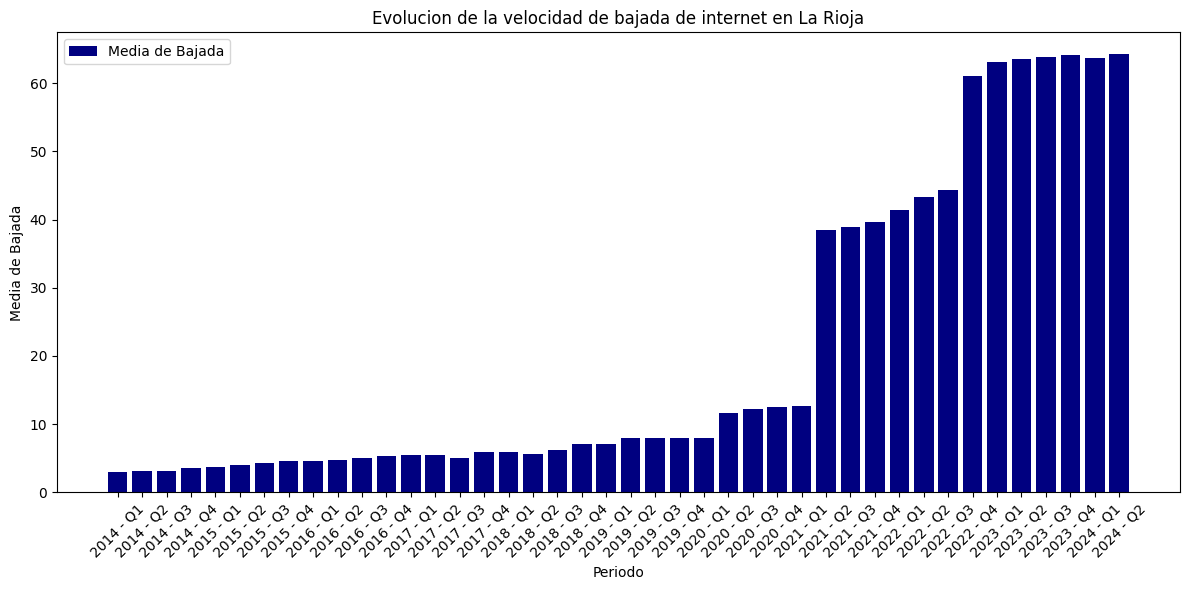

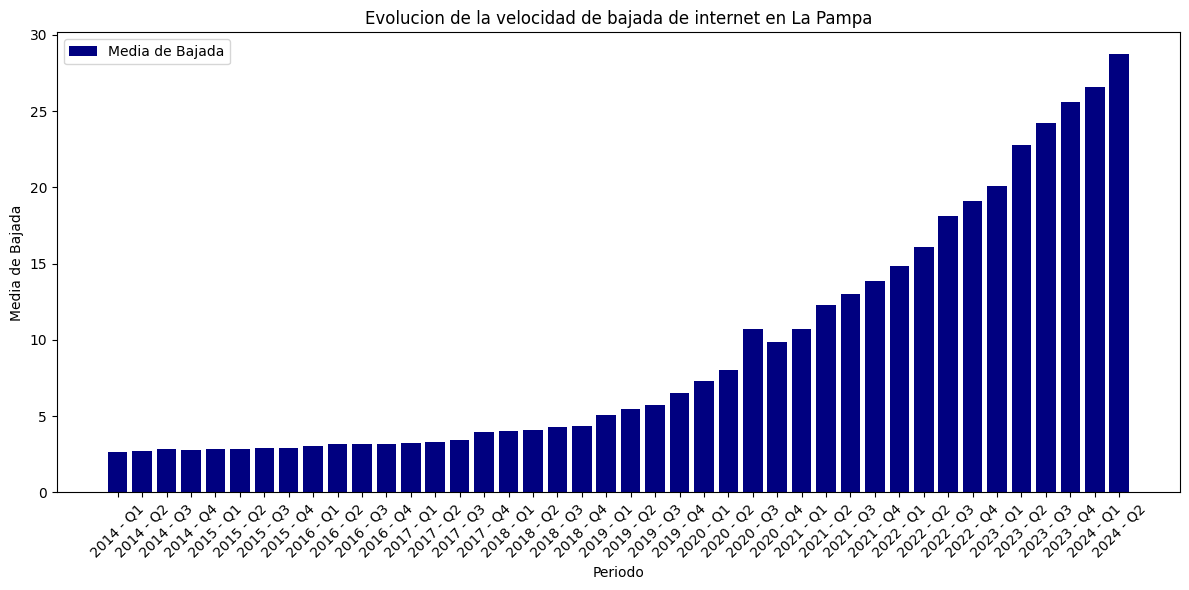

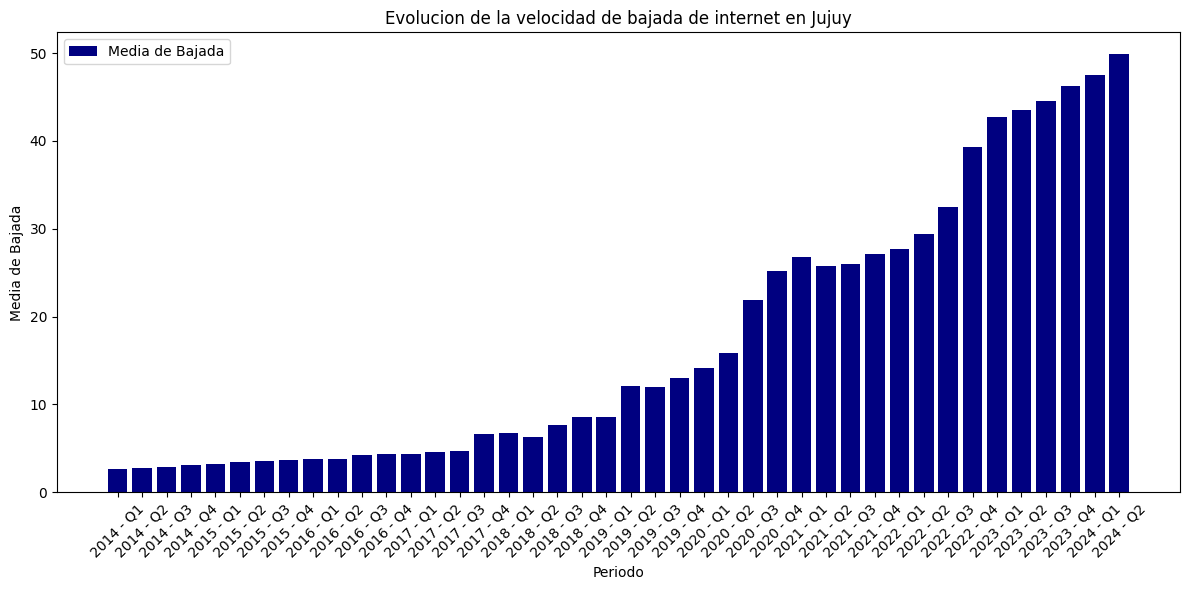

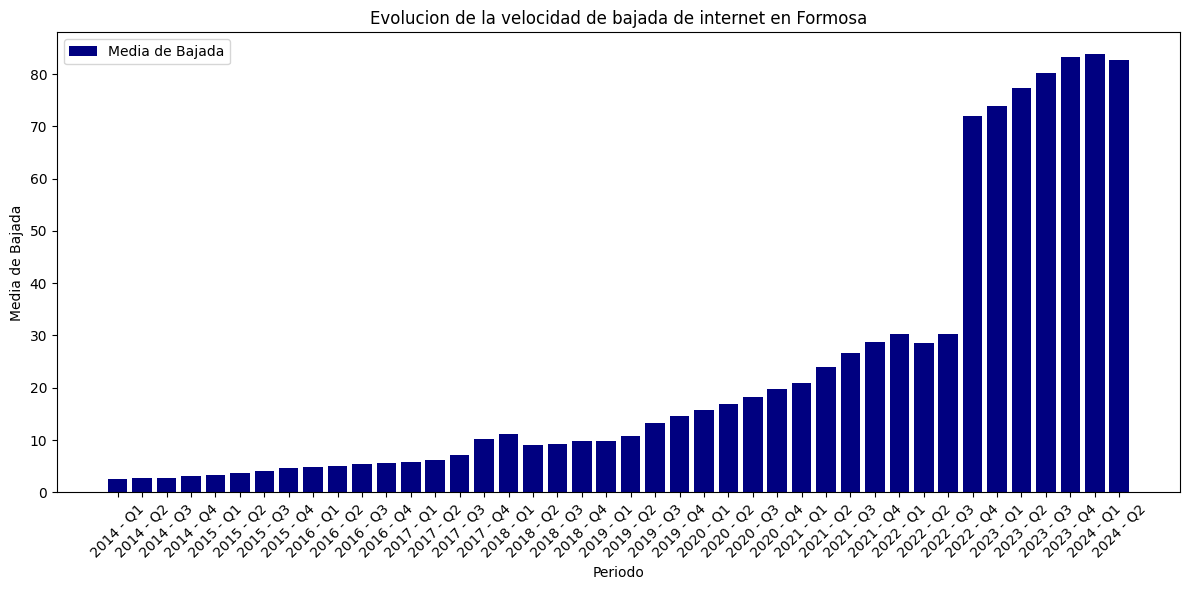

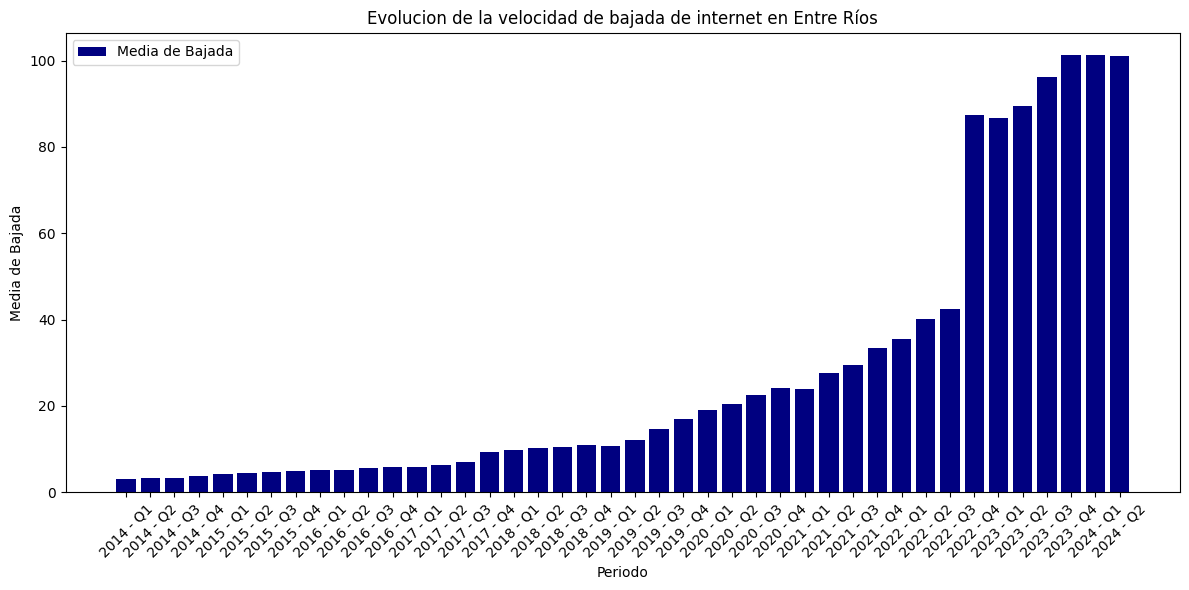

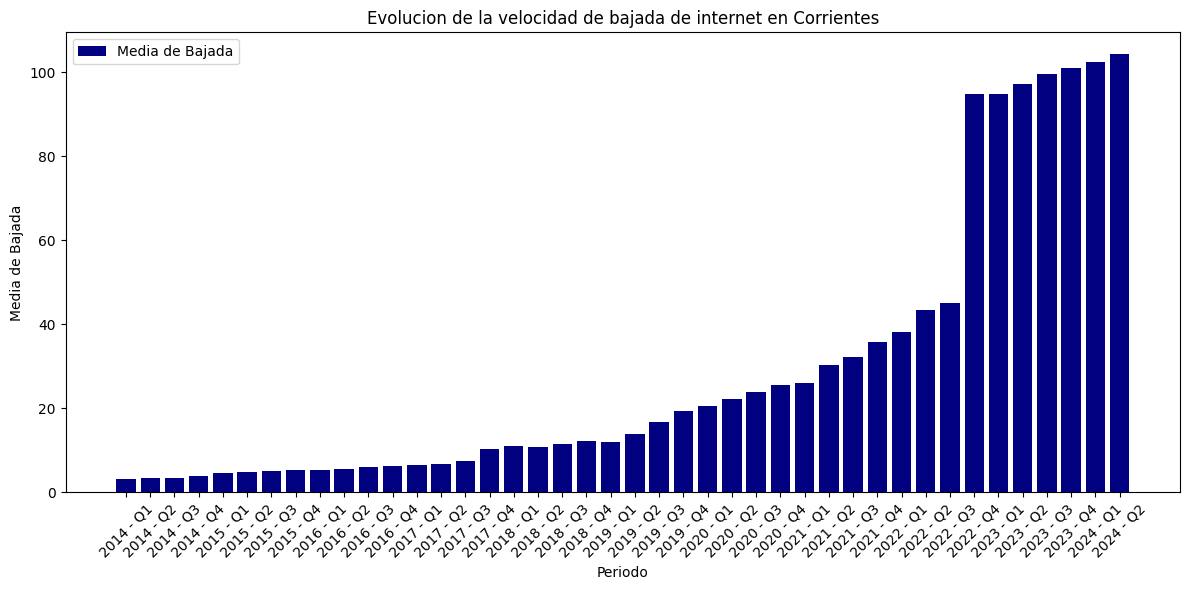

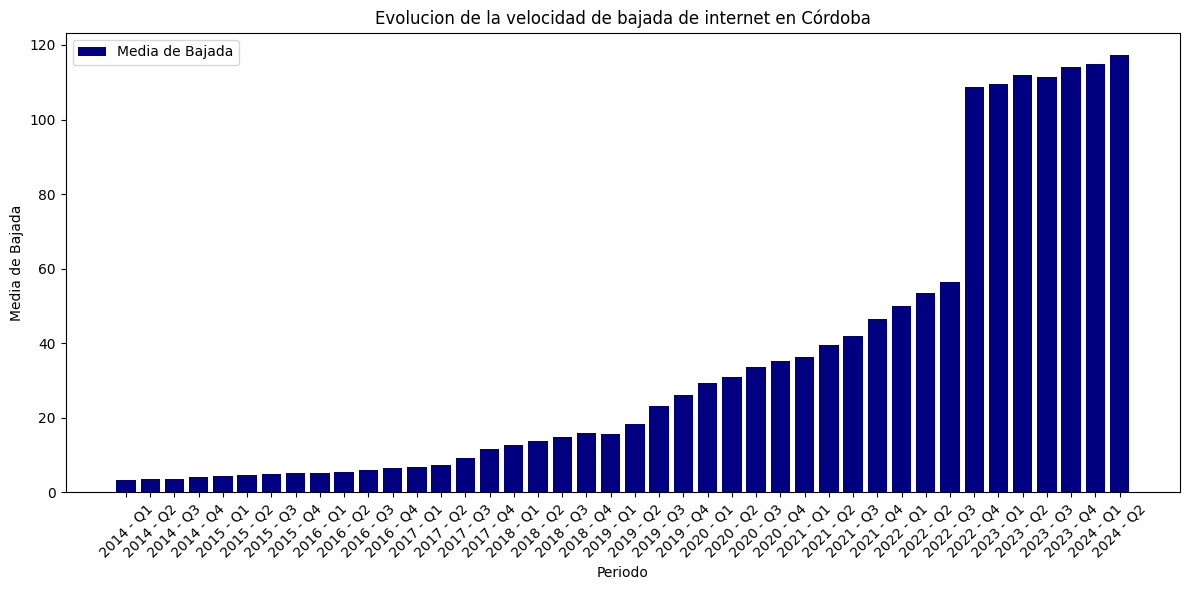

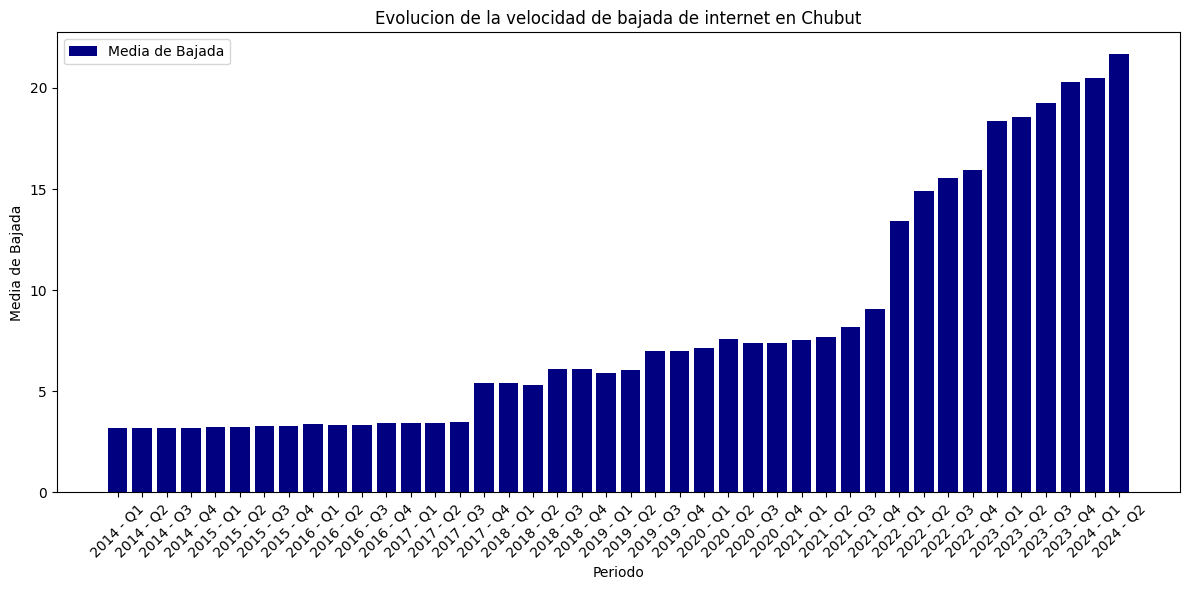

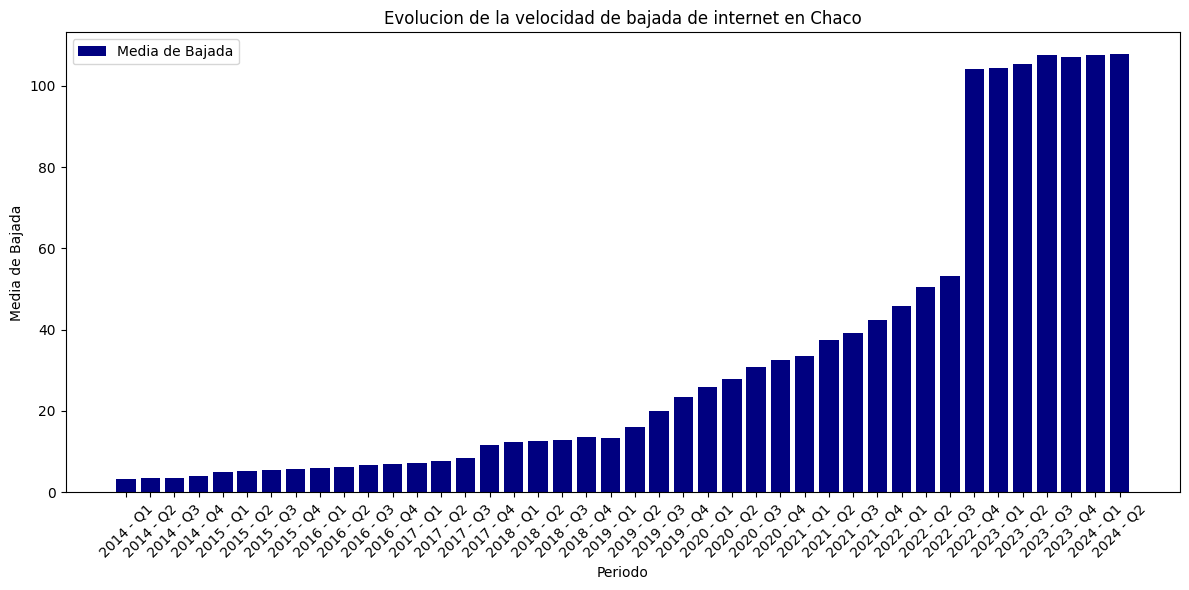

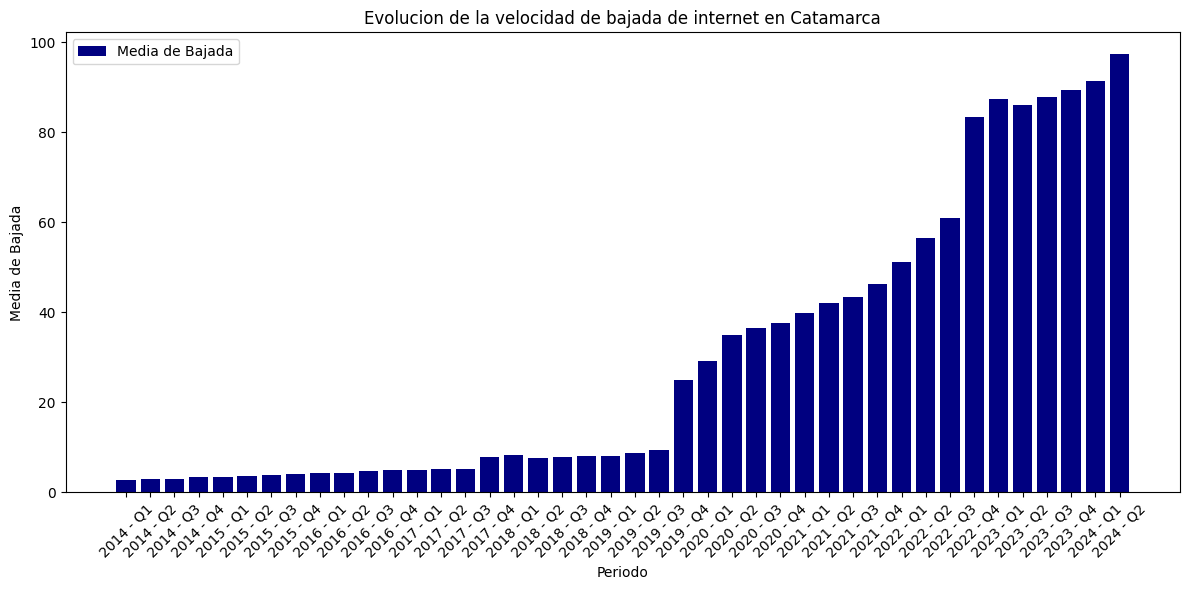

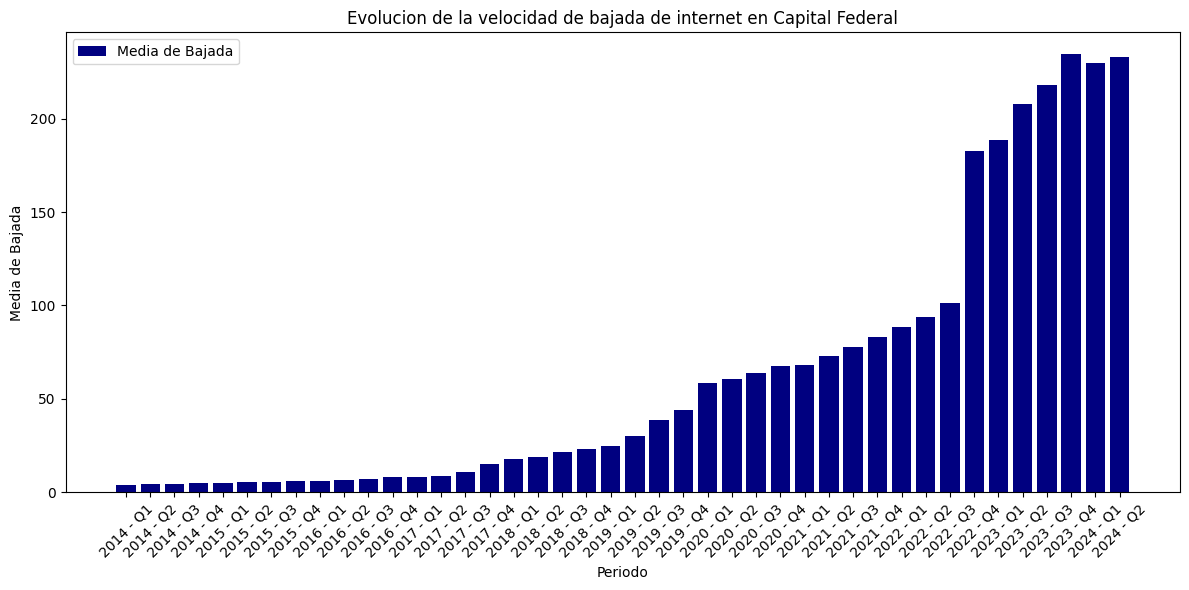

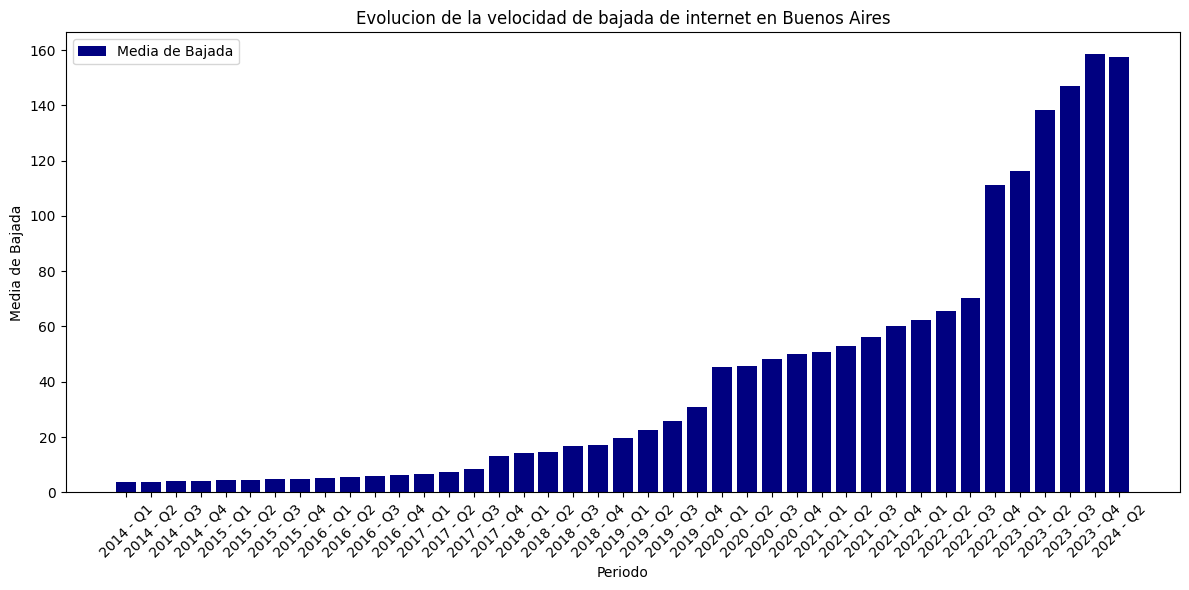

In [782]:
for provincia in provincias:
    
    df_provincia = df[df['Provincia'] == provincia].copy()

    plt.figure(figsize=(12, 6))

    plt.bar(df_provincia['Periodo'], df_provincia['Mbps (Media de bajada)'], color='#000080', label='Media de Bajada')

    plt.xlabel('Periodo')
    plt.ylabel('Media de Bajada')
    plt.title(f'Evolucion de la velocidad de bajada de internet en {provincia}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend()

    plt.show()

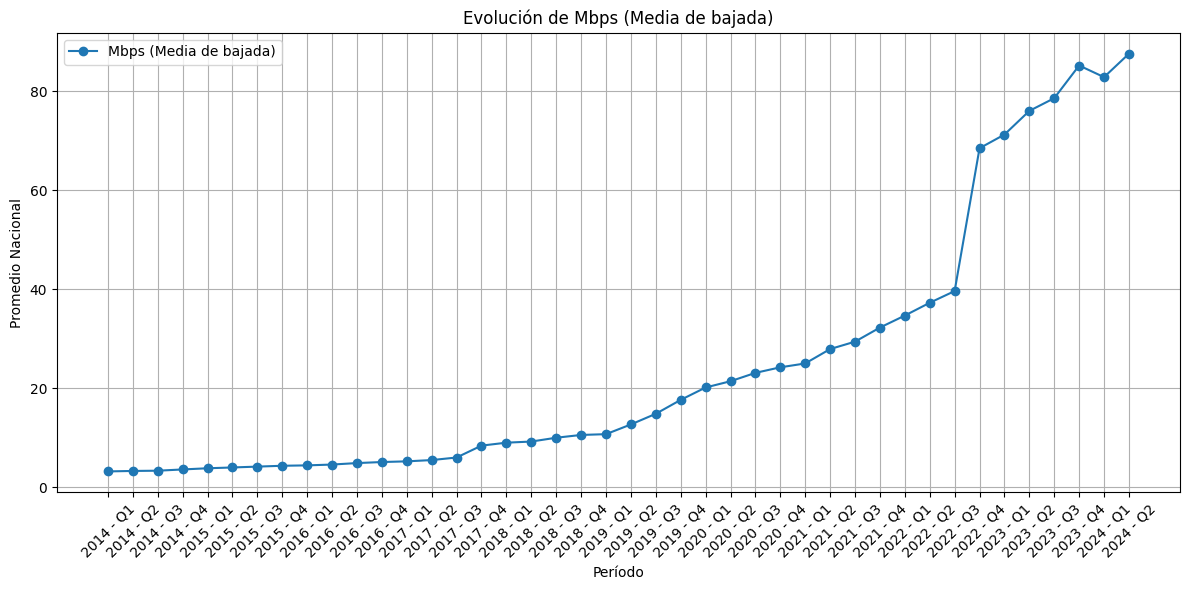

In [783]:
promedio_nacional_vel = df.groupby('Periodo')['Mbps (Media de bajada)'].mean().reset_index()

plt.figure(figsize=(12, 6))

plt.plot(promedio_nacional_vel['Periodo'], promedio_nacional_vel['Mbps (Media de bajada)'], marker='o', label='Mbps (Media de bajada)')

plt.title('Evolución de Mbps (Media de bajada)')
plt.xlabel('Período')
plt.ylabel('Promedio Nacional')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

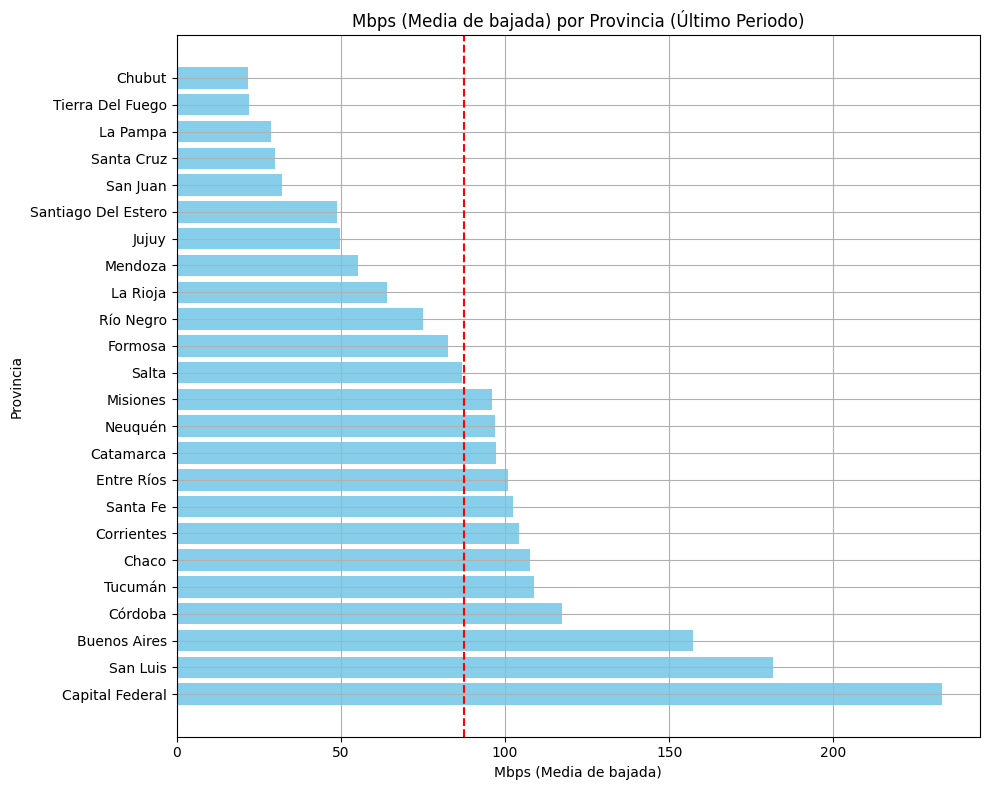

In [784]:
ultimo_periodo = df[df['Periodo'] == df['Periodo'].max()]  # Suponiendo que 'Periodo' está en un formato adecuado para ordenar (puede ser un valor numérico o string)

ultimo_periodo = ultimo_periodo.sort_values(by='Mbps (Media de bajada)', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(ultimo_periodo['Provincia'], ultimo_periodo['Mbps (Media de bajada)'], color='skyblue')

promedio_nacional = ultimo_periodo['Mbps (Media de bajada)'].mean()
plt.axvline(promedio_nacional, color='red', linestyle='--')

plt.xlabel('Mbps (Media de bajada)')
plt.ylabel('Provincia')
plt.title('Mbps (Media de bajada) por Provincia (Último Periodo)')
plt.grid(True)
plt.tight_layout()

plt.show()

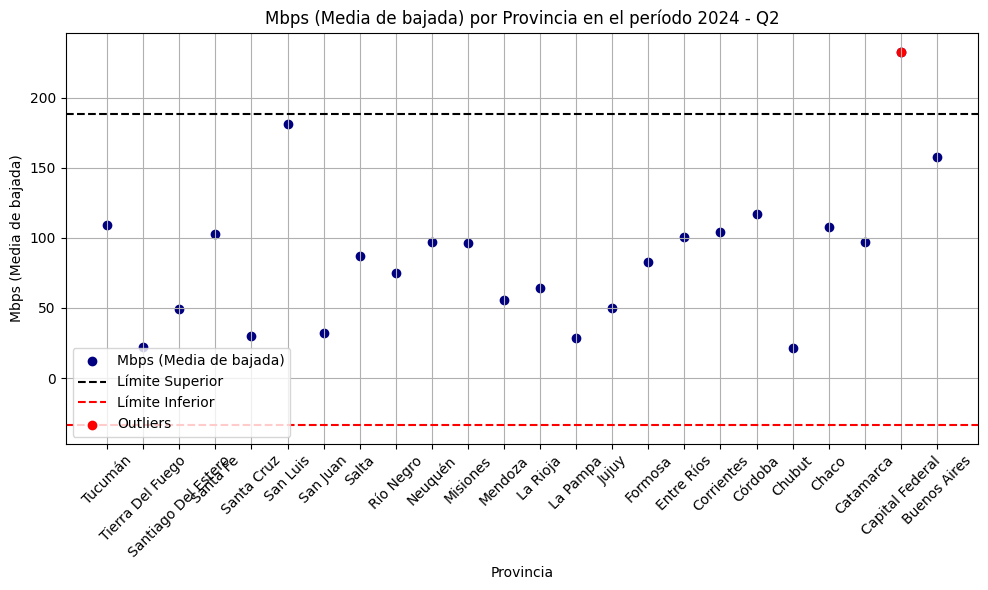

In [790]:
ultimo_periodo = df['Periodo'].max()
df_ultimo_periodo = df[df['Periodo'] == ultimo_periodo]

Q1 = df_ultimo_periodo['Mbps (Media de bajada)'].quantile(0.25)
Q3 = df_ultimo_periodo['Mbps (Media de bajada)'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

provincias_outliers = df_ultimo_periodo[(df_ultimo_periodo['Mbps (Media de bajada)'] < limite_inferior) | (df_ultimo_periodo['Mbps (Media de bajada)'] > limite_superior)]

plt.figure(figsize=(10, 6))

plt.scatter(df_ultimo_periodo['Provincia'], df_ultimo_periodo['Mbps (Media de bajada)'], color='#000080', label='Mbps (Media de bajada)')

plt.axhline(limite_superior, color='black', linestyle='--', label='Límite Superior')
plt.axhline(limite_inferior, color='red', linestyle='--', label='Límite Inferior')

if not provincias_outliers.empty:
    plt.scatter(provincias_outliers['Provincia'], provincias_outliers['Mbps (Media de bajada)'], color='red', label='Outliers')

plt.xlabel('Provincia')
plt.ylabel('Mbps (Media de bajada)')
plt.title(f'Mbps (Media de bajada) por Provincia en el período {ultimo_periodo}')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()

plt.show()

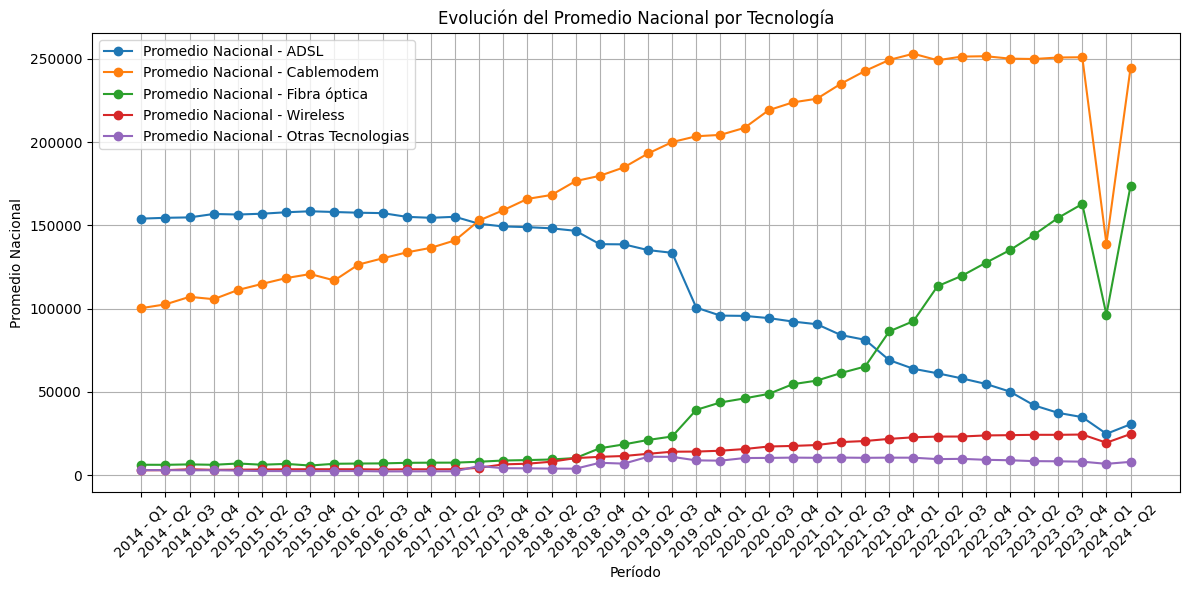

In [791]:
columnas_grafico = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otras Tecnologias']

promedio_nacional_por_periodo = df.groupby('Periodo')[columnas_grafico].mean().reset_index()

# Graficar
plt.figure(figsize=(12, 6))

# Graficar promedio nacional como línea para cada tecnología
for columna in columnas_grafico:
    plt.plot(promedio_nacional_por_periodo['Periodo'], promedio_nacional_por_periodo[columna], marker='o', label=f'Promedio Nacional - {columna}')

plt.title('Evolución del Promedio Nacional por Tecnología')
plt.xlabel('Período')
plt.ylabel('Promedio Nacional')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

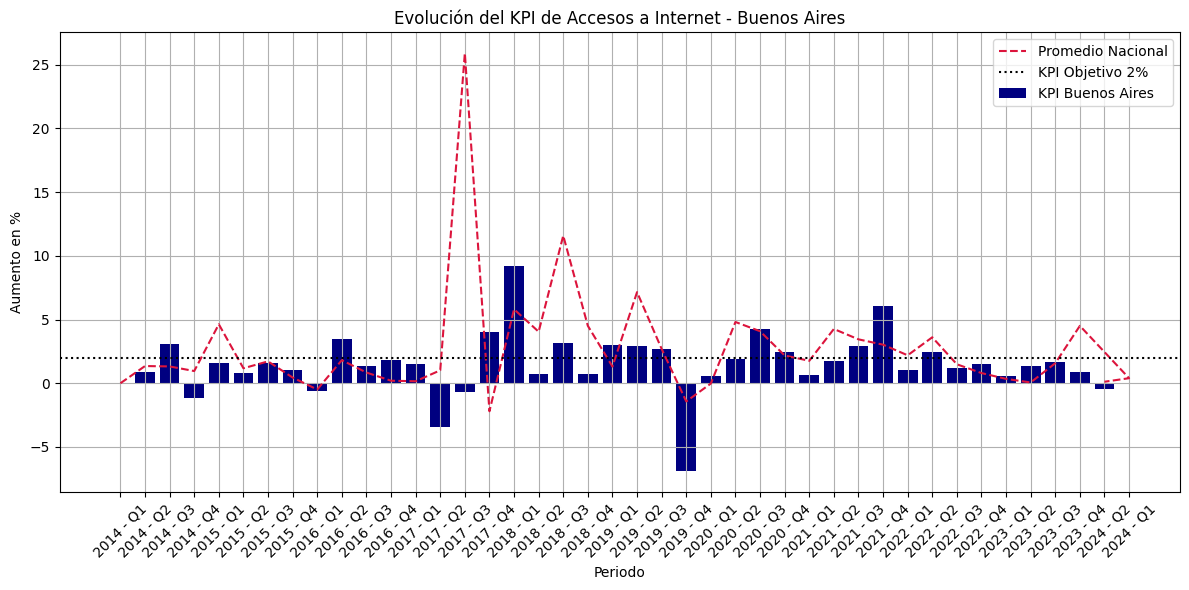

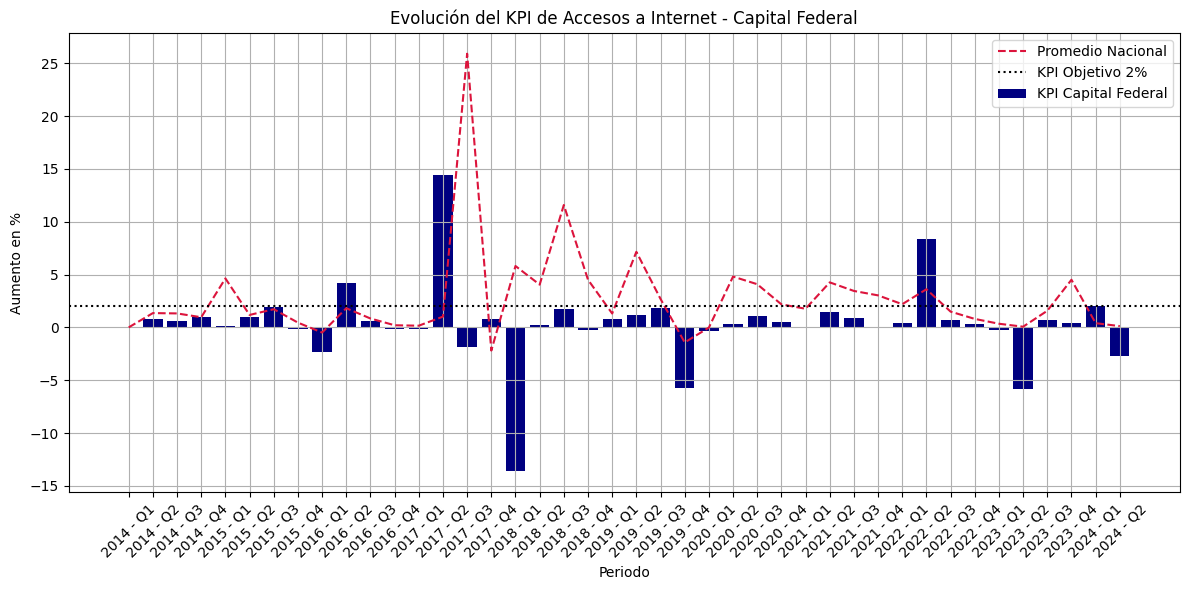

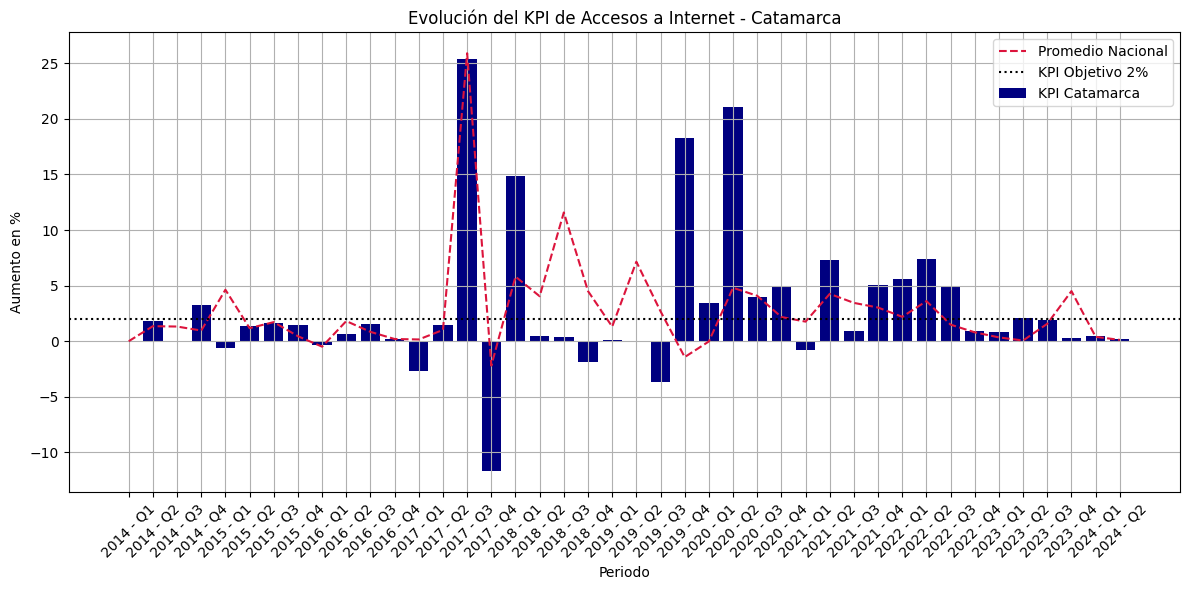

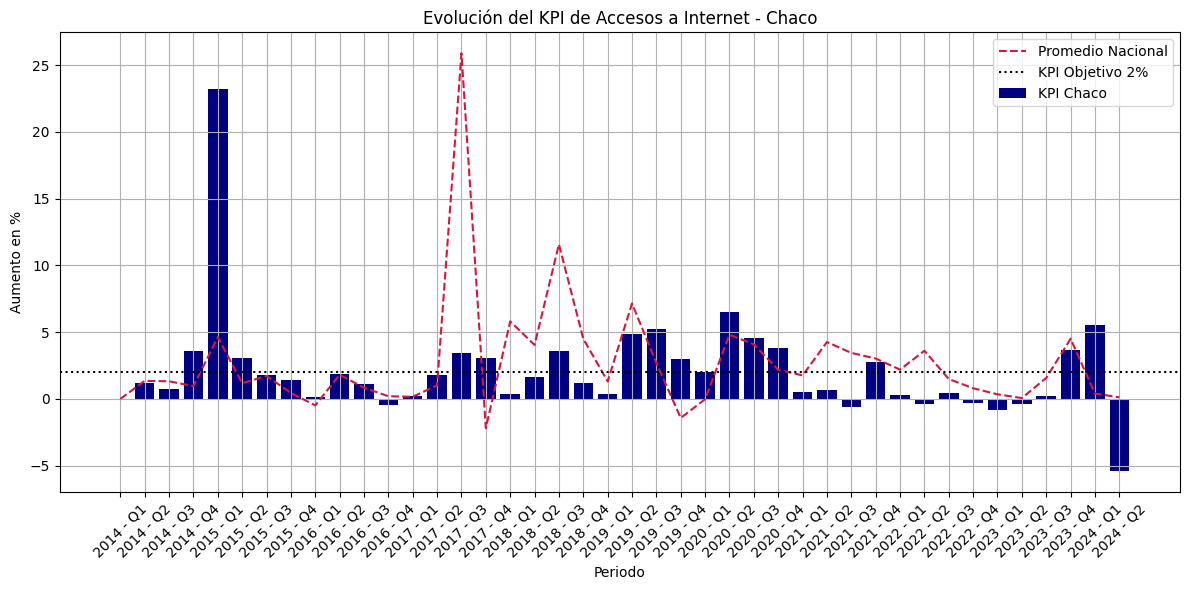

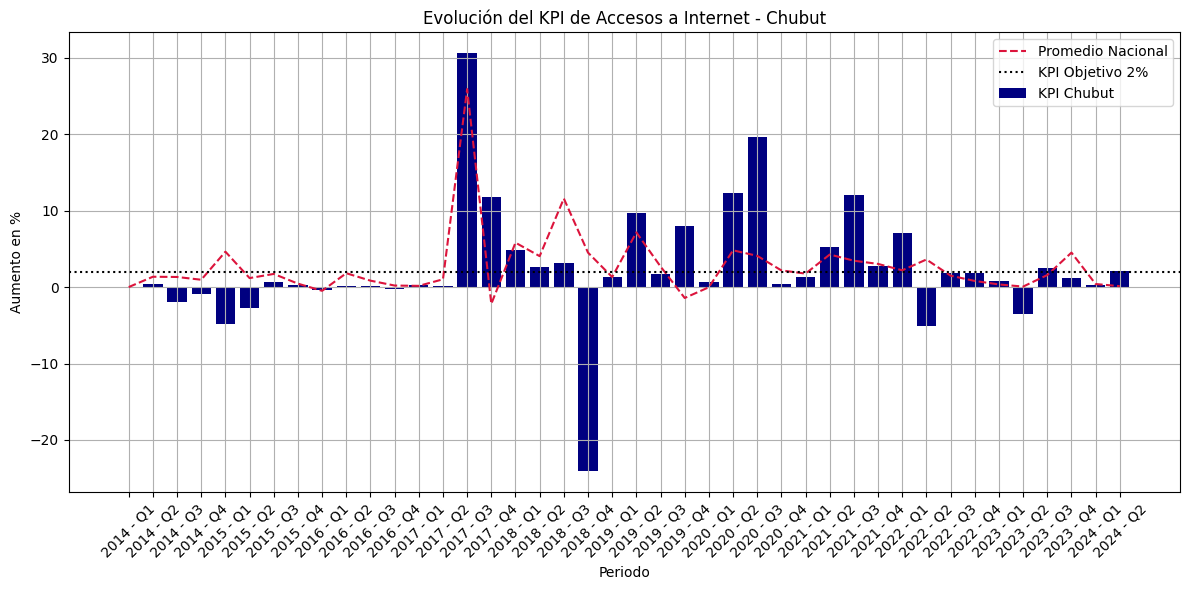

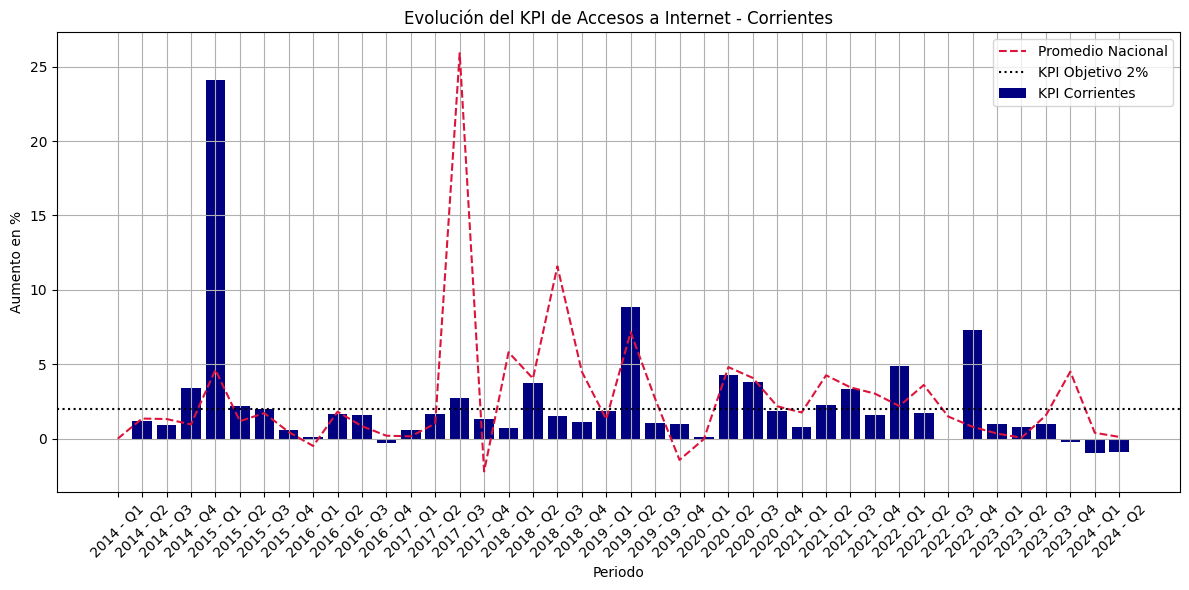

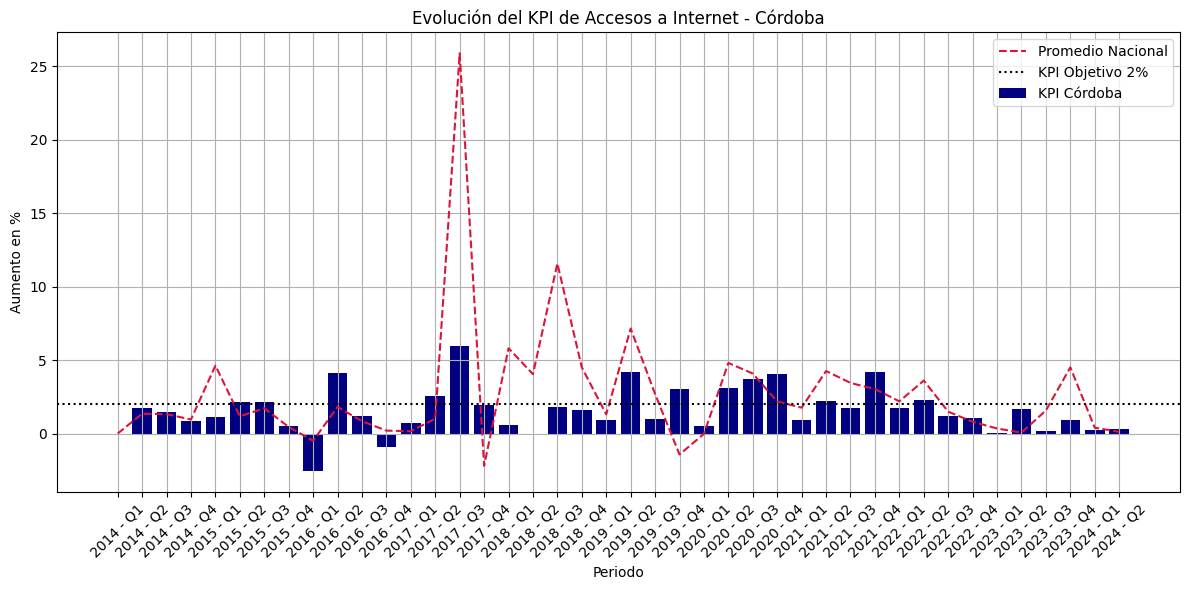

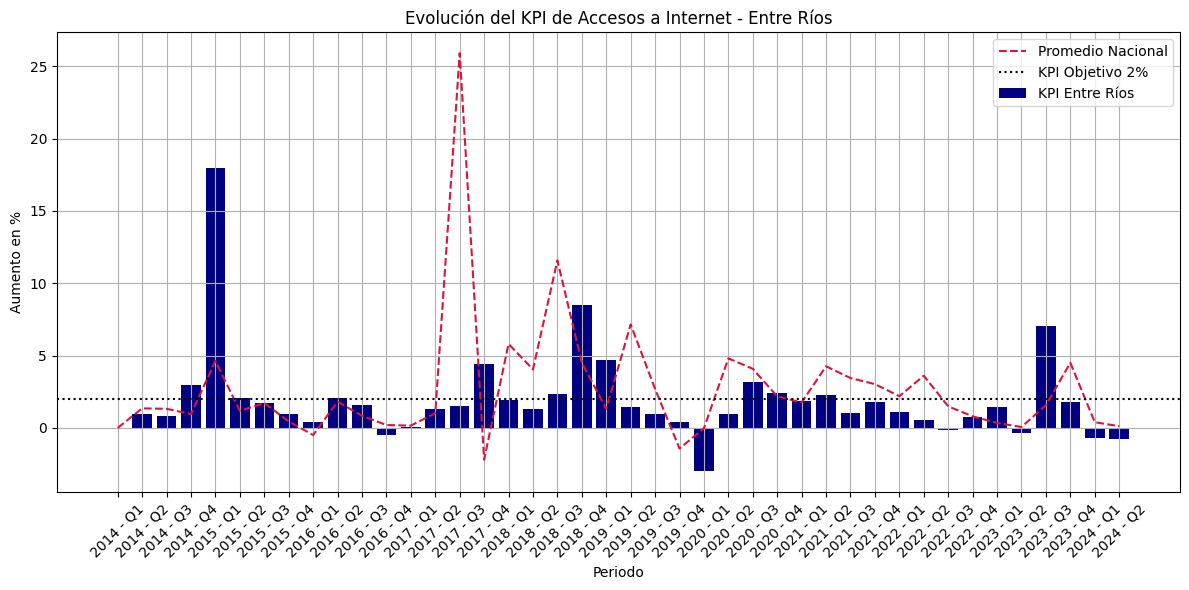

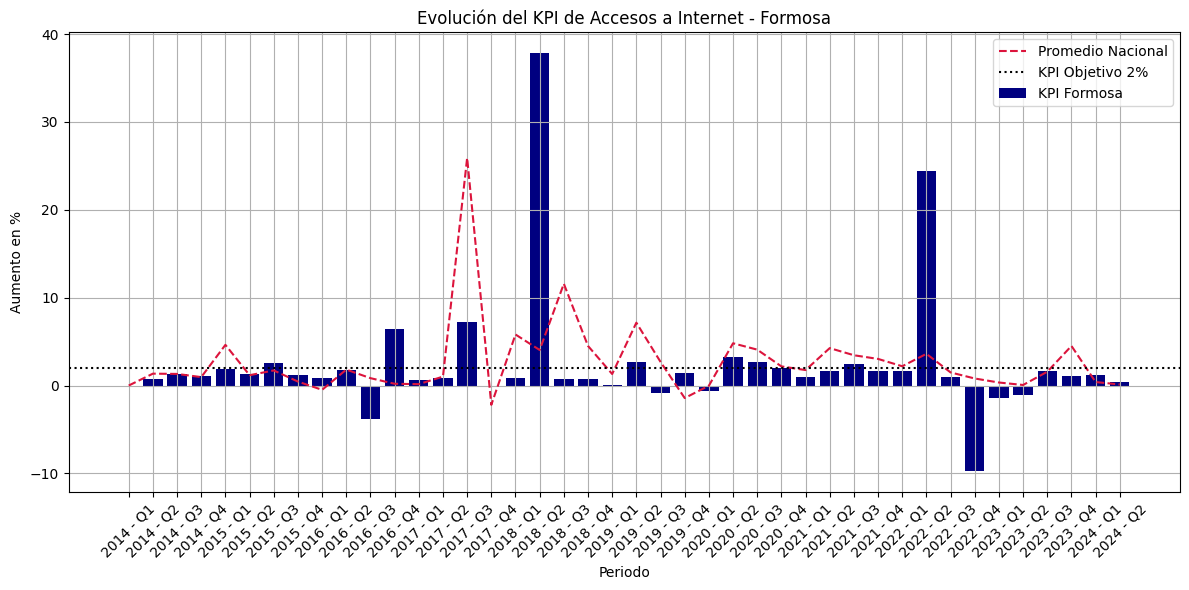

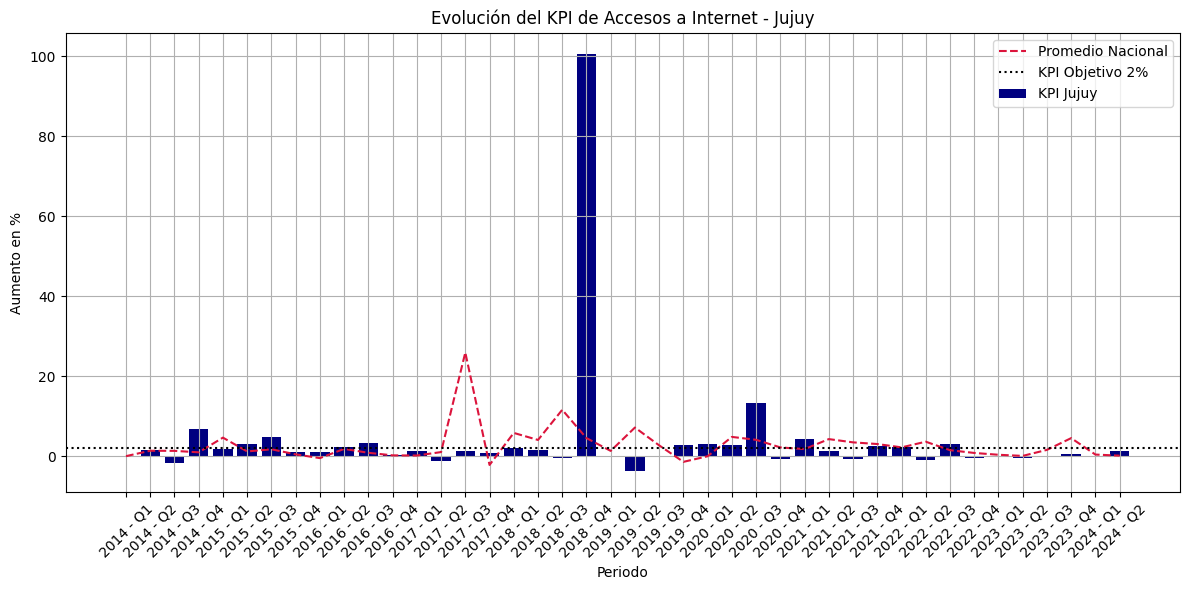

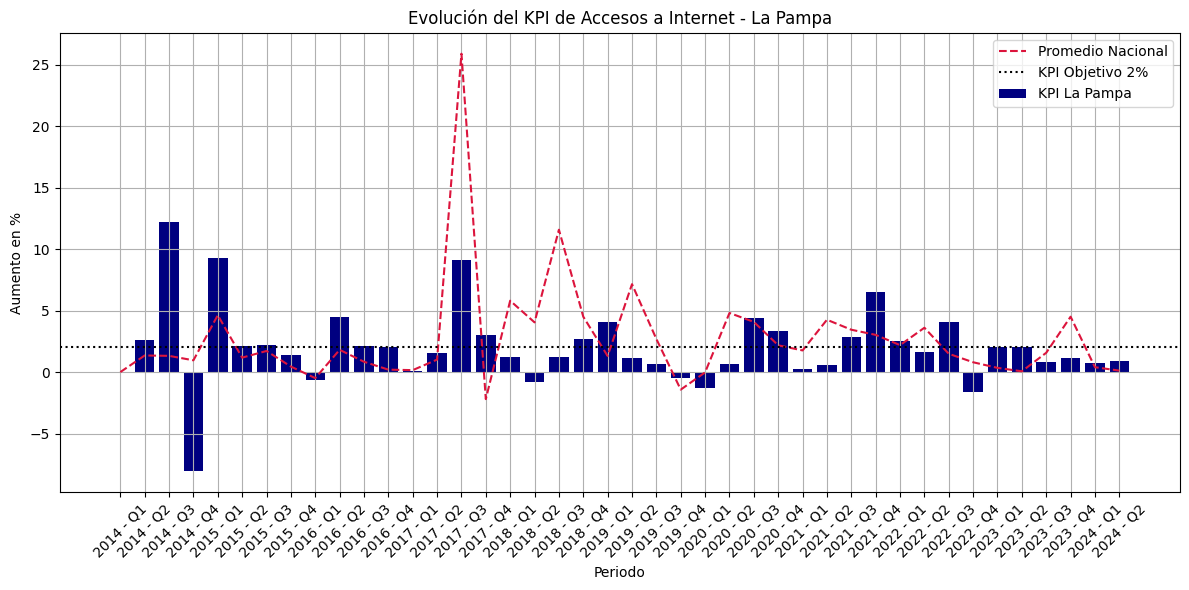

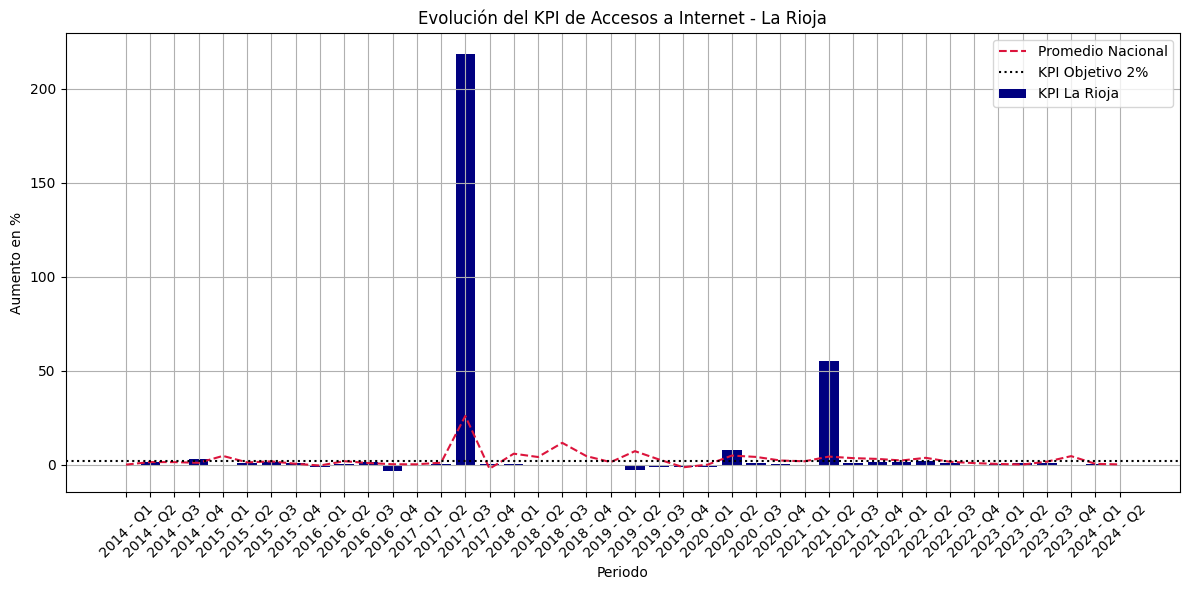

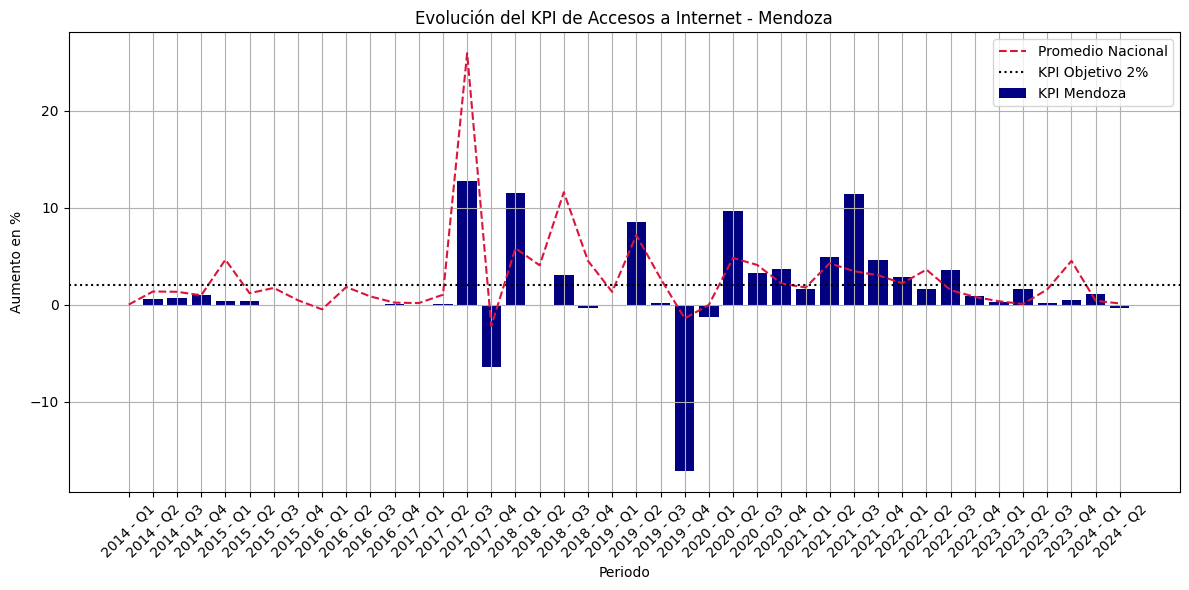

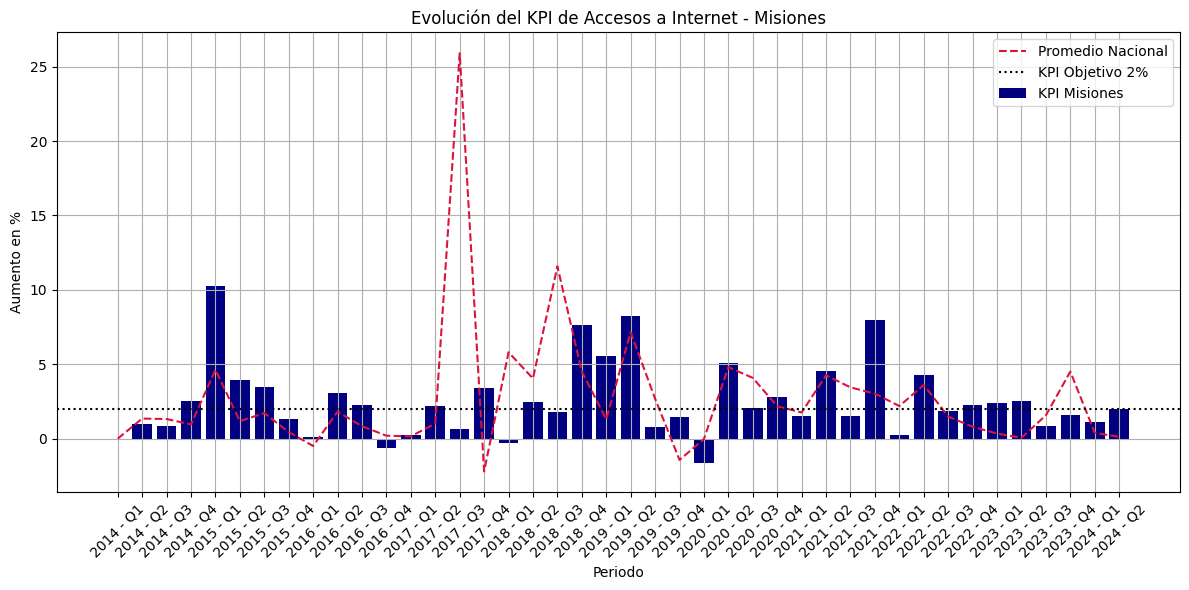

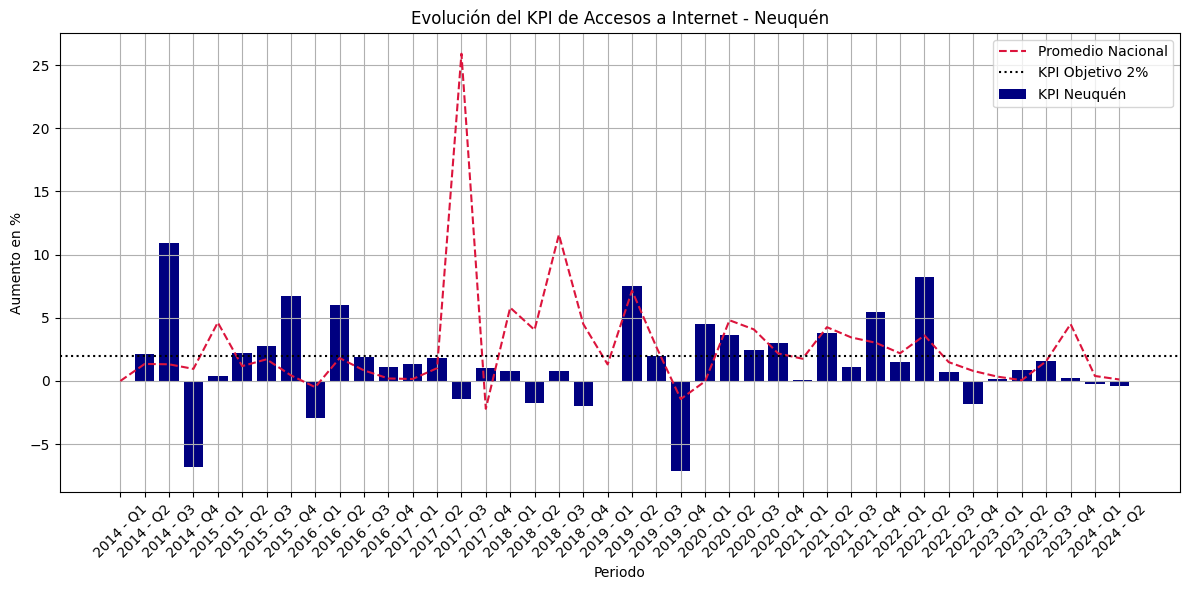

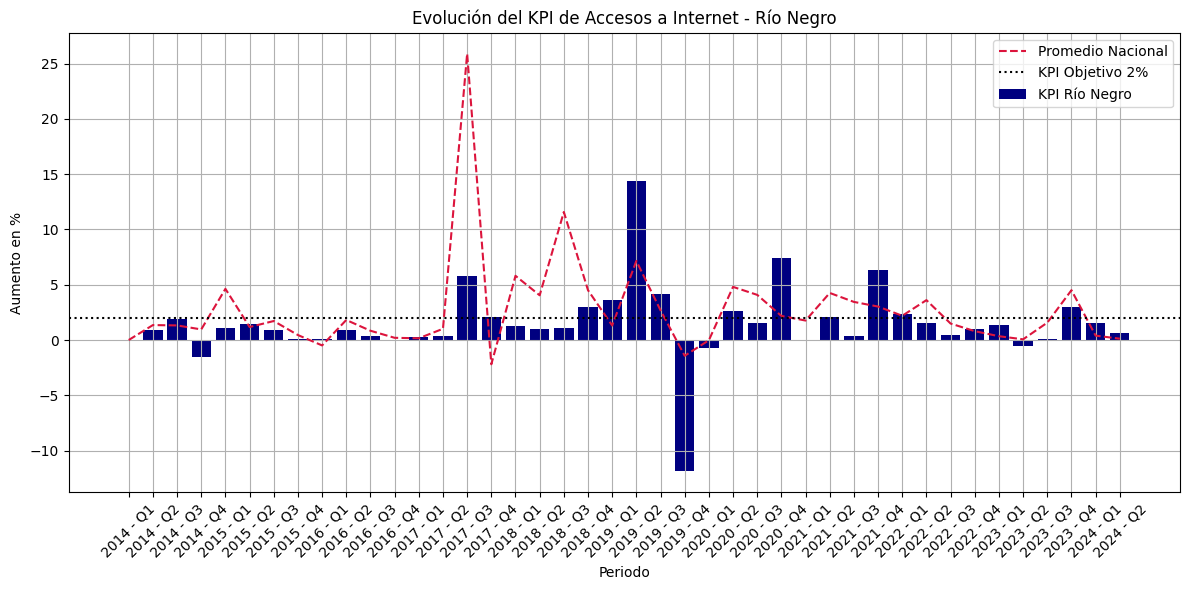

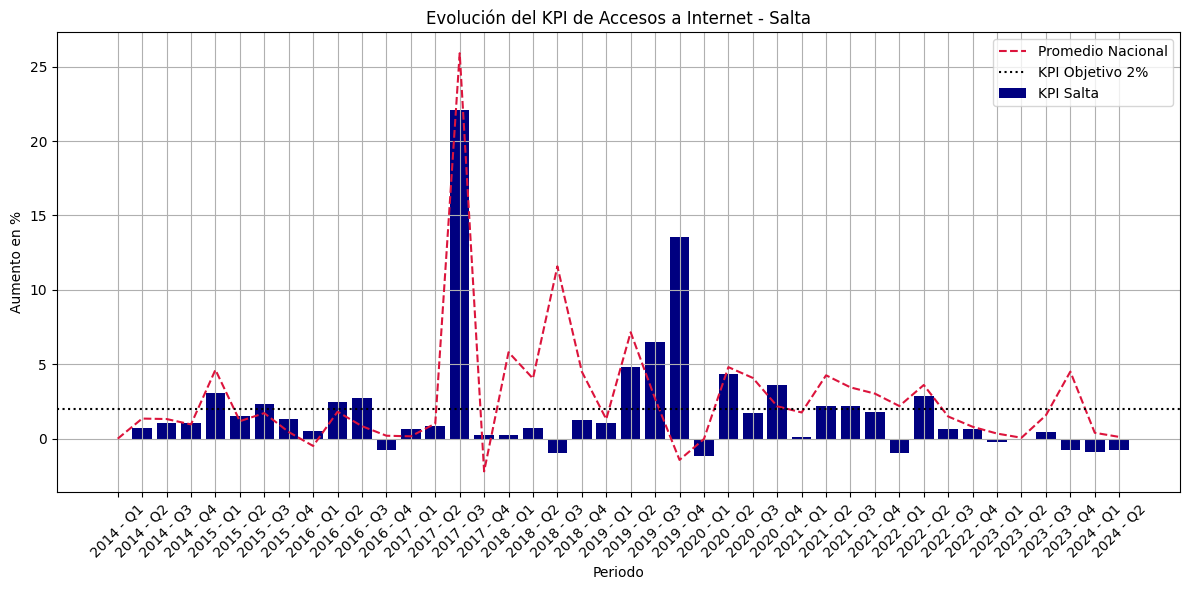

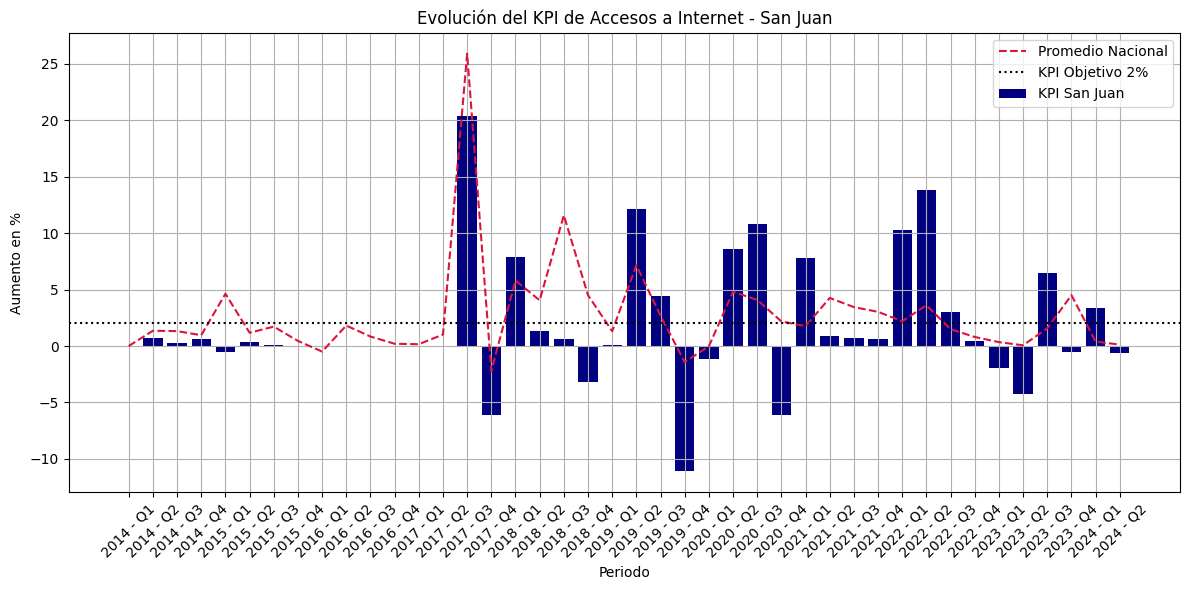

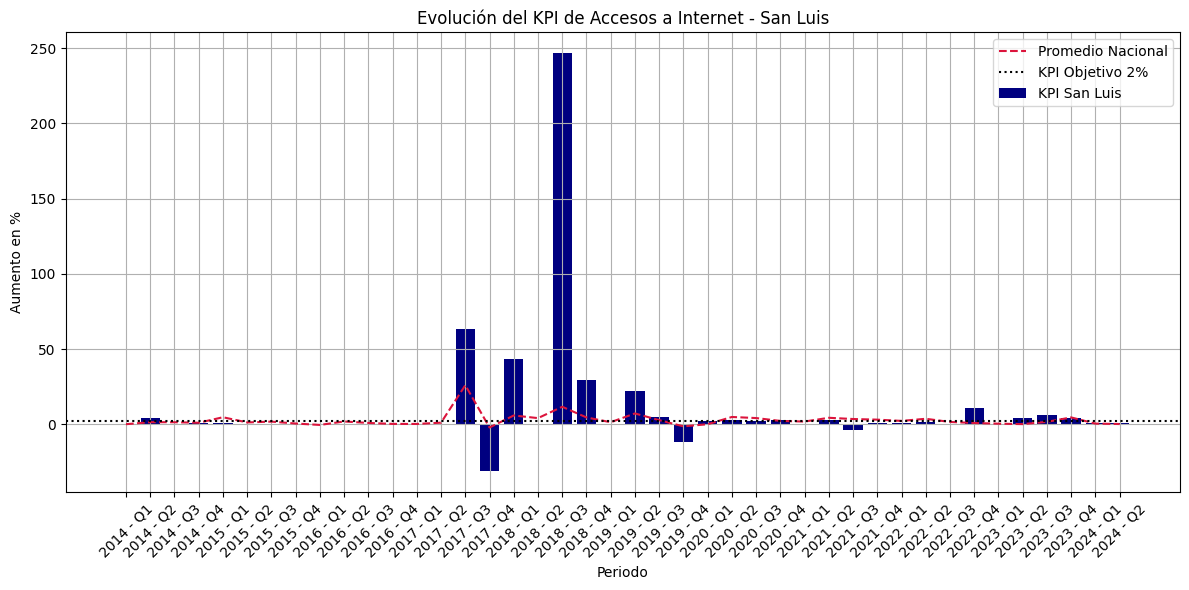

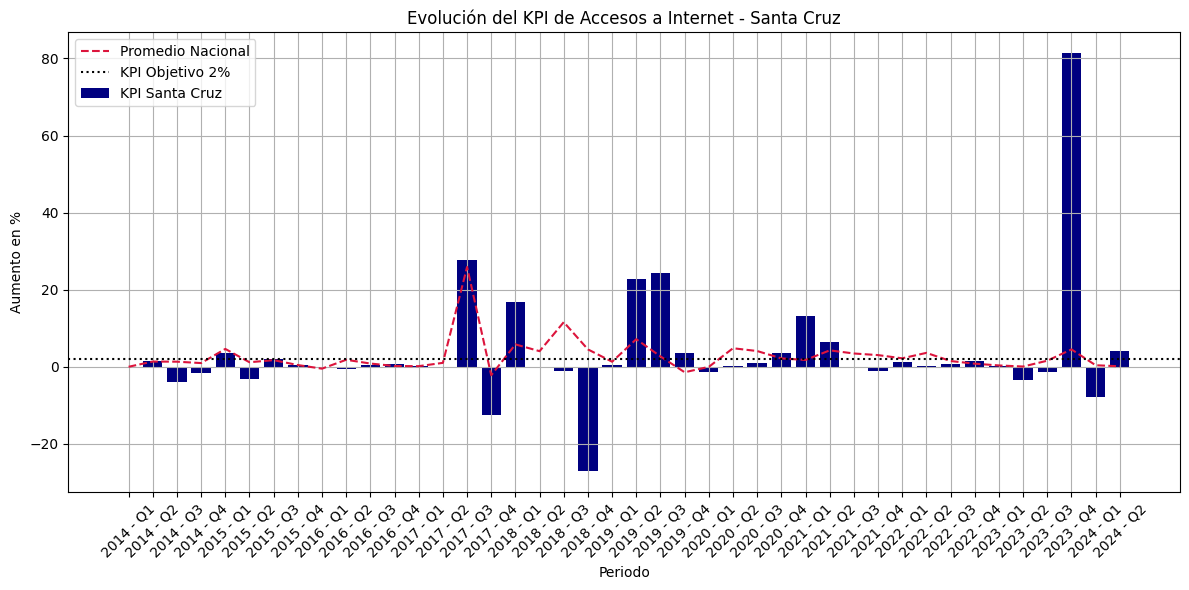

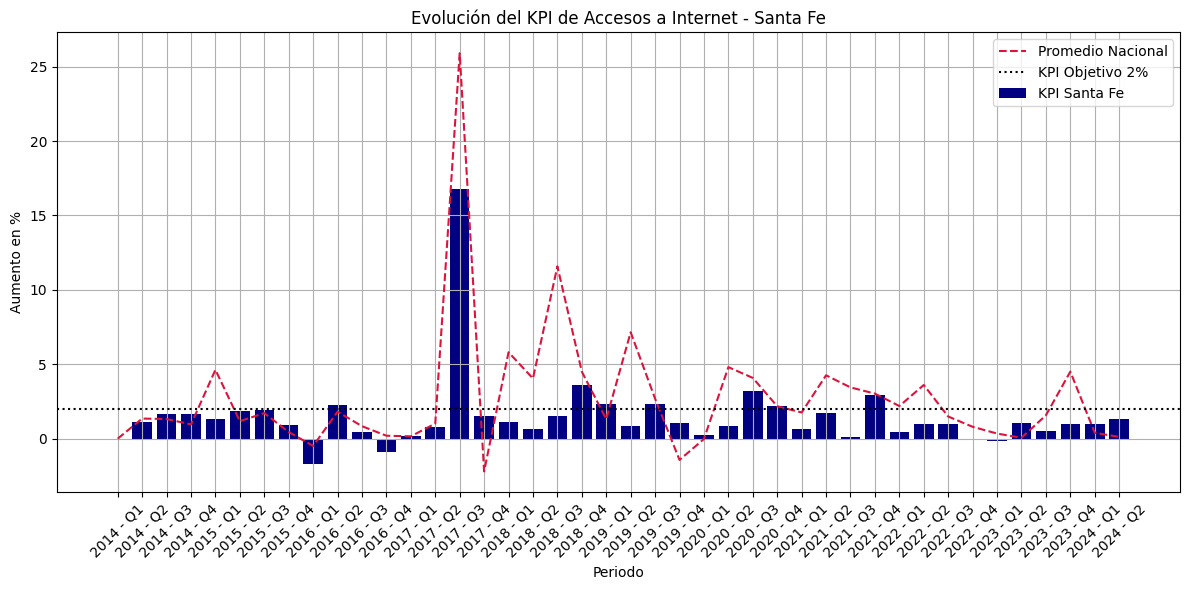

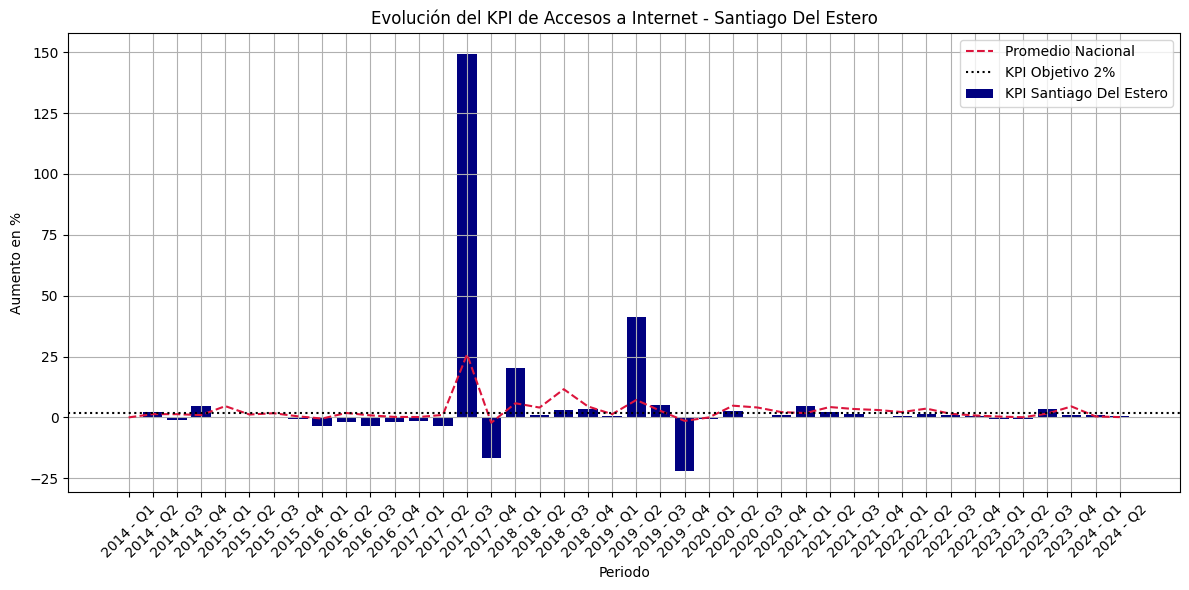

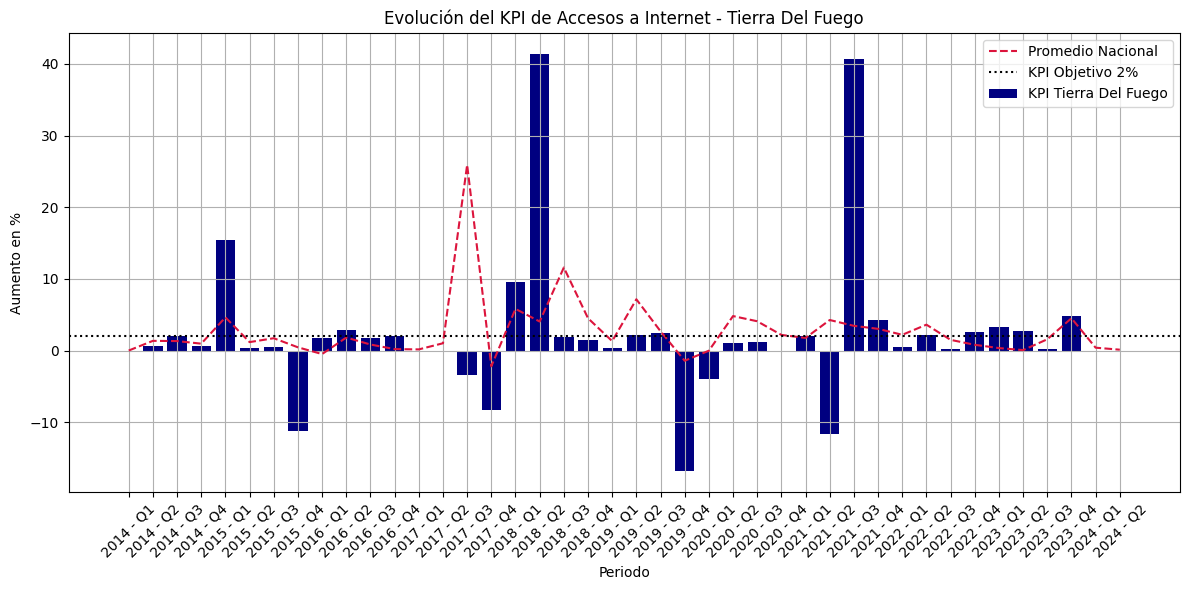

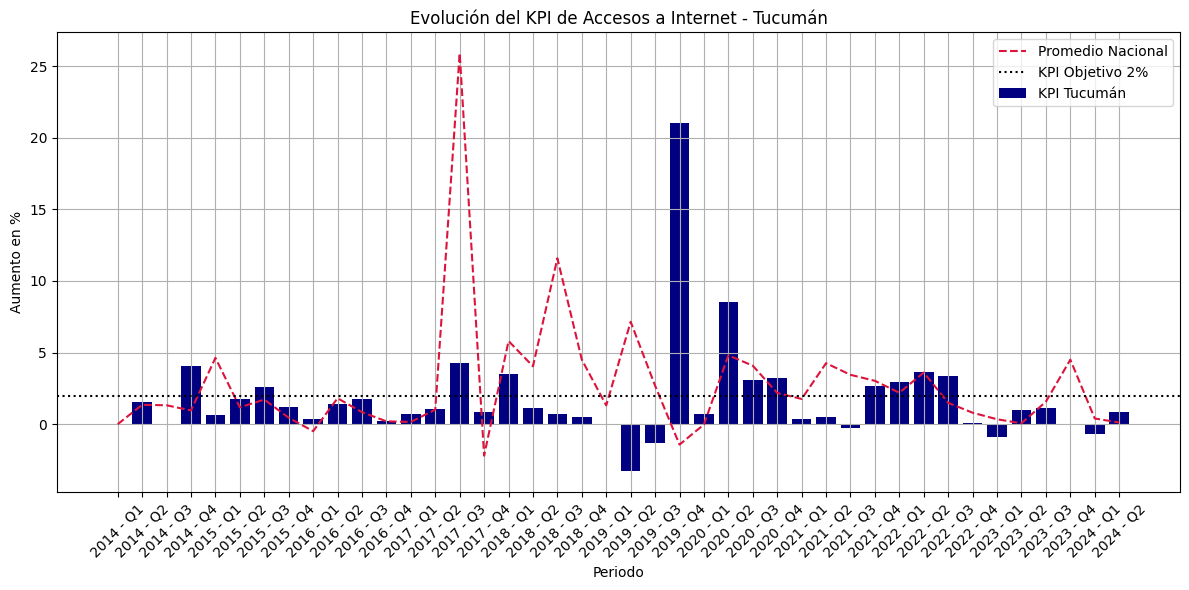

In [792]:
df['Accesos Totales'] = df[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otras Tecnologias']].sum(axis=1)

df = df.sort_values(by=['Provincia', 'Periodo'])

df['Accesos Totales en el Periodo Anterior'] = df.groupby('Provincia')['Accesos Totales'].shift(1)
df['Nuevos Accesos'] = df['Accesos Totales'] - df['Accesos Totales en el Periodo Anterior']

df['KPI'] = (df['Nuevos Accesos'] / df['Accesos Totales en el Periodo Anterior']) * 100

df = df.fillna(0)

promedio_nacional_kpi = df.groupby('Periodo')['KPI'].mean().reset_index()

provincias = df['Provincia'].unique()

kpi_objetivo = 2

for provincia in provincias:
    plt.figure(figsize=(12, 6))
    df_provincia = df[df['Provincia'] == provincia]
    plt.bar(df_provincia['Periodo'], df_provincia['KPI'], label=f'KPI {provincia}', color='navy')
    
    # Graficar el promedio nacional
    plt.plot(promedio_nacional_kpi['Periodo'], promedio_nacional_kpi['KPI'], linestyle='--', color='crimson', label='Promedio Nacional')
    
    plt.axhline(y=kpi_objetivo, color='black', linestyle='dotted', label='KPI Objetivo 2%')

    plt.xlabel('Periodo')
    plt.ylabel('Aumento en %')
    plt.title(f'Evolución del KPI de Accesos a Internet - {provincia}')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [794]:
promedio_nacional_accesos = df.groupby('Periodo')['Accesos por cada 100 hogares'].mean().reset_index()
df = pd.merge(df, promedio_nacional_accesos.rename(columns={'Accesos por cada 100 hogares': 'Accesos por cada 100 hogares (nacional)'}), on=['Periodo'], how='left')

def gini_entre_provincias(data):
    '''
    Esta funcion agrupa la columna 'Accesos por cada 100 hogares' de nuestro Data Frame por la columna 'Periodo' y le aplica el coefficiente de Gini
    Retorna: Un Data Frame de dos columnas (el Periodo y los Valores del Coeficiente)
    '''
    gini_values = data.groupby('Periodo')['Accesos por cada 100 hogares'].apply(gini_coefficient).reset_index()
    return gini_values

def gini_coefficient(x):
    '''
    Esta funcion esta diseñada para ejecutar el Coeficiente de Gini sobre una columna especifica.
    El coeficiente de Gini es una medida estandar utilizada en Economia y Politica a nivel mundial.
    Retorna: Una serie de valores entre 0 y 1 donde 0 es una distribucion perfectamente equitativa y 1 es el maximo de inequidad posible.
    '''
    n = len(x)
    x_sorted = np.sort(x)
    index = np.arange(1, n + 1)
    return ((np.sum((2 * index - n - 1) * x_sorted)) / (n * np.sum(x_sorted)))

CoDePH = gini_entre_provincias(df)
df = pd.merge(df, CoDePH.rename(columns={'Accesos por cada 100 hogares': 'Coeficiente de Desigualdad de Penetración por Hogar (CoDePH)'}), on=['Periodo'], how='left')

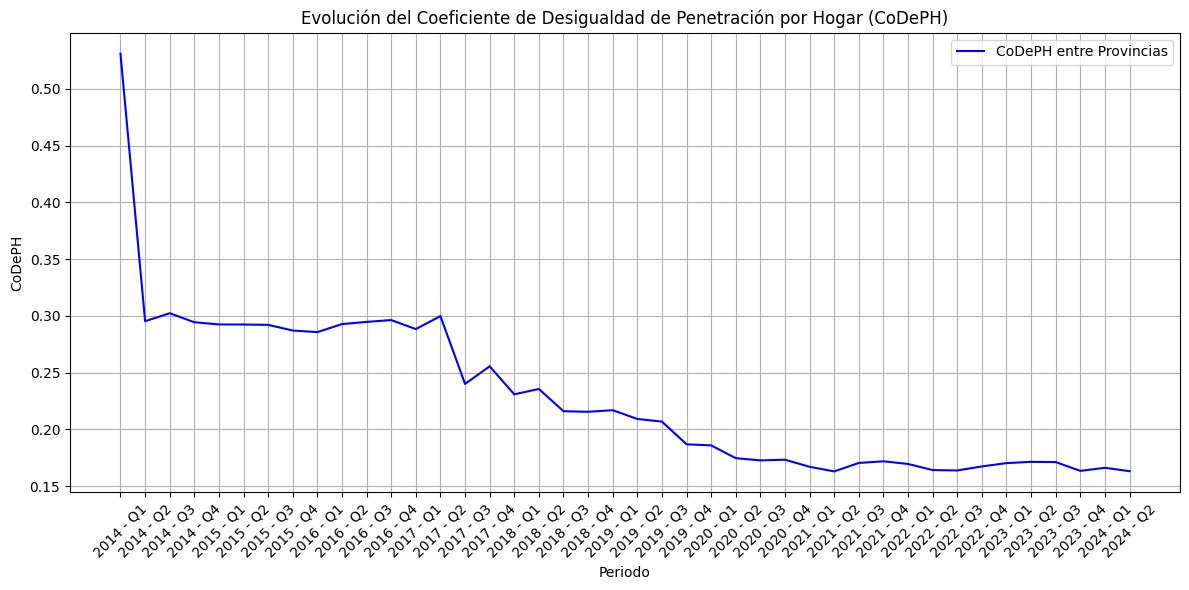

In [795]:
df = df.sort_values(by='Periodo')

# Graficar CoDePH a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(df['Periodo'], df['Coeficiente de Desigualdad de Penetración por Hogar (CoDePH)'], linestyle='-', color='b', label='CoDePH entre Provincias')
plt.xlabel('Periodo')
plt.ylabel('CoDePH')
plt.title('Evolución del Coeficiente de Desigualdad de Penetración por Hogar (CoDePH)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [796]:
# Calcular el Porcentaje de Red en Fibra Óptica (PReFO)
total_accesos_fibra_optica = df['Fibra óptica'].sum()
df['Porcentaje Fibra Óptica (PReFO)'] = (df['Fibra óptica'] / df['Accesos Totales']) * 100

# Calcular el promedio nacional del PReFO por período
PReFO_Nacional = df.groupby('Periodo')['Porcentaje Fibra Óptica (PReFO)'].mean().reset_index()

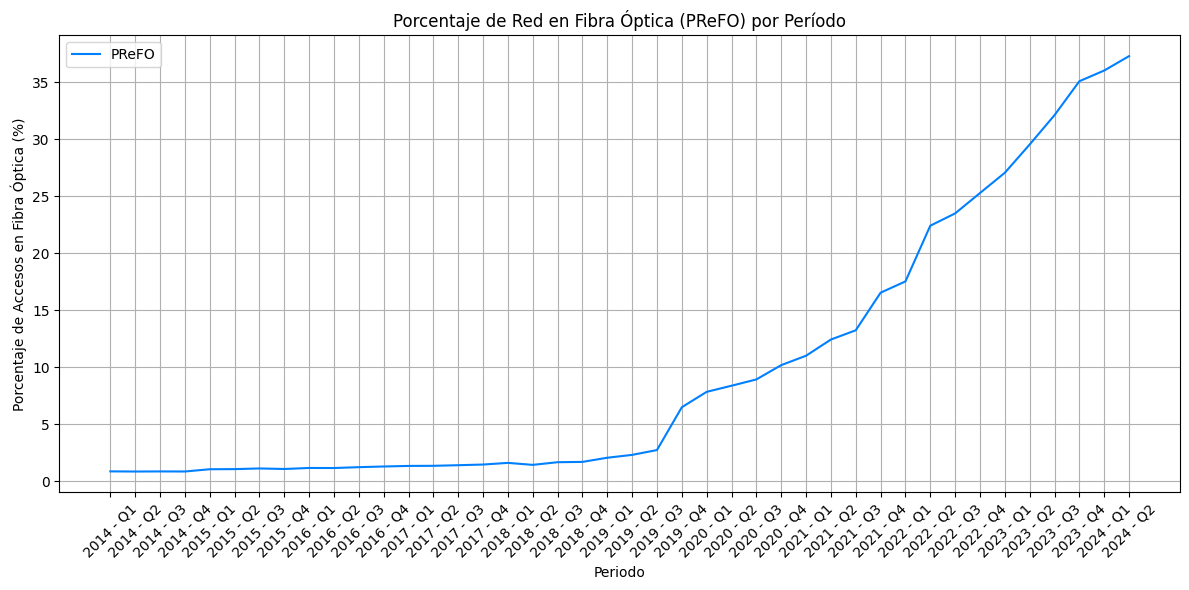

In [798]:
# Graficar el PReFO histórico
plt.figure(figsize=(12, 6))
plt.plot(PReFO_Nacional['Periodo'], PReFO_Nacional['Porcentaje Fibra Óptica (PReFO)'], linestyle='-', color='#0080FF', label='PReFO')
plt.xlabel('Periodo')
plt.ylabel('Porcentaje de Accesos en Fibra Óptica (%)')
plt.title('Porcentaje de Red en Fibra Óptica (PReFO) por Período')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

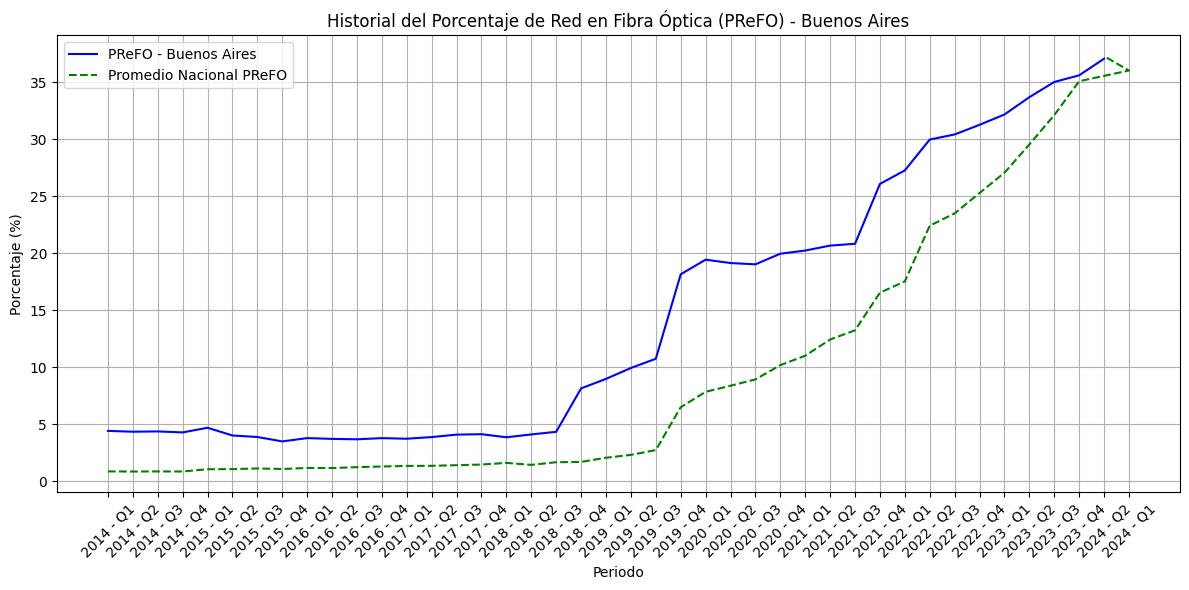

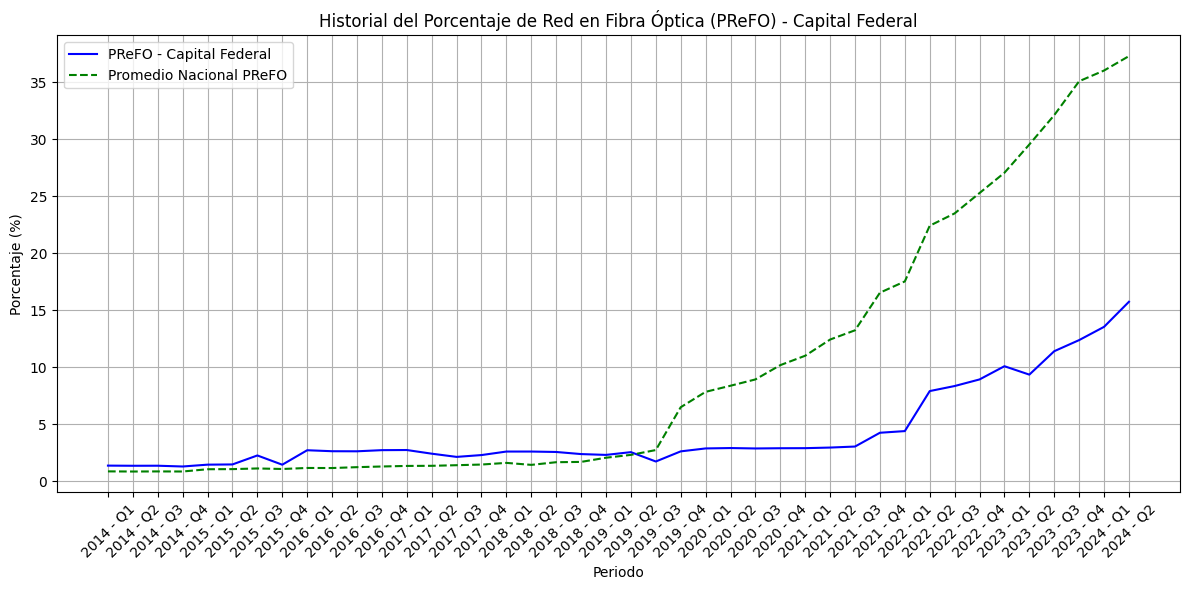

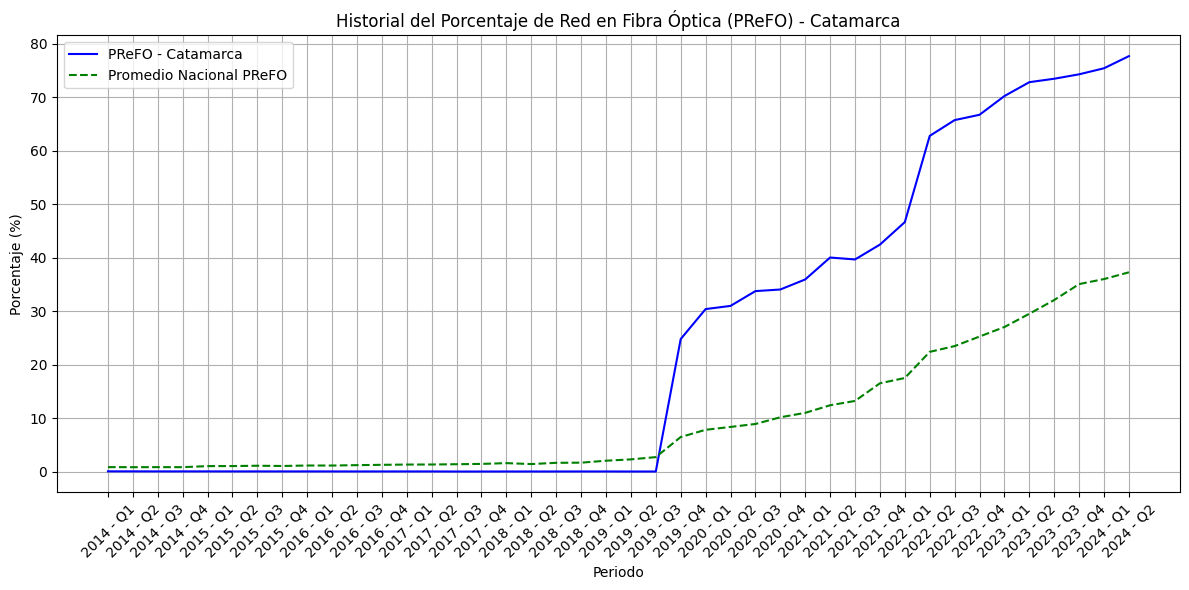

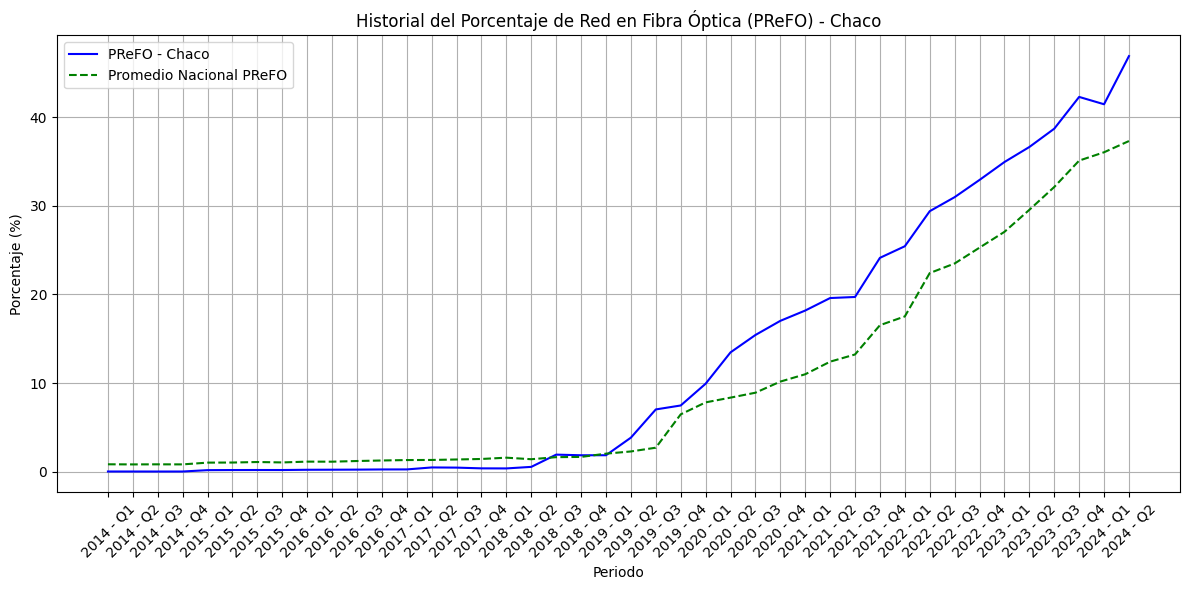

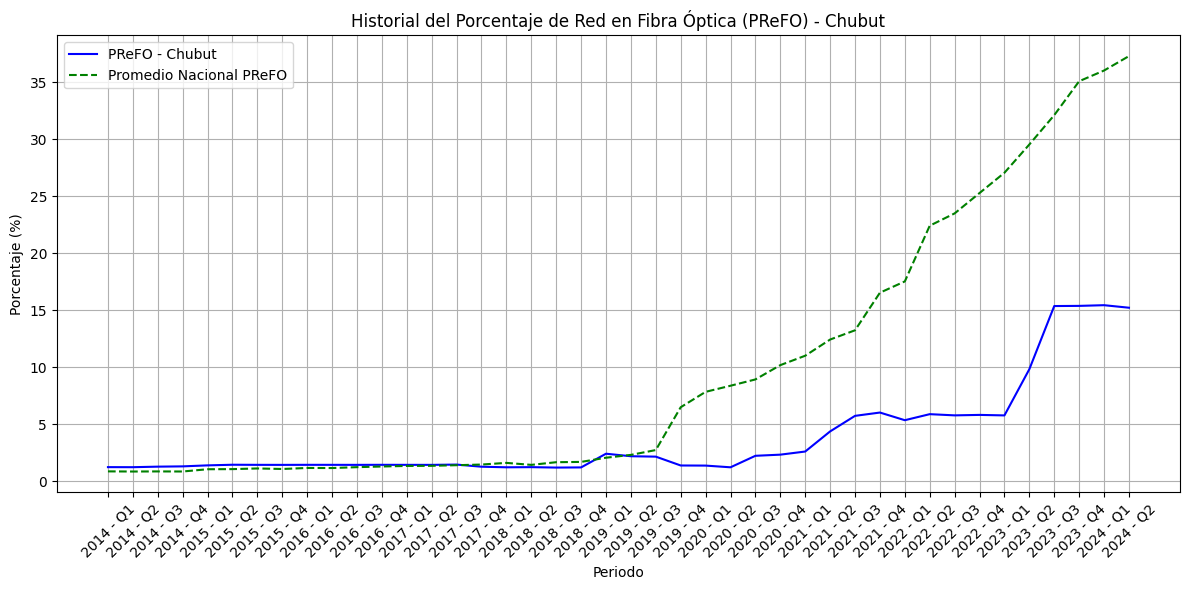

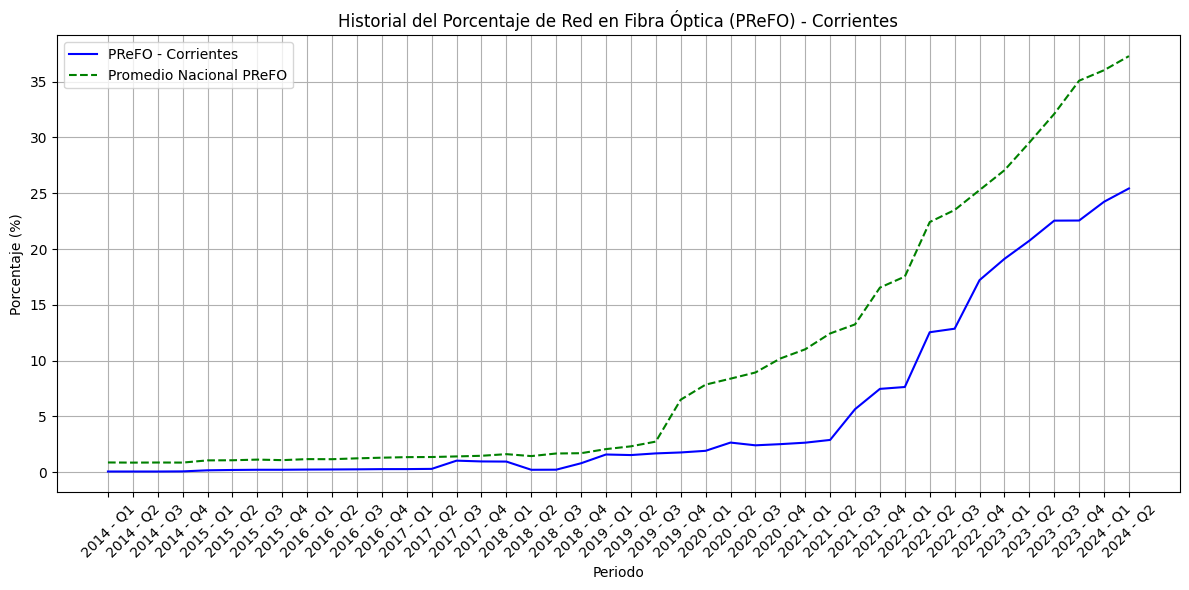

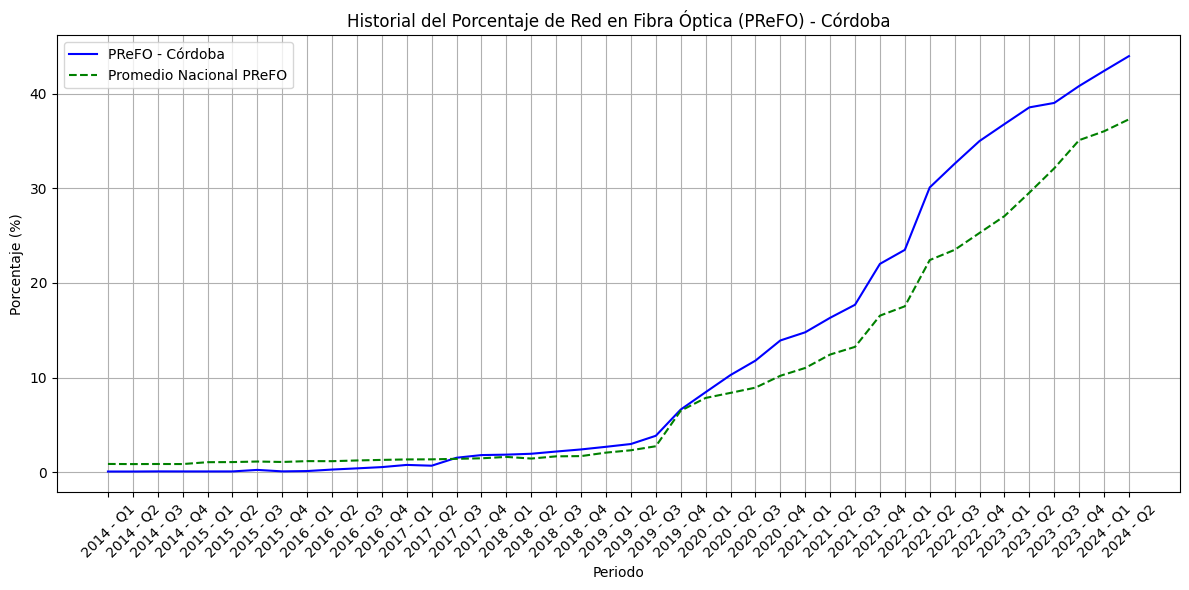

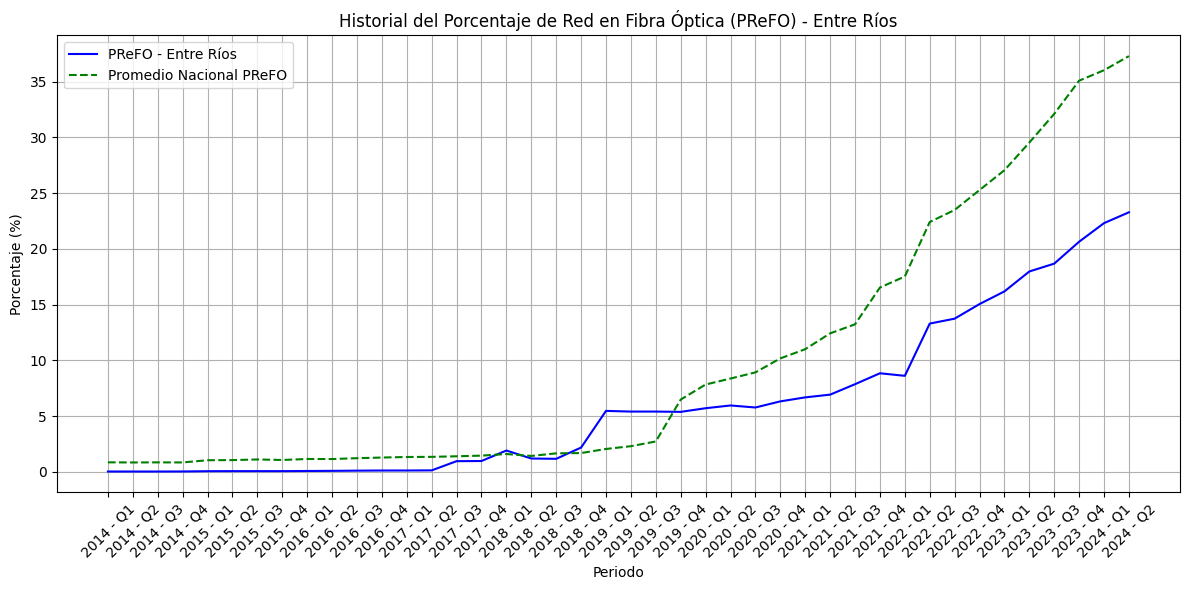

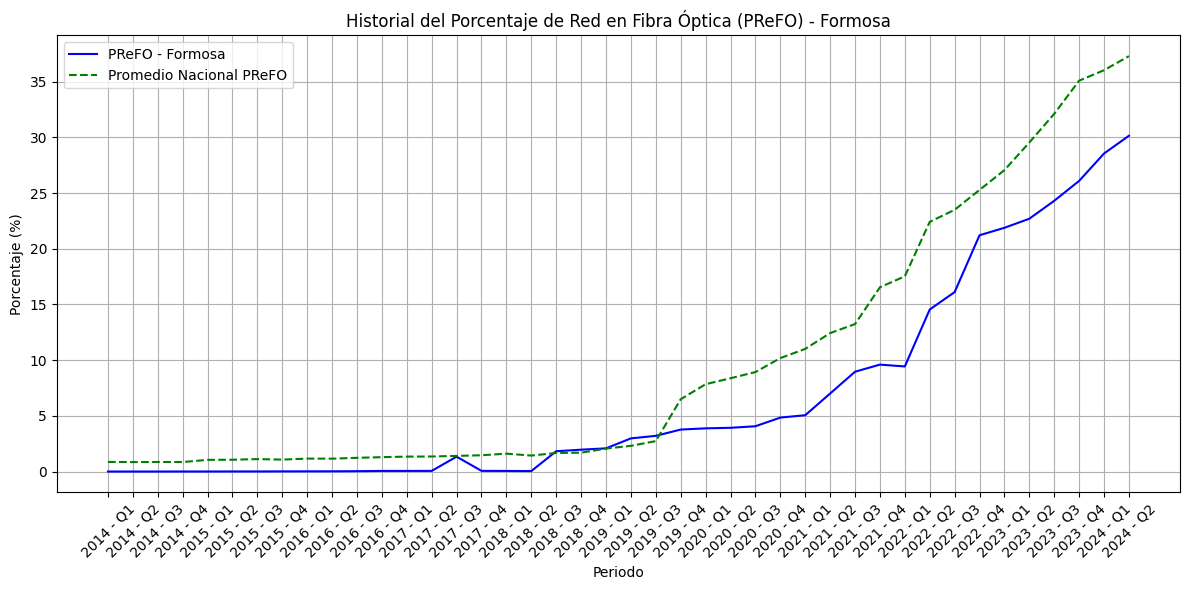

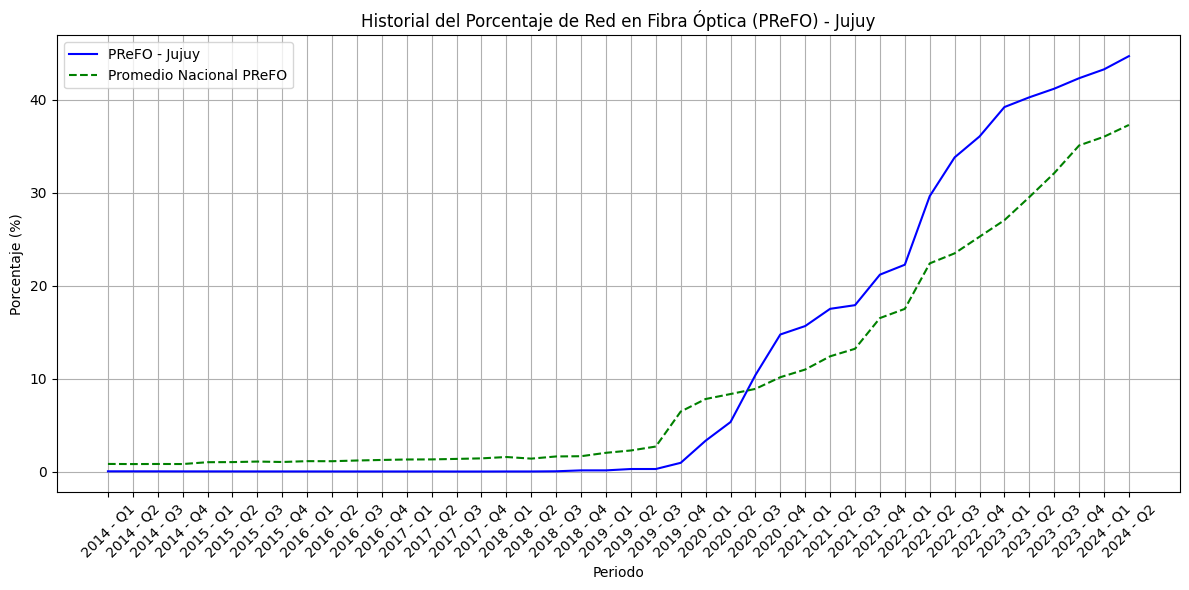

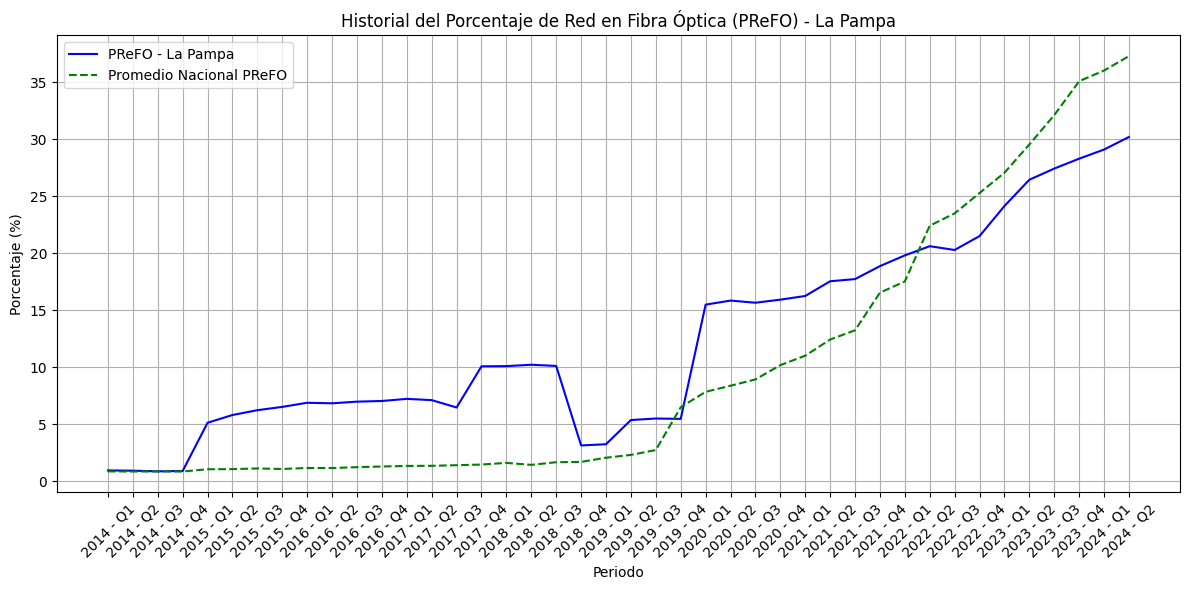

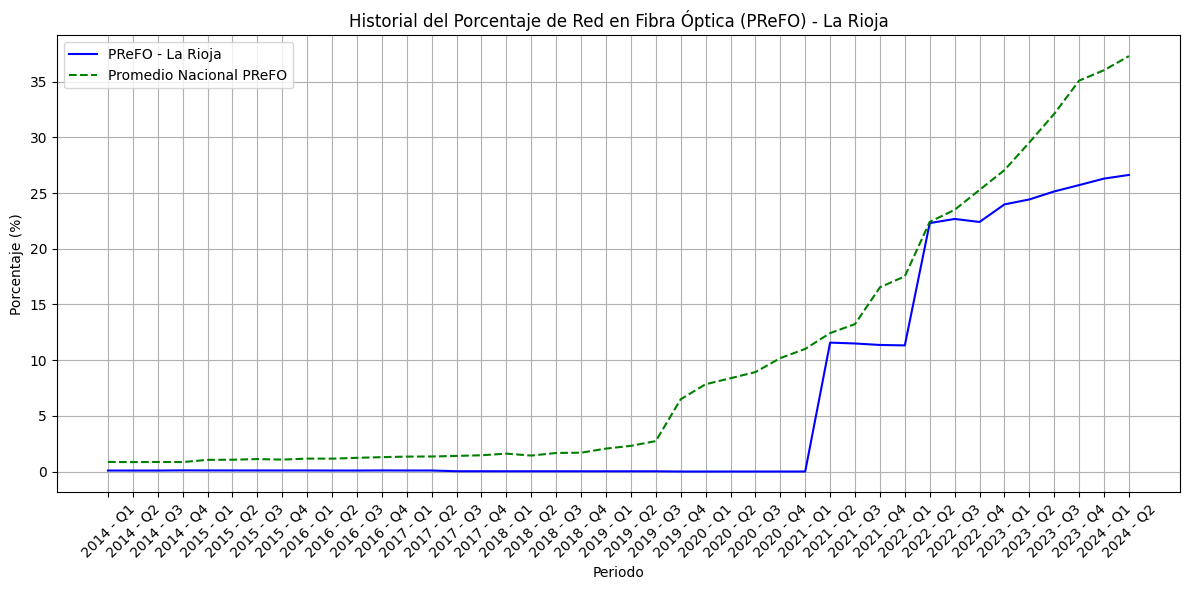

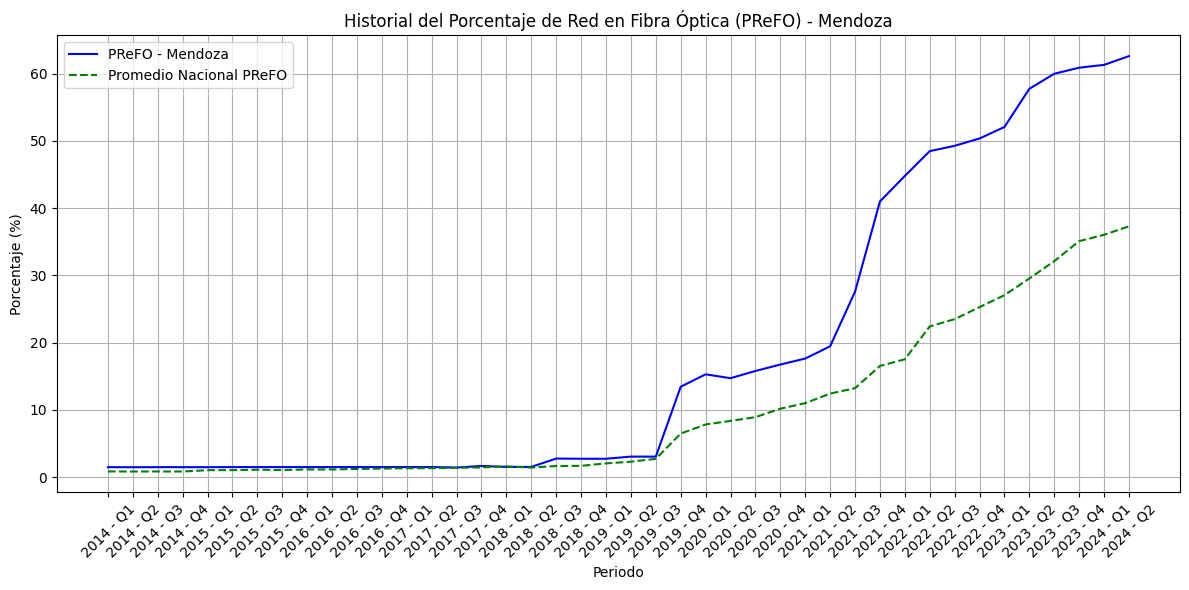

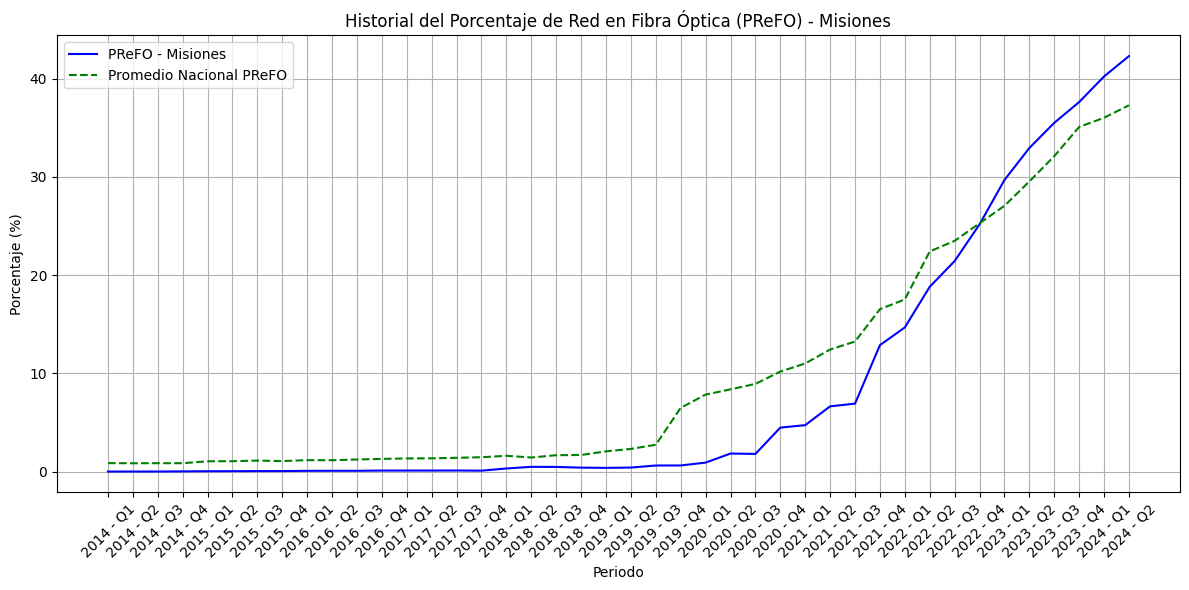

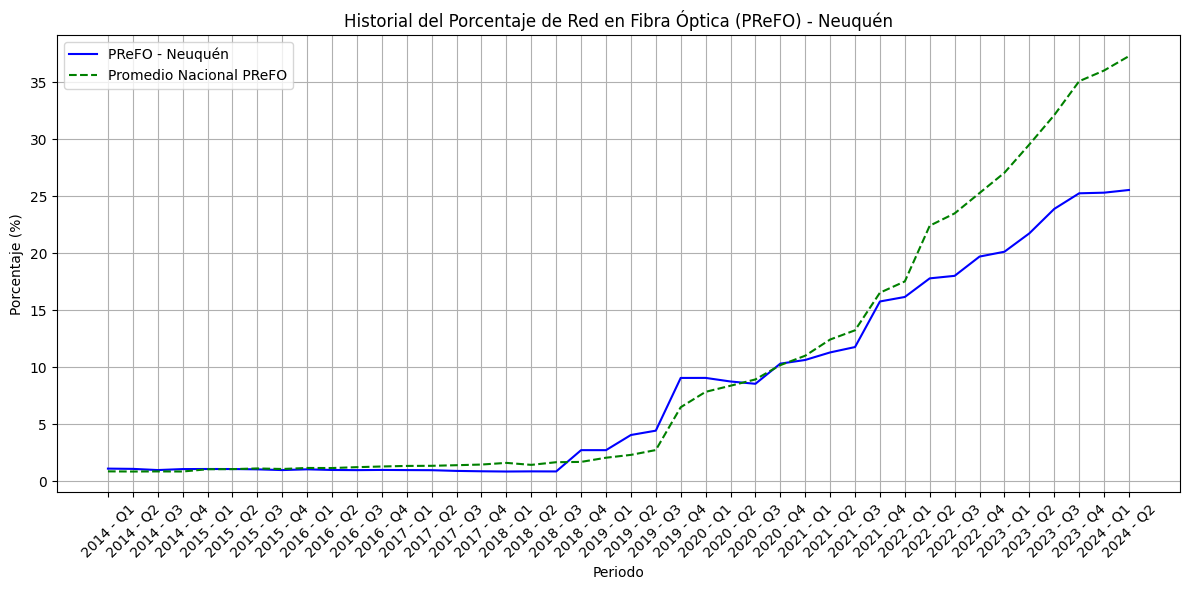

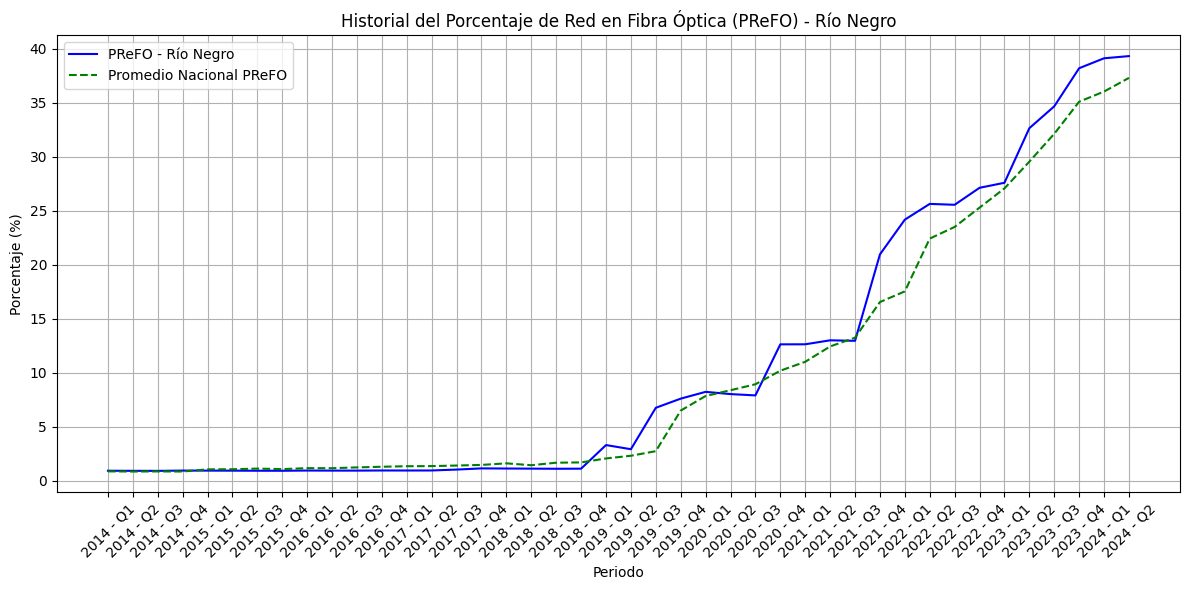

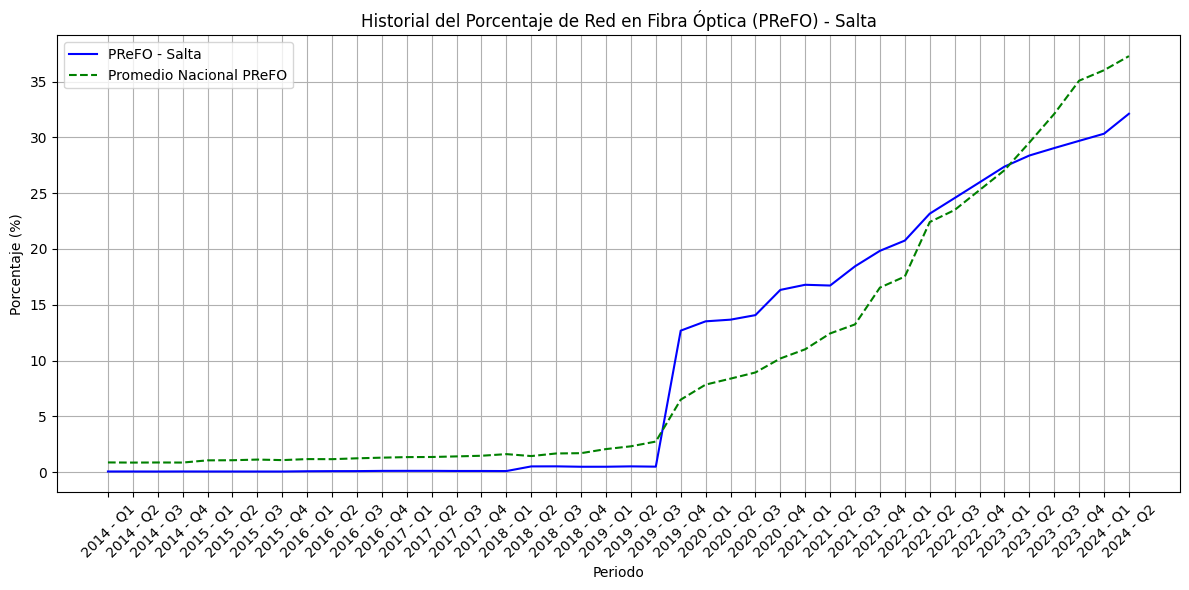

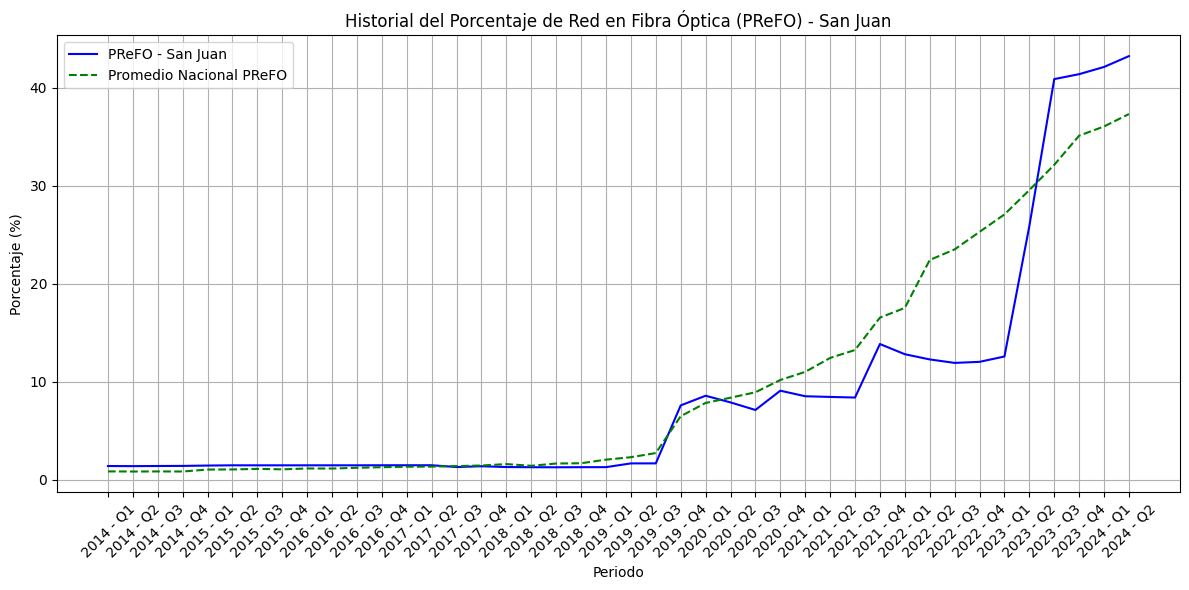

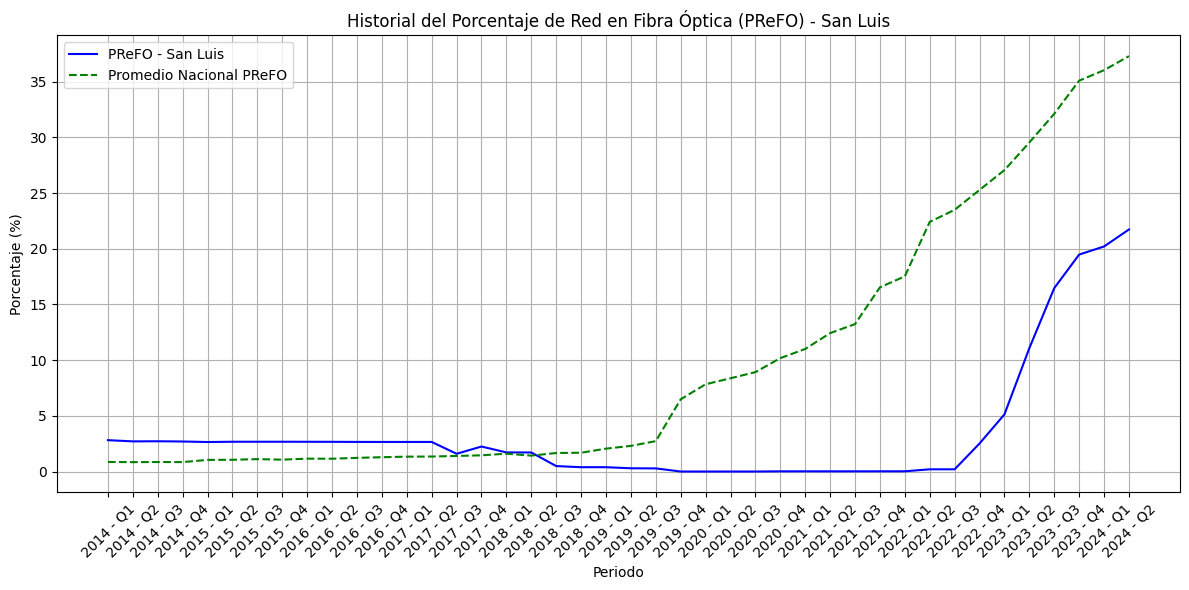

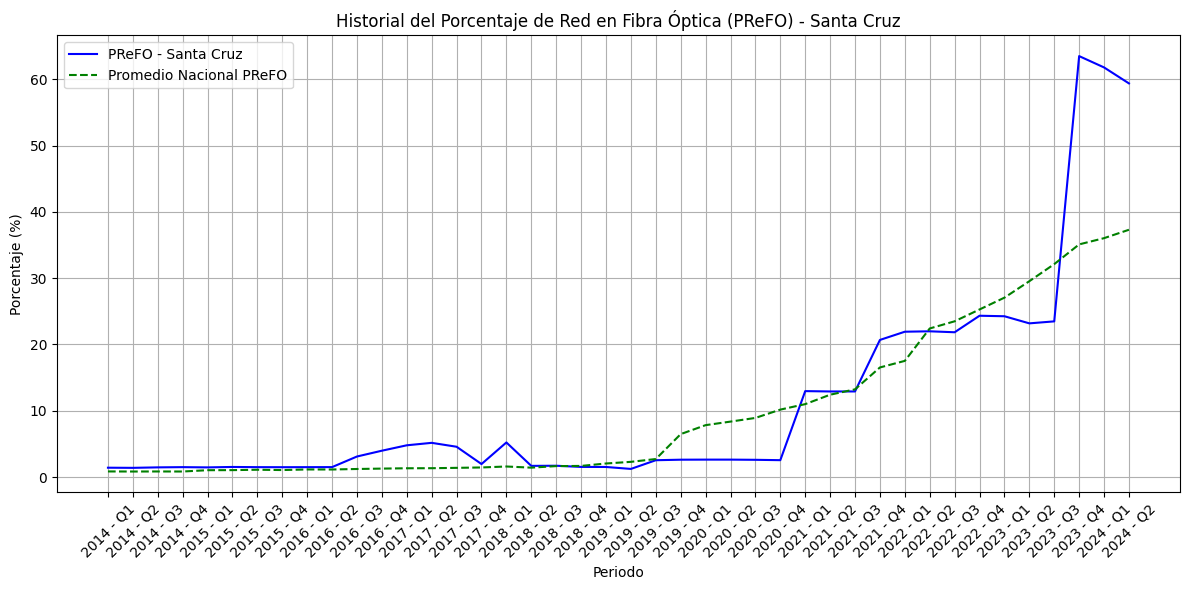

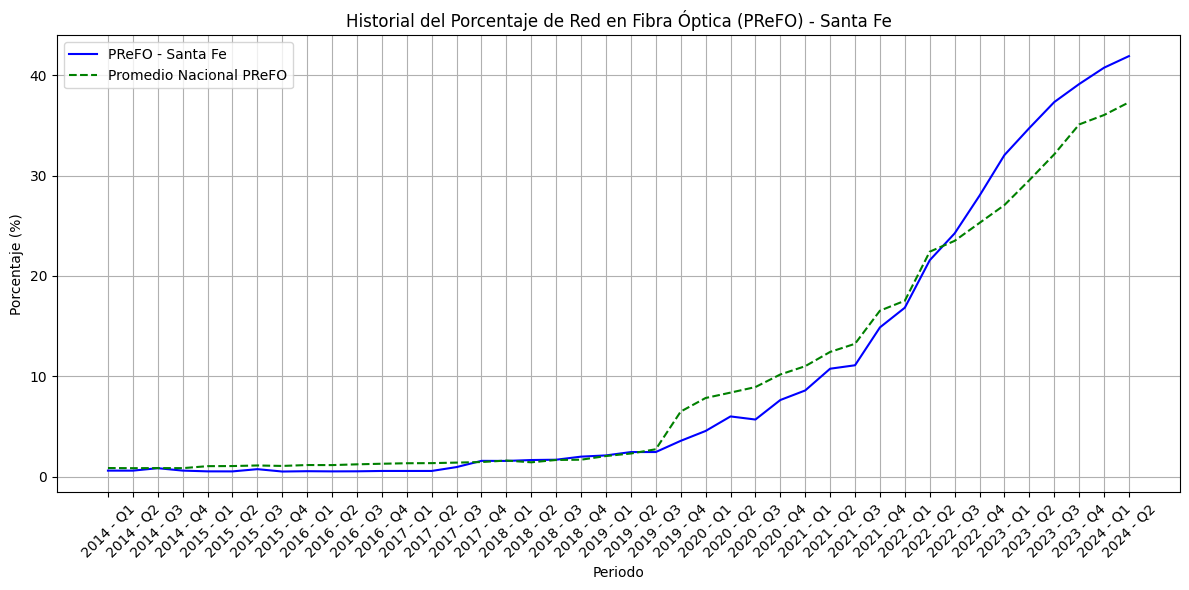

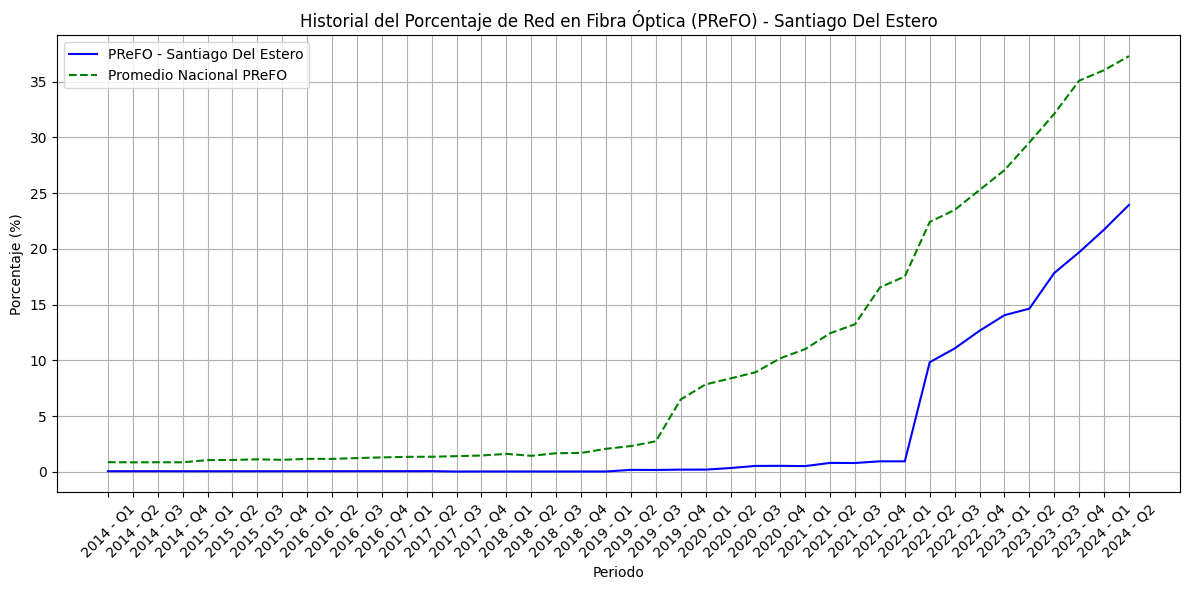

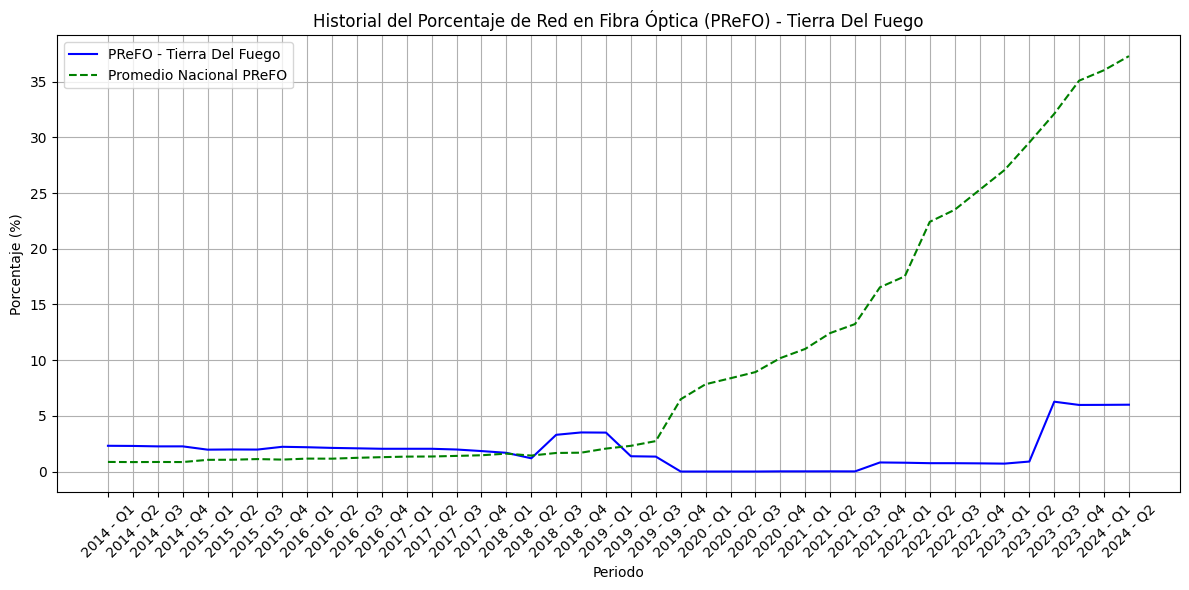

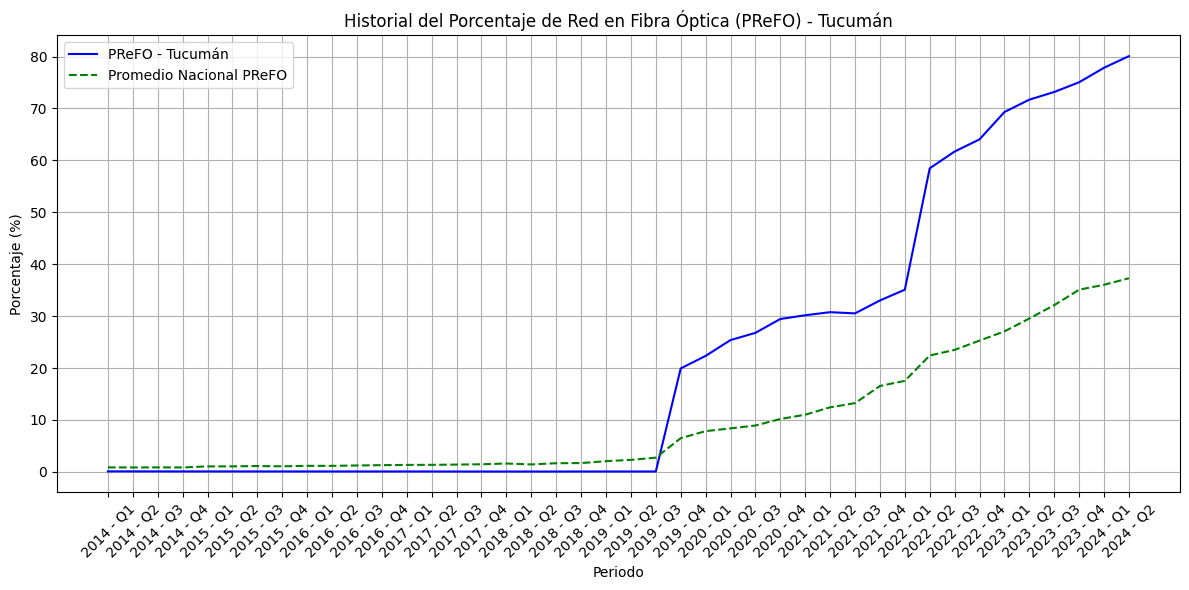

In [799]:
for provincia in provincias:

    df_provincia = df[df['Provincia'] == provincia]

    # Graficar el historial de PReFO para la provincia seleccionada
    plt.figure(figsize=(12, 6))
    plt.plot(df_provincia['Periodo'], df_provincia['Porcentaje Fibra Óptica (PReFO)'], linestyle='-', color='b', label='PReFO - {}'.format(provincia))
    plt.plot(PReFO_Nacional['Periodo'], PReFO_Nacional['Porcentaje Fibra Óptica (PReFO)'], linestyle='--', color='g', label='Promedio Nacional PReFO')
    plt.xlabel('Periodo')
    plt.ylabel('Porcentaje (%)')
    plt.title('Historial del Porcentaje de Red en Fibra Óptica (PReFO) - {}'.format(provincia))
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

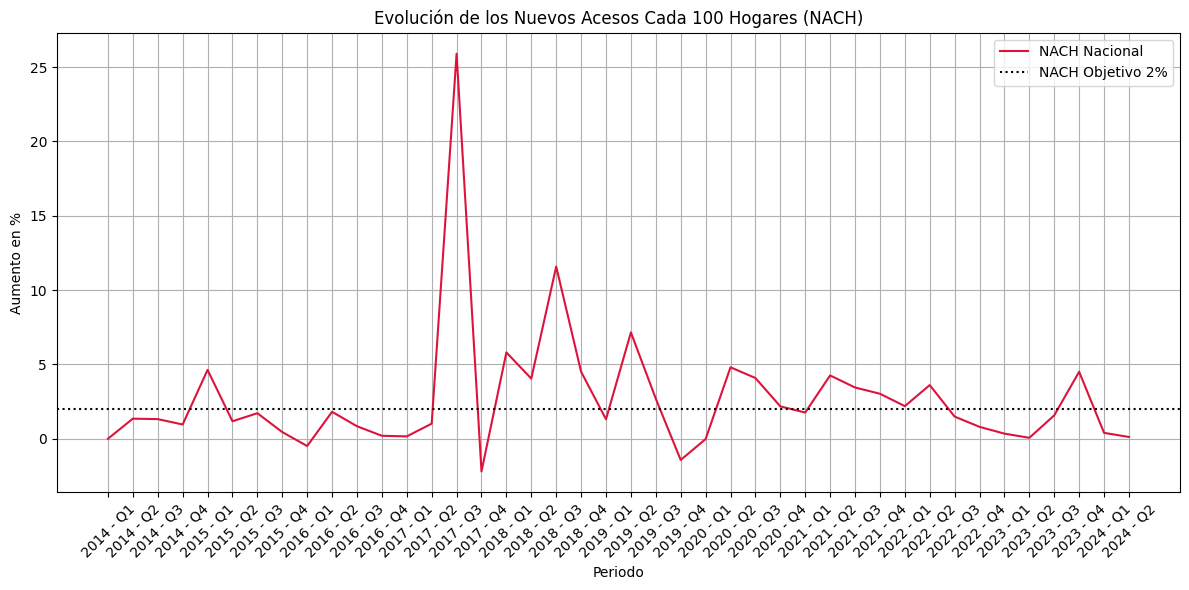

In [800]:
df = df.rename(columns={'KPI':'Nuevos Acesos Cada 100 Hogares (NACH)'})

NACH_Nacional = df.groupby('Periodo')['Nuevos Acesos Cada 100 Hogares (NACH)'].mean().reset_index()

provincias = df['Provincia'].unique()

NACH_objetivo = 2

plt.figure(figsize=(12, 6))

plt.plot(NACH_Nacional['Periodo'], NACH_Nacional['Nuevos Acesos Cada 100 Hogares (NACH)'], linestyle='solid', color='crimson', label='NACH Nacional')
plt.axhline(y=NACH_objetivo, color='black', linestyle='dotted', label='NACH Objetivo 2%')

plt.xlabel('Periodo')
plt.ylabel('Aumento en %')
plt.title(f'Evolución de los Nuevos Acesos Cada 100 Hogares (NACH)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

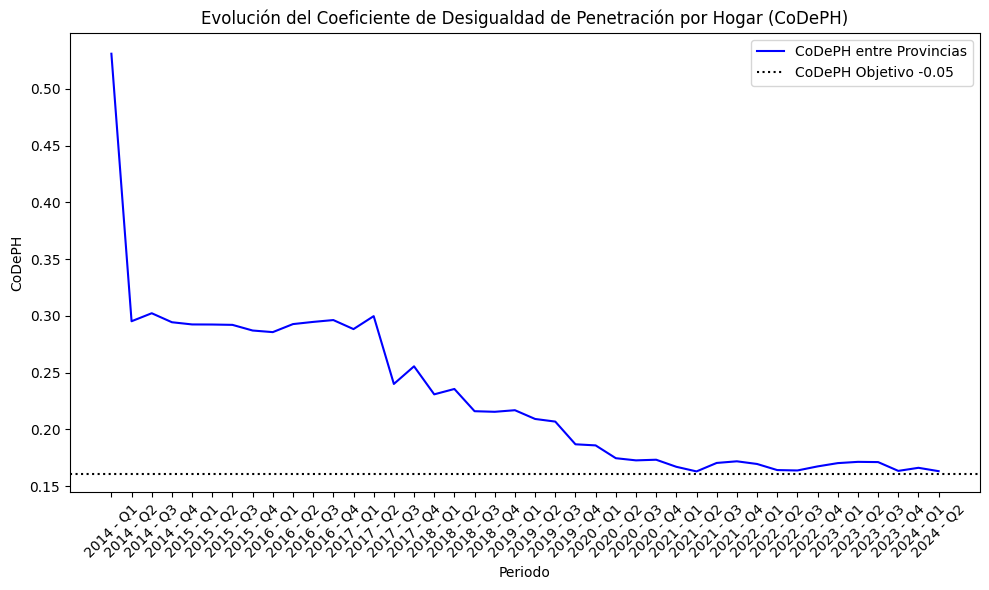

In [801]:
CoDePH_ultimo_periodo = df.loc[df['Periodo'] == '2023 - Q4', 'Coeficiente de Desigualdad de Penetración por Hogar (CoDePH)'].values[0]
CoDePH_objetivo = CoDePH_ultimo_periodo - 0.0025

plt.figure(figsize=(10, 6))
plt.plot(df['Periodo'], df['Coeficiente de Desigualdad de Penetración por Hogar (CoDePH)'], linestyle='-', color='b', label='CoDePH entre Provincias')
plt.axhline(y=CoDePH_objetivo, color='black', linestyle='dotted', label='CoDePH Objetivo -0.05')
plt.xlabel('Periodo')
plt.ylabel('CoDePH')
plt.title('Evolución del Coeficiente de Desigualdad de Penetración por Hogar (CoDePH)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

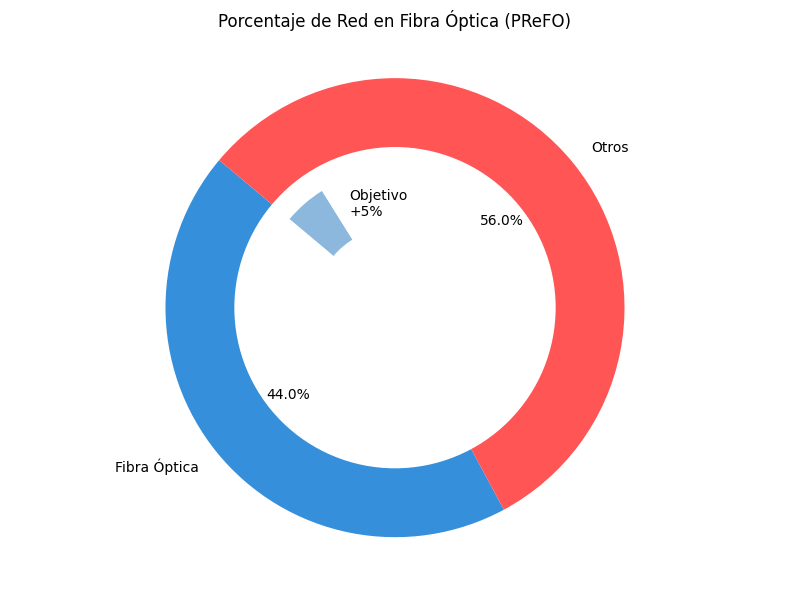

In [802]:
# Obtener el PReFO del último periodo para la provincia específica
ultimo_PReFO = df.loc[df['Periodo'] == df['Periodo'].max(), 'Porcentaje Fibra Óptica (PReFO)'].values[0]

# Definir el objetivo de crecimiento
PReFO_objetivo = 5

# Calcular el porcentaje de accesos que no son fibra óptica
otros_accesos = 100 - ultimo_PReFO

# Etiquetas y datos para el gráfico de dona
labels = ['Fibra Óptica', 'Otros']
sizes = [ultimo_PReFO, otros_accesos]
colors = ['#368FDA', '#ff5555']  # Colores para los segmentos

# Crear el gráfico de dona
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Red en Fibra Óptica (PReFO)')
plt.axis('equal')  # Asegura que el gráfico sea un círculo

# Crear el gráfico de dona adicional para el objetivo
objective_sizes = [PReFO_objetivo, 100 - PReFO_objetivo]
objective_labels = ['', '']
objective_colors = ['#8BB8DC', '#ffffff']

# Crear el gráfico de dona pequeño en el centro
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(centre_circle)


# Agregar el texto del objetivo en el centro
ax.text(-0.2, 0.4, f'Objetivo\n+{PReFO_objetivo}%', fontsize=10, color='black')

# Crear el gráfico de dona adicional en el centro
ax.pie(objective_sizes, labels=objective_labels, colors=objective_colors, startangle=122, radius=0.60)

inner_circle = plt.Circle((0, 0), 0.35, fc='white')
ax.add_artist(inner_circle)

plt.tight_layout()
plt.show()

In [803]:
int_columns = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otras Tecnologias', 'Accesos Totales', 'Accesos Totales en el Periodo Anterior', 'Nuevos Accesos']
drop_columns = ['Banda ancha fija', 'Dial up', 'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'Otras Velocidades', 'Accesos por cada 100 hab']
float_columns = ['Mbps (Media de bajada)', 'Accesos por cada 100 hogares', 'Nuevos Acesos Cada 100 Hogares (NACH)', 'Accesos por cada 100 hogares (nacional)', 'Coeficiente de Desigualdad de Penetración por Hogar (CoDePH)', 'Porcentaje Fibra Óptica (PReFO)']

df = df.drop(columns=drop_columns)

df[float_columns] = df[float_columns].apply(lambda x: x.astype(float))
df[int_columns] = df[int_columns].apply(lambda x: x.astype(int))

df[float_columns] = df[float_columns].map(lambda x: f"{x:.2f}")

df = df.astype(str)

In [804]:
df['Porcentaje Fibra Óptica (PReFO)'] = df['Porcentaje Fibra Óptica (PReFO)'].apply(lambda x: f"{x}%" if "%" not in x else x)

for column in float_columns:
    df[column] = df[column].str.replace('.', ',')

In [805]:
df

Año Trimestre         Provincia     ADSL Cablemodem Fibra óptica  \
0     2014         1      Buenos Aires  1567685    1000879       120960   
23    2014         1           Mendoza   148970      12076         2480   
22    2014         1   Capital Federal   445569     820161        17767   
21    2014         1           Neuquén    47790      28161          997   
20    2014         1           Tucumán   129717         83          121   
...    ...       ...               ...      ...        ...          ...   
984   2024         2  Tierra Del Fuego     9357      47859         3684   
983   2024         2          San Luis     4038      40063        34255   
1005  2024         2          Misiones    20868      76427        87389   
993   2024         2          San Juan    12669      16978        45792   
1006  2024         2           Tucumán    27968      20806       213753   

     Wireless Otras Tecnologias Mbps (Media de bajada)  \
0       16528             33824                   3,73   
23         37              2282                   3,50   
22       1866             14555                   4,02   
21      10381              3051                   3,55   
20         13                98                   3,21   
...       ...               ...                    ...   
984       177               332                  22,09   
983     78954               299                 181,61   
1005    14968              6902                  96,15   
993     23594              6957                  32,17   
1006     3869               518                 108,93   

     Accesos por cada 100 hogares    Periodo Accesos Totales  \
0                           54,57  2014 - Q1         2739876   
23                          31,91  2014 - Q1          165845   
22                         112,25  2014 - Q1         1299918   
21                          49,79  2014 - Q1           90380   
20                           0,00  2014 - Q1          130032   
...                           ...        ...             ...   
984                        108,89  2024 - Q2           61409   
983                        103,40  2024 - Q2          157609   
1005                        57,73  2024 - Q2          206554   
993                         51,17  2024 - Q2          105990   
1006                        60,84  2024 - Q2          266914   

     Accesos Totales en el Periodo Anterior Nuevos Accesos  \
0                                         0              0   
23                                        0              0   
22                                        0              0   
21                                        0              0   
20                                        0              0   
...                                     ...            ...   
984                                   61555           -146   
983                                  156090           1519   
1005                                 202556           3998   
993                                  106666           -676   
1006                                 264595           2319   

     Nuevos Acesos Cada 100 Hogares (NACH)  \
0                                     0,00   
23                                    0,00   
22                                    0,00   
21                                    0,00   
20                                    0,00   
...                                    ...   
984                                  -0,24   
983                                   0,97   
1005                                  1,97   
993                                  -0,63   
1006                                  0,88   

     Accesos por cada 100 hogares (nacional)  \
0                                      25,52   
23                                     25,52   
22                                     25,52   
21                                     25,52   
20                                     25,52   
...                                      ...   
984   

In [807]:
df.to_csv('DATASETS/EDA.csv', index=False, encoding='utf-8')